# Resnet Practice: Bird of Paradise 
- Link to pytorch tutorial : https://pytorch.org/hub/pytorch_vision_resnet/

In this notebook I will experiment with the Resnet Model and try to understand what the inner workings do. 

# Basics of the tutorial 

In [1]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet34', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet152', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /usr4/cs640/rakin374/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /usr4/cs640/rakin374/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 69.3MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [2]:
!ls

Data_Exploration_Allium.ipynb  Tabular_Data_Cleaning.ipynb
Resnet_Birdopar.ipynb


In [3]:
# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [4]:
!ls

Data_Exploration_Allium.ipynb  Tabular_Data_Cleaning.ipynb
Resnet_Birdopar.ipynb	       dog.jpg


In [5]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([ 1.5916e-02, -1.5497e+00,  3.2031e-01, -2.0585e+00, -8.5747e-01,
         1.7843e+00,  1.4699e+00,  2.1626e+00,  4.4888e+00,  8.2885e-01,
        -5.7819e+00, -3.4969e+00, -4.0621e+00, -4.7517e+00, -3.8072e+00,
        -4.7243e+00, -1.2590e+00,  2.9813e-01, -2.0459e+00, -5.2885e-01,
        -3.5982e+00, -8.1425e-01, -2.7651e+00, -1.2770e+00, -3.4182e+00,
        -1.9048e+00, -3.0018e+00, -1.3471e+00, -1.8391e+00,  1.3937e+00,
        -2.0114e+00, -1.4137e+00, -2.3287e+00, -1.8198e+00, -1.1914e-01,
        -3.4102e+00, -1.6544e+00, -3.4496e+00, -2.6479e+00, -2.7407e+00,
        -2.2193e+00, -3.6509e+00, -4.1255e+00, -5.5946e+00, -1.7519e+00,
        -1.6900e+00, -9.8164e-01, -2.1251e+00, -3.5137e+00, -1.3320e+00,
        -1.1335e+00, -1.1564e+00, -2.2711e-02, -8.5797e-01, -1.2919e+00,
        -2.8682e+00,  6.6078e-01, -1.7178e+00, -1.2443e+00, -2.3362e+00,
        -5.7818e-02, -1.9204e+00, -2.5964e+00, -1.8020e+00, -1.5125e+00,
        -1.0843e+00, -4.0987e-01, -1.3090e+00, -9.4

In [6]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2024-11-14 01:58:36--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2024-11-14 01:58:36 (153 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [7]:
!ls

Data_Exploration_Allium.ipynb  dog.jpg
Resnet_Birdopar.ipynb	       imagenet_classes.txt
Tabular_Data_Cleaning.ipynb


In [8]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Samoyed 0.8846220374107361
Arctic fox 0.045805152505636215
white wolf 0.044276218861341476
Pomeranian 0.005621326621621847
Great Pyrenees 0.004652002360671759


# Looking inside of the model!

https://github.com/pytorch/vision/blob/main/torchvision/models/resnet.py

In [9]:
type(model)

torchvision.models.resnet.ResNet

In [11]:
c1 = model.conv1

In [12]:
convolu

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [36]:
print(c1.weight) # this is one convolutional pass but has 3 channels since there are three channels orignally
#what does the look like in any one of these convolutions? 

print(type(matrix))

Parameter containing:
tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
            1.7083e-02, -1.2694e-02],
          [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
           -1.2907e-01,  3.7424e-03],
          [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
            2.5632e-01,  6.3573e-02],
          ...,
          [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
           -4.2058e-01, -2.5781e-01],
          [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
            3.9359e-01,  1.6606e-01],
          [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
           -8.2230e-02, -5.7828e-03]],

         [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
            6.6221e-04, -2.5743e-02],
          [ 4.5687e-02,  3.3603e-02, -1.0453e-01,  ..., -3.1253e-01,
           -1.6051e-01, -1.2826e-03],
          [-8.3730e-04,  9.8420e-02,  4.0210e-01,  ...,  7.0789e-01,
            3.6887e-01,  1.2455e-01]

tensor([[-0.0104, -0.0061, -0.0018,  0.0748,  0.0566,  0.0171, -0.0127],
        [ 0.0111,  0.0095, -0.1099, -0.2805, -0.2712, -0.1291,  0.0037],
        [-0.0069,  0.0591,  0.2955,  0.5872,  0.5197,  0.2563,  0.0636],
        [ 0.0305, -0.0670, -0.2984, -0.4387, -0.2709, -0.0006,  0.0576],
        [-0.0275,  0.0160,  0.0726, -0.0541, -0.3328, -0.4206, -0.2578],
        [ 0.0306,  0.0410,  0.0628,  0.2390,  0.4138,  0.3936,  0.1661],
        [-0.0137, -0.0037, -0.0241, -0.0659, -0.1507, -0.0822, -0.0058]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


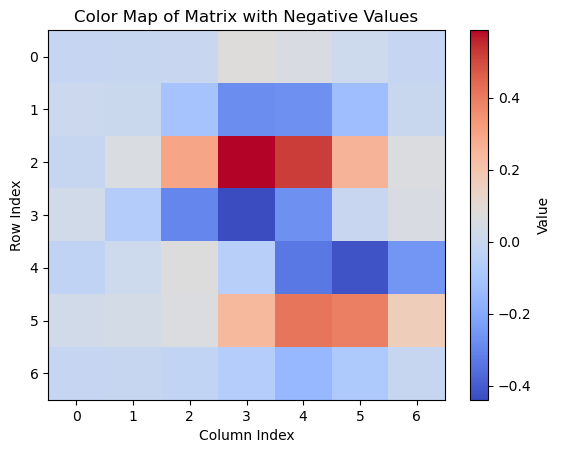

tensor([[-1.1397e-02, -2.6619e-02, -3.4641e-02,  3.6812e-02,  3.2521e-02,
          6.6221e-04, -2.5743e-02],
        [ 4.5687e-02,  3.3603e-02, -1.0453e-01, -3.0885e-01, -3.1253e-01,
         -1.6051e-01, -1.2826e-03],
        [-8.3730e-04,  9.8420e-02,  4.0210e-01,  7.7035e-01,  7.0789e-01,
          3.6887e-01,  1.2455e-01],
        [-5.8427e-03, -1.2862e-01, -4.2071e-01, -5.9270e-01, -3.8285e-01,
         -4.2407e-02,  6.1568e-02],
        [-5.5926e-02, -5.2239e-03,  2.7081e-02, -1.5159e-01, -4.6178e-01,
         -5.7080e-01, -3.6552e-01],
        [ 3.2860e-02,  5.5574e-02,  9.9670e-02,  3.1815e-01,  5.4636e-01,
          4.8276e-01,  1.9867e-01],
        [ 5.3051e-03,  6.6938e-03, -1.7254e-02, -6.9806e-02, -1.4822e-01,
         -7.7248e-02,  7.2183e-04]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


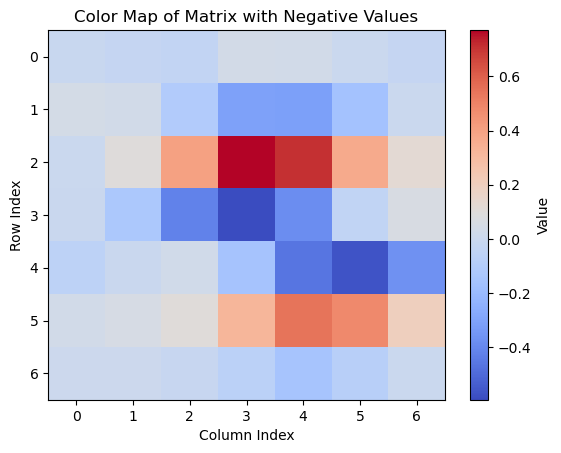

tensor([[-0.0020, -0.0092,  0.0212,  0.0898,  0.0892,  0.0337, -0.0201],
        [ 0.0154, -0.0186, -0.1259, -0.2955, -0.2534, -0.1298, -0.0280],
        [ 0.0098,  0.0490,  0.2170,  0.4301,  0.3487,  0.1043,  0.0184],
        [ 0.0264, -0.0260, -0.1970, -0.2681, -0.1052,  0.0786,  0.1208],
        [-0.0284,  0.0184,  0.0986,  0.0612, -0.1174, -0.2576, -0.1545],
        [ 0.0208, -0.0026, -0.0378,  0.0575,  0.2414,  0.2434,  0.1180],
        [ 0.0007,  0.0008, -0.0101, -0.0552, -0.1486, -0.1175, -0.0383]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


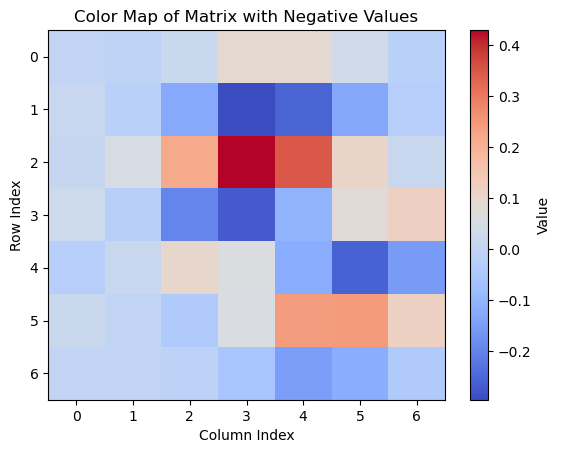

tensor([[-0.0044, -0.0041,  0.0032, -0.0055, -0.0370, -0.0252, -0.0479],
        [ 0.0513,  0.0534,  0.0804,  0.1151,  0.1448,  0.1429,  0.1231],
        [-0.0073,  0.0022,  0.0376,  0.0542,  0.0615,  0.0803,  0.1172],
        [-0.0588, -0.0783, -0.0542, -0.0938, -0.1171, -0.0682,  0.0217],
        [-0.0268, -0.1230, -0.1365, -0.1533, -0.1407, -0.1116, -0.0496],
        [ 0.0235, -0.0173, -0.0111, -0.0079, -0.0188, -0.0233, -0.0295],
        [ 0.0287,  0.0217,  0.0479,  0.0436,  0.0255,  0.0353,  0.0113]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


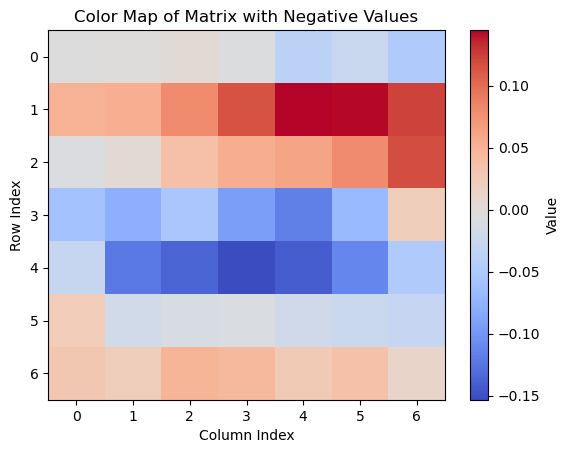

tensor([[ 0.0005,  0.0122,  0.0420,  0.0597,  0.0464,  0.0404, -0.0144],
        [ 0.0435,  0.0688,  0.1327,  0.2173,  0.2861,  0.2691,  0.2093],
        [-0.0576, -0.0226,  0.0305,  0.0755,  0.1376,  0.1654,  0.1795],
        [-0.1505, -0.1808, -0.1625, -0.2009, -0.1786, -0.0984,  0.0168],
        [-0.1082, -0.2523, -0.2974, -0.3222, -0.2850, -0.2149, -0.1032],
        [ 0.0407, -0.0328, -0.0635, -0.0824, -0.0924, -0.0699, -0.0498],
        [ 0.0829,  0.0876,  0.1011,  0.0779,  0.0527,  0.0610,  0.0412]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


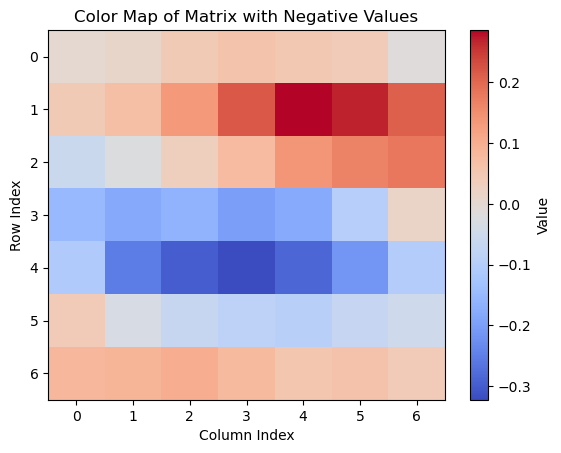

tensor([[-0.0164, -0.0139,  0.0053,  0.0448,  0.0437,  0.0227, -0.0460],
        [ 0.0332,  0.0420,  0.0935,  0.1857,  0.2616,  0.2297,  0.1669],
        [-0.0460, -0.0164,  0.0268,  0.0891,  0.1495,  0.1322,  0.1358],
        [-0.0960, -0.1031, -0.0909, -0.1041, -0.0906, -0.0544,  0.0283],
        [-0.0721, -0.1890, -0.2339, -0.2377, -0.1904, -0.1561, -0.0760],
        [ 0.0512, -0.0258, -0.0694, -0.0703, -0.0590, -0.0616, -0.0446],
        [ 0.1117,  0.0790,  0.0658,  0.0420,  0.0316,  0.0252,  0.0074]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


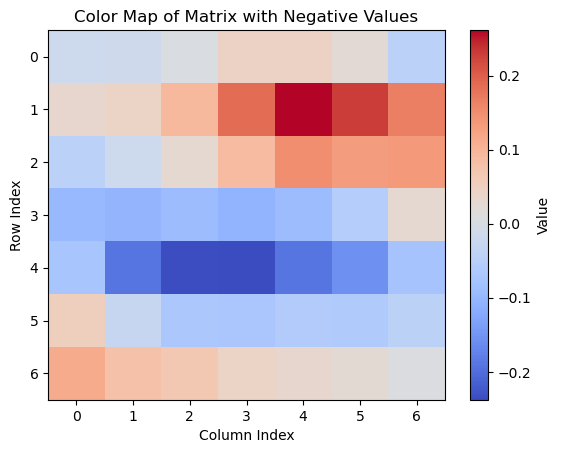

tensor([[-7.0826e-08, -6.4306e-08, -7.3806e-08, -9.5209e-08, -9.8000e-08,
         -1.0905e-07, -8.3421e-08],
        [-6.1125e-09,  2.0613e-09, -8.0922e-09, -3.8825e-08, -4.9840e-08,
         -4.3836e-08, -3.0538e-09],
        [ 7.1953e-08,  7.5616e-08,  5.9282e-08,  1.9890e-08, -9.7509e-09,
         -1.0951e-09,  4.2442e-08],
        [ 7.7593e-08,  5.3290e-08,  3.1347e-08,  2.6758e-10, -4.2659e-08,
         -5.5318e-08,  2.2343e-09],
        [ 9.5889e-08,  1.0039e-07,  7.9817e-08,  3.9696e-08, -1.7491e-08,
         -4.7666e-08, -1.3265e-08],
        [ 1.2904e-07,  1.4762e-07,  1.7477e-07,  1.7241e-07,  1.3233e-07,
          1.0628e-07,  9.3316e-08],
        [ 1.2558e-07,  1.3644e-07,  1.8431e-07,  2.1504e-07,  2.1399e-07,
          1.7710e-07,  1.7166e-07]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


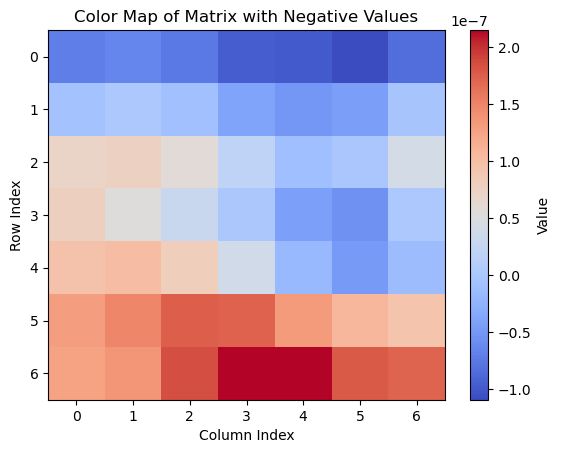

tensor([[-1.2690e-07, -9.6139e-08, -1.0372e-07, -1.1585e-07, -1.1808e-07,
         -1.3309e-07, -1.0820e-07],
        [-5.7412e-08, -2.5055e-08, -3.0115e-08, -5.8057e-08, -7.2922e-08,
         -6.7022e-08, -2.2574e-08],
        [ 2.1813e-08,  4.8608e-08,  3.1222e-08, -1.0413e-09, -1.8694e-08,
         -7.9591e-09,  3.9750e-08],
        [ 2.5998e-08,  2.6039e-08,  5.5086e-10, -1.8409e-08, -4.6012e-08,
         -5.5238e-08,  4.1964e-09],
        [ 5.6013e-08,  7.5526e-08,  4.4496e-08,  5.0576e-09, -4.4128e-08,
         -5.9930e-08, -1.8247e-08],
        [ 7.7614e-08,  9.8348e-08,  1.0455e-07,  9.3207e-08,  6.3272e-08,
          4.1781e-08,  4.5901e-08],
        [ 5.9834e-08,  7.1006e-08,  9.0437e-08,  1.1774e-07,  1.1654e-07,
          8.7550e-08,  9.8837e-08]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


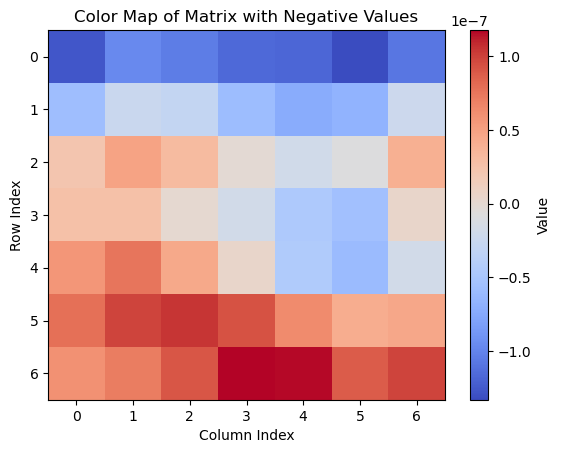

tensor([[-4.3810e-08,  1.3270e-08,  7.8275e-09, -1.0187e-08, -5.8804e-09,
         -2.6217e-08, -1.5649e-08],
        [ 4.1700e-08,  1.0778e-07,  1.0946e-07,  8.9477e-08,  7.6403e-08,
          7.1450e-08,  9.7615e-08],
        [ 1.0436e-07,  1.6586e-07,  1.5933e-07,  1.4515e-07,  1.3517e-07,
          1.3487e-07,  1.6449e-07],
        [ 9.8064e-08,  1.3309e-07,  1.1335e-07,  1.1484e-07,  1.0252e-07,
          9.6530e-08,  1.3537e-07],
        [ 9.8763e-08,  1.5072e-07,  1.2547e-07,  1.0054e-07,  6.8316e-08,
          6.8382e-08,  1.1367e-07],
        [ 9.1435e-08,  1.3576e-07,  1.3793e-07,  1.3268e-07,  1.1678e-07,
          1.1723e-07,  1.4394e-07],
        [ 6.2183e-08,  8.8184e-08,  1.0456e-07,  1.2937e-07,  1.3941e-07,
          1.3333e-07,  1.5844e-07]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


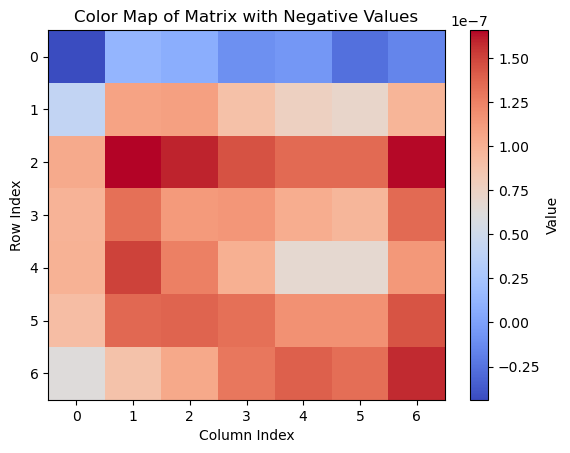

tensor([[-8.3198e-03, -1.7529e-02, -1.0021e-02, -4.6267e-03,  6.7451e-03,
         -1.1175e-02, -9.1815e-03],
        [-2.7965e-02, -2.7960e-02, -3.3520e-03, -2.2518e-02, -7.2722e-02,
         -6.4080e-02, -1.7332e-02],
        [-3.4798e-02, -1.8280e-02, -2.5543e-02, -8.8513e-02, -1.4010e-01,
         -1.4531e-01, -3.3012e-02],
        [-2.7503e-02, -5.0788e-03, -7.5811e-03, -4.0964e-02, -7.5155e-02,
         -1.0266e-01, -4.4941e-03],
        [-3.7489e-02, -1.0835e-02, -9.5839e-03, -2.3644e-03, -2.4916e-02,
         -5.8383e-02,  7.2524e-03],
        [-8.3909e-03,  1.9522e-02,  4.4351e-03,  2.1634e-02,  1.8798e-02,
         -8.3942e-03,  1.0850e-02],
        [-1.7434e-02, -1.6131e-05, -2.2273e-02, -6.0269e-03, -4.3525e-04,
         -1.6188e-02, -3.8107e-03]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


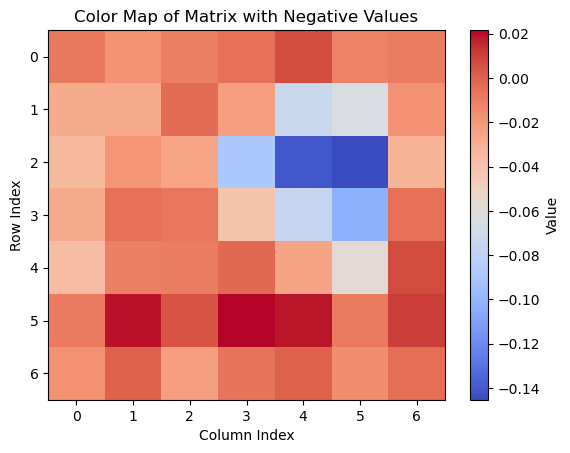

tensor([[ 0.0236,  0.0034,  0.0112,  0.0161,  0.0271,  0.0152,  0.0208],
        [ 0.0321,  0.0204,  0.0268, -0.0101, -0.0713, -0.0446,  0.0276],
        [ 0.0177,  0.0266, -0.0090, -0.1012, -0.1696, -0.1542, -0.0067],
        [ 0.0166,  0.0277, -0.0029, -0.0720, -0.1258, -0.1273,  0.0154],
        [ 0.0077,  0.0159, -0.0051, -0.0183, -0.0520, -0.0663,  0.0353],
        [ 0.0319,  0.0382,  0.0083,  0.0170,  0.0141,  0.0082,  0.0553],
        [ 0.0273,  0.0296,  0.0006,  0.0080,  0.0131,  0.0168,  0.0426]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


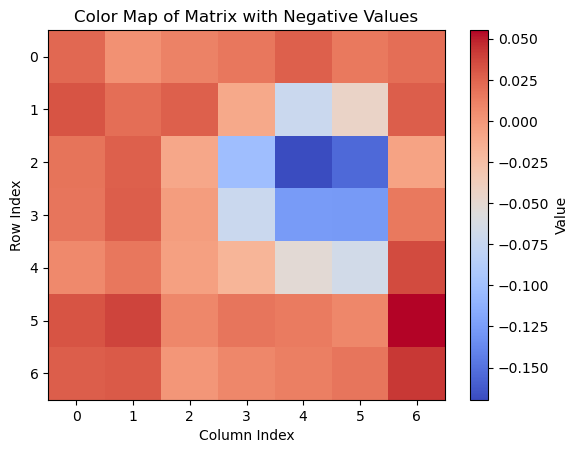

tensor([[-0.0497, -0.0319, -0.0062,  0.0268,  0.0566,  0.0420,  0.0141],
        [-0.0059,  0.0223,  0.0551,  0.0503,  0.0103,  0.0353,  0.0735],
        [-0.0099,  0.0275,  0.0155, -0.0429, -0.0947, -0.0836,  0.0313],
        [-0.0062,  0.0264,  0.0065, -0.0309, -0.0752, -0.0851,  0.0256],
        [-0.0162,  0.0069, -0.0051,  0.0059, -0.0239, -0.0404,  0.0456],
        [-0.0209, -0.0019, -0.0189,  0.0062,  0.0028, -0.0027,  0.0396],
        [-0.0263, -0.0088, -0.0279, -0.0008,  0.0056,  0.0101,  0.0300]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


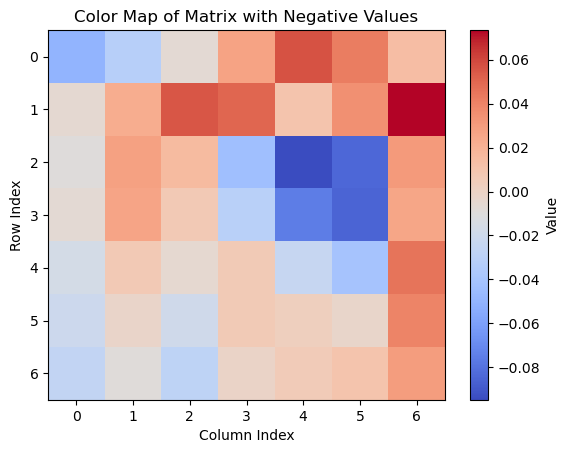

tensor([[2.3248e-09, 3.9969e-09, 2.8881e-09, 6.3329e-09, 2.6424e-09, 9.5158e-10,
         1.3524e-09],
        [4.9282e-09, 6.2274e-09, 4.6407e-09, 9.5692e-09, 4.2786e-09, 4.1082e-09,
         2.2480e-09],
        [4.1799e-09, 7.2943e-09, 8.4316e-09, 6.0360e-09, 7.0781e-09, 4.9947e-09,
         6.6835e-09],
        [2.7436e-09, 9.9547e-09, 6.7944e-09, 5.9733e-09, 4.2134e-09, 2.2762e-09,
         4.8124e-09],
        [2.1721e-09, 5.0012e-09, 5.2719e-09, 7.4276e-09, 6.4895e-09, 6.8176e-09,
         4.4910e-09],
        [3.5839e-09, 4.8495e-09, 6.9884e-09, 6.0149e-09, 8.3714e-09, 6.1136e-09,
         3.8133e-09],
        [3.3438e-09, 4.3880e-09, 4.4755e-09, 5.4266e-09, 5.1581e-09, 5.9218e-09,
         4.4629e-09]], device='cuda:0', grad_fn=<UnbindBackward0>)


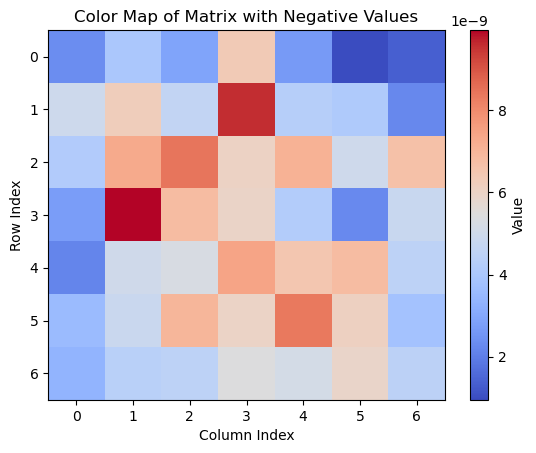

tensor([[ 4.9534e-09,  4.5142e-09,  8.4441e-09,  5.6226e-09,  5.2235e-09,
          5.0966e-09,  4.5388e-09],
        [ 7.8807e-09,  9.7243e-09,  8.7955e-09,  5.0087e-09,  8.9800e-09,
          1.0557e-08,  7.1808e-09],
        [ 3.8977e-09,  7.8285e-09,  5.8131e-09,  9.9446e-09,  8.8127e-09,
          1.0888e-08,  8.6509e-09],
        [ 2.2845e-09,  2.7214e-09,  4.9394e-09,  3.7512e-09,  6.4478e-09,
          6.1298e-09,  7.5518e-09],
        [ 3.1038e-10,  4.4451e-09,  2.5557e-09,  1.9398e-09,  5.2581e-09,
          3.6933e-09,  6.3727e-09],
        [-1.2034e-09,  1.8095e-09,  3.6810e-09,  3.1206e-09,  4.4934e-09,
          4.2171e-09,  3.3403e-09],
        [ 7.1649e-10,  5.0077e-09,  2.8503e-09,  4.7544e-09,  2.6634e-09,
          1.8895e-09, -1.0915e-10]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


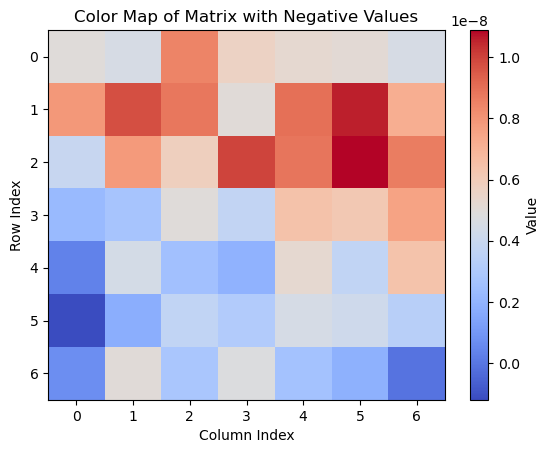

tensor([[ 2.1681e-09,  2.3598e-09,  3.3766e-09,  8.9179e-10,  3.5973e-09,
          4.6489e-09,  6.0302e-09],
        [ 3.7671e-09,  2.7061e-09,  4.7132e-09,  3.8871e-09,  4.2946e-09,
          3.9555e-09,  6.2004e-09],
        [ 2.0286e-09, -6.6669e-10,  7.8386e-11,  2.6713e-09,  5.6084e-09,
          7.5686e-09,  6.7730e-09],
        [-8.8119e-09, -1.1198e-08, -8.2712e-09, -6.5571e-09, -2.0018e-09,
         -2.5245e-10,  8.2497e-10],
        [-8.8815e-09, -1.2553e-08, -1.1367e-08, -9.6923e-09, -8.4212e-09,
         -7.1297e-09, -6.1585e-09],
        [-5.3173e-09, -9.0144e-09, -1.2222e-08, -1.0326e-08, -1.1021e-08,
         -9.2324e-09, -6.2704e-09],
        [-6.7209e-09, -9.4580e-09, -1.1506e-08, -1.0082e-08, -1.0613e-08,
         -6.5633e-09, -6.9379e-09]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


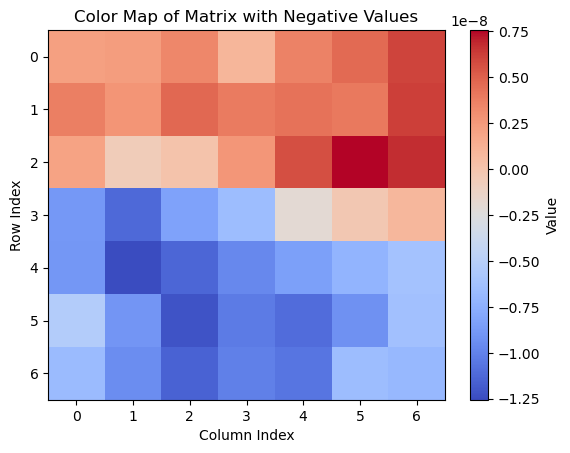

tensor([[-0.0253,  0.0503,  0.0235, -0.0153, -0.0599, -0.0270, -0.0086],
        [ 0.0530,  0.1733,  0.0977, -0.0212, -0.1825, -0.1222, -0.0811],
        [ 0.0483,  0.2724,  0.1840, -0.0163, -0.2662, -0.2194, -0.1456],
        [ 0.0370,  0.3538,  0.3137,  0.0210, -0.3092, -0.3180, -0.2076],
        [ 0.0131,  0.3439,  0.4147,  0.0829, -0.2702, -0.3310, -0.2391],
        [-0.0210,  0.2435,  0.3545,  0.1696, -0.1422, -0.2246, -0.1990],
        [-0.0288,  0.1689,  0.2423,  0.1741, -0.0490, -0.1123, -0.1610]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


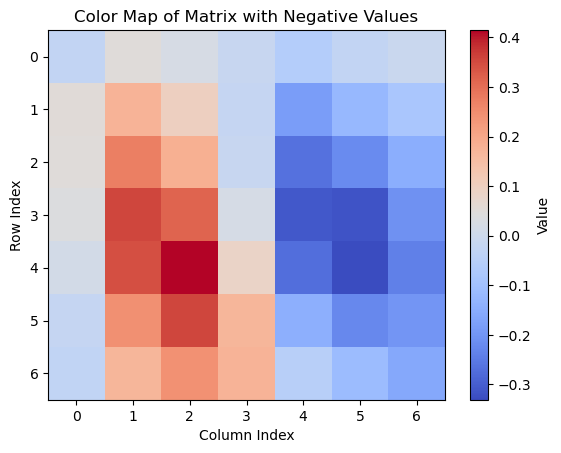

tensor([[-0.0024, -0.0388, -0.0042,  0.0106,  0.0357,  0.0248,  0.0122],
        [-0.0057, -0.0251, -0.0241,  0.0250,  0.0095,  0.0395,  0.0278],
        [-0.0116, -0.0263, -0.0495,  0.0279,  0.0171,  0.0383,  0.0206],
        [-0.0190, -0.0383, -0.0593,  0.0089,  0.0366,  0.0279,  0.0405],
        [-0.0043, -0.0541, -0.0254, -0.0204,  0.0388, -0.0002,  0.0253],
        [ 0.0165, -0.0652, -0.0367, -0.0106,  0.0261,  0.0128,  0.0340],
        [ 0.0080, -0.0492, -0.0483, -0.0170, -0.0051,  0.0116,  0.0266]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


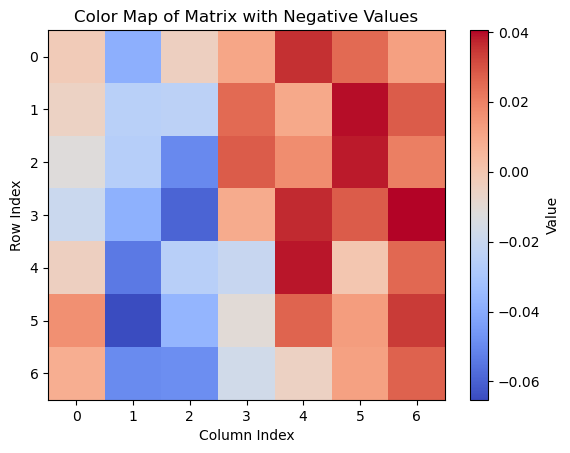

tensor([[ 0.0201, -0.0407, -0.0076, -0.0108,  0.0398, -0.0111, -0.0004],
        [-0.0182, -0.1199, -0.0881,  0.0239,  0.1014,  0.1333,  0.0958],
        [-0.0571, -0.2008, -0.1901,  0.0175,  0.1914,  0.2020,  0.1106],
        [-0.0354, -0.2703, -0.2842, -0.0263,  0.2832,  0.2820,  0.1963],
        [-0.0131, -0.2924, -0.3144, -0.1304,  0.2460,  0.2676,  0.2172],
        [ 0.0396, -0.2210, -0.2758, -0.1705,  0.1221,  0.1815,  0.2085],
        [ 0.0475, -0.1339, -0.1872, -0.1447,  0.0042,  0.0835,  0.1551]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


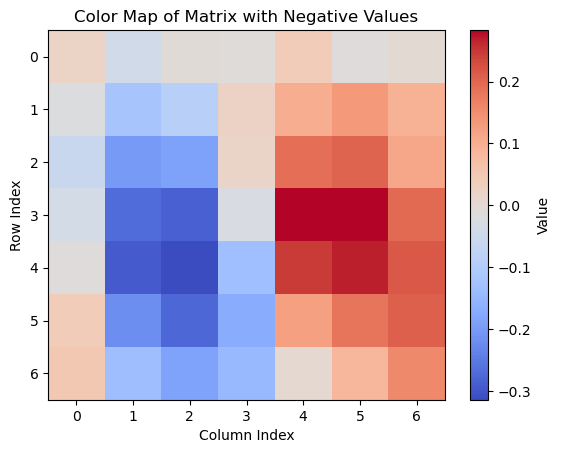

tensor([[-0.0645, -0.0351, -0.0331, -0.0111, -0.0198, -0.0372, -0.0815],
        [-0.0581, -0.0606, -0.0420, -0.0098, -0.0148, -0.0506, -0.0789],
        [-0.0507, -0.0376, -0.0108,  0.0568,  0.0766,  0.0078, -0.0297],
        [-0.0227,  0.0209,  0.0615,  0.2299,  0.2779,  0.1430, -0.0106],
        [-0.0439, -0.0052,  0.1289,  0.3135,  0.3523,  0.1772,  0.0150],
        [-0.0442, -0.0321,  0.0744,  0.1739,  0.2094,  0.1082, -0.0084],
        [-0.0471, -0.0384, -0.0222,  0.0285,  0.0339,  0.0150, -0.0133]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


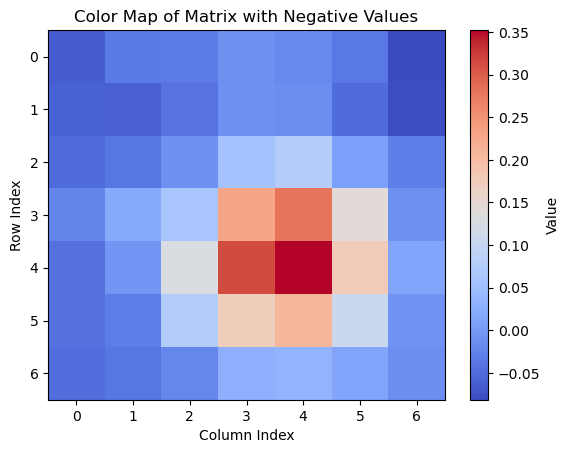

tensor([[ 0.1984,  0.1582,  0.1268,  0.0915,  0.0848,  0.1332,  0.1910],
        [ 0.1436,  0.0662,  0.0200, -0.0764, -0.0865, -0.0397,  0.0849],
        [ 0.1147,  0.0182, -0.0858, -0.2417, -0.2591, -0.1773, -0.0020],
        [ 0.0860, -0.0525, -0.2612, -0.4515, -0.4796, -0.3335, -0.1486],
        [ 0.0769, -0.0953, -0.2749, -0.5280, -0.5763, -0.4050, -0.1614],
        [ 0.1136, -0.0708, -0.1956, -0.4024, -0.4284, -0.3076, -0.1216],
        [ 0.1587,  0.0251, -0.0769, -0.1740, -0.2051, -0.1573, -0.0217]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


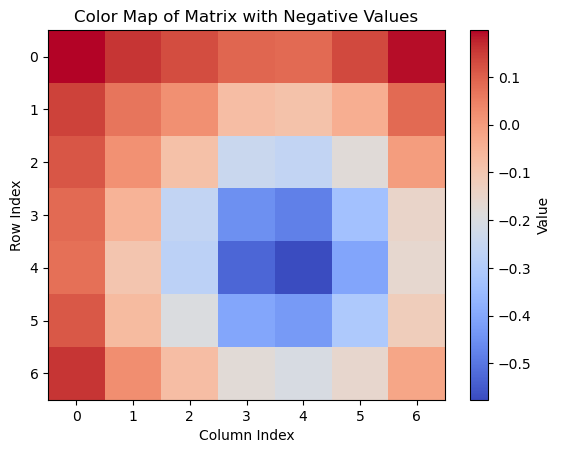

tensor([[-0.1607, -0.0958, -0.0971, -0.0592, -0.0396, -0.0757, -0.1197],
        [-0.0810, -0.0155,  0.0296,  0.0699,  0.1002,  0.0488,  0.0051],
        [-0.0809,  0.0239,  0.1090,  0.1597,  0.1877,  0.1302,  0.0661],
        [-0.0503,  0.0806,  0.1390,  0.2100,  0.2576,  0.2208,  0.1254],
        [-0.0397,  0.0962,  0.1920,  0.2197,  0.2447,  0.2245,  0.1814],
        [-0.0453,  0.0621,  0.1531,  0.1916,  0.2441,  0.1927,  0.1259],
        [-0.0870,  0.0277,  0.0988,  0.1815,  0.1873,  0.1152,  0.0774]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


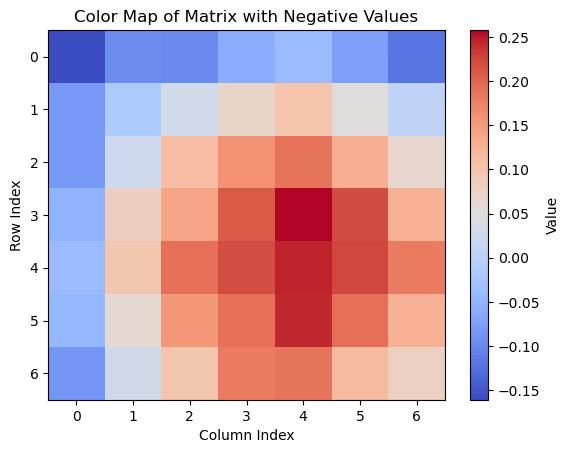

tensor([[-2.1257e-08, -2.6223e-08, -3.5325e-08, -4.4504e-08, -5.0384e-08,
         -4.5023e-08, -4.9466e-08],
        [-4.3016e-08, -4.5519e-08, -4.9208e-08, -5.1900e-08, -5.5937e-08,
         -4.8211e-08, -4.6718e-08],
        [-4.3703e-08, -5.4119e-08, -5.1146e-08, -4.9831e-08, -4.2791e-08,
         -3.2990e-08, -2.9092e-08],
        [-4.4701e-08, -4.2305e-08, -4.3065e-08, -3.4799e-08, -2.8265e-08,
         -1.7754e-08, -1.3217e-08],
        [-4.4142e-08, -3.3996e-08, -2.9949e-08, -3.7381e-08, -3.2552e-08,
         -1.3695e-08, -7.2347e-09],
        [-4.6778e-08, -4.4012e-08, -2.8841e-08, -2.5129e-08, -1.7870e-08,
          3.8867e-09, -1.0015e-09],
        [-4.4392e-08, -6.0737e-08, -4.1348e-08, -1.5781e-08, -3.0372e-09,
          5.2635e-09,  1.3704e-10]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


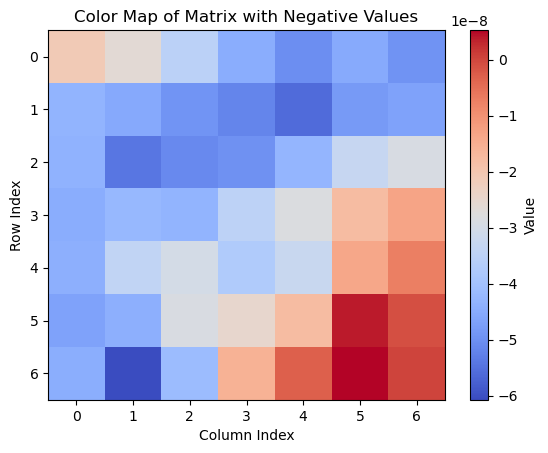

tensor([[-1.6200e-08, -1.4693e-08, -2.1254e-08, -2.5026e-08, -2.6711e-08,
         -2.1999e-08, -2.8592e-08],
        [-2.7801e-08, -2.4062e-08, -2.4576e-08, -2.5656e-08, -2.8163e-08,
         -2.0074e-08, -1.7629e-08],
        [-2.6092e-08, -2.5474e-08, -1.6469e-08, -1.1087e-08, -1.0956e-08,
          1.8866e-09,  6.3697e-09],
        [-2.1970e-08, -1.2336e-08, -4.6943e-09,  7.3765e-09,  1.2369e-08,
          2.2711e-08,  3.4515e-08],
        [-1.7899e-08,  3.1198e-09,  4.9571e-09,  5.9356e-09,  1.2149e-08,
          2.8015e-08,  3.6034e-08],
        [-2.2066e-08, -6.9283e-09,  1.2208e-08,  2.0768e-08,  2.6773e-08,
          4.4550e-08,  4.0139e-08],
        [-2.1861e-08, -3.1823e-08, -7.5290e-09,  2.0590e-08,  3.1134e-08,
          4.0418e-08,  3.2214e-08]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


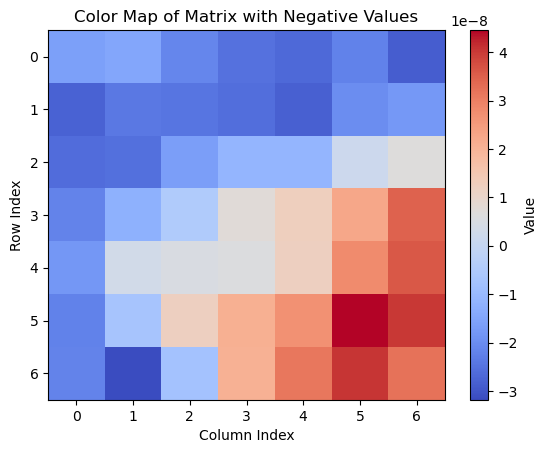

tensor([[-2.1421e-08, -1.7536e-08, -1.4572e-08, -2.6824e-08, -2.4990e-08,
         -1.8288e-08, -2.5262e-08],
        [-3.3230e-08, -2.6968e-08, -2.8314e-08, -3.0678e-08, -2.2353e-08,
         -1.6912e-08, -1.7682e-08],
        [-3.5057e-08, -2.9425e-08, -2.4813e-08, -1.8765e-08, -1.5112e-08,
         -1.1521e-08, -8.0629e-09],
        [-3.3059e-08, -2.4120e-08, -1.6573e-08, -4.0398e-10,  3.3503e-09,
          5.0574e-09,  1.1073e-08],
        [-3.1840e-08, -1.5651e-08, -8.4837e-09, -3.8510e-09, -5.2292e-09,
          3.6002e-09,  1.1500e-08],
        [-3.7887e-08, -2.5901e-08, -4.1095e-09,  7.9635e-09,  8.2984e-09,
          1.8180e-08,  1.5368e-08],
        [-3.5876e-08, -4.3522e-08, -2.1455e-08,  8.9413e-09,  1.9224e-08,
          2.4064e-08,  2.0541e-08]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


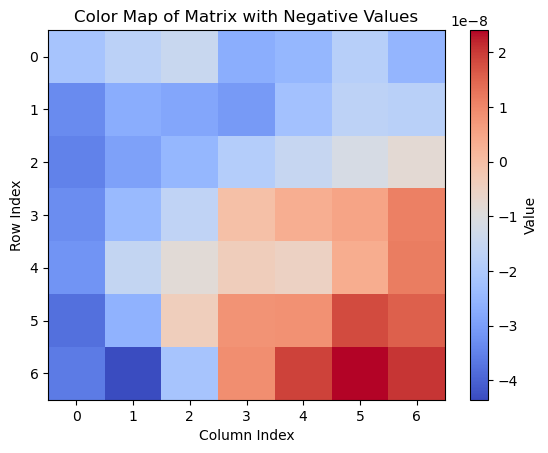

tensor([[-0.0291,  0.0330, -0.0255,  0.0224, -0.0237,  0.0261, -0.0031],
        [-0.0231,  0.0200,  0.0180,  0.0196, -0.0988,  0.1190, -0.0244],
        [-0.0066, -0.0716,  0.1757, -0.0751, -0.1495,  0.2274, -0.0983],
        [ 0.0402, -0.2301,  0.4512, -0.2966, -0.1378,  0.3170, -0.1434],
        [ 0.0634, -0.2990,  0.5647, -0.4392, -0.0497,  0.2840, -0.1507],
        [ 0.0236, -0.1795,  0.3548, -0.2669, -0.0293,  0.1937, -0.0928],
        [-0.0449,  0.0133,  0.1201, -0.0900, -0.0956,  0.1306, -0.0325]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


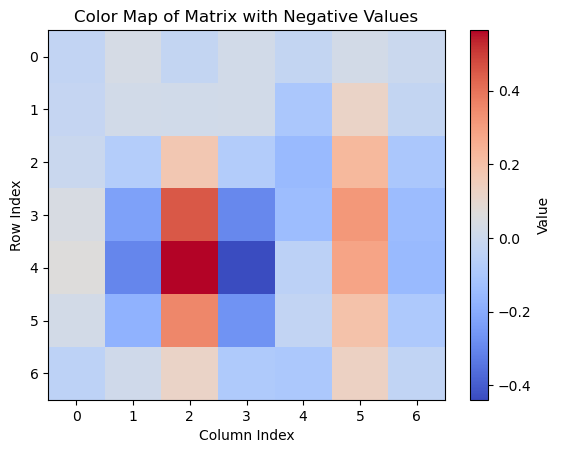

tensor([[-0.0213,  0.0572, -0.0378,  0.0164, -0.0589,  0.0153,  0.0040],
        [-0.0205,  0.0454,  0.0240, -0.0014, -0.1544,  0.1326, -0.0147],
        [-0.0107, -0.0441,  0.2579, -0.1606, -0.2693,  0.2931, -0.0797],
        [ 0.0268, -0.2119,  0.6305, -0.4661, -0.3089,  0.4660, -0.1141],
        [ 0.0504, -0.2734,  0.7567, -0.6440, -0.1965,  0.4324, -0.1259],
        [ 0.0237, -0.1461,  0.4686, -0.4165, -0.1306,  0.2810, -0.0670],
        [-0.0526,  0.0386,  0.1474, -0.1431, -0.1611,  0.1356, -0.0291]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


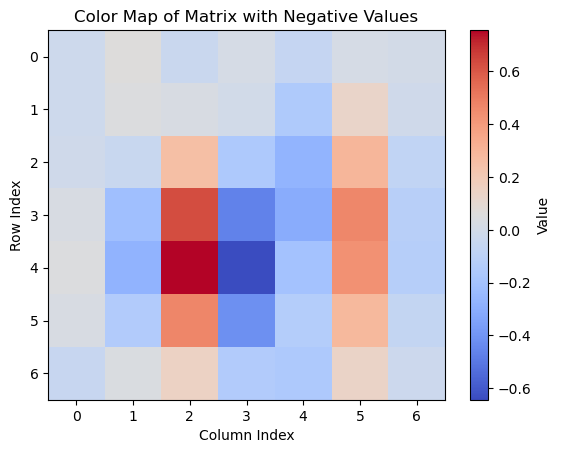

tensor([[-0.0276,  0.0504, -0.0150,  0.0197, -0.0343,  0.0255, -0.0091],
        [-0.0233,  0.0056, -0.0050,  0.0383, -0.0867,  0.0953, -0.0269],
        [-0.0046, -0.0732,  0.1142, -0.0427, -0.1128,  0.1653, -0.0797],
        [ 0.0522, -0.2148,  0.3543, -0.2241, -0.0885,  0.2259, -0.1053],
        [ 0.0800, -0.2769,  0.4634, -0.3529, -0.0146,  0.1873, -0.0902],
        [ 0.0443, -0.1764,  0.2805, -0.2223, -0.0111,  0.1233, -0.0552],
        [-0.0386, -0.0010,  0.0961, -0.0522, -0.0812,  0.0967, -0.0214]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


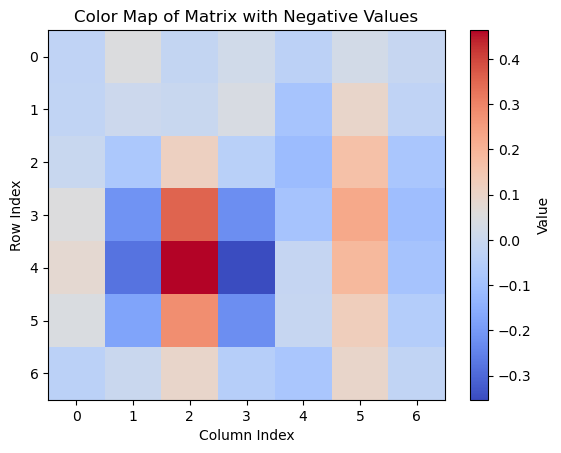

tensor([[-9.0710e-07, -9.6503e-07, -8.7445e-07, -7.0326e-07, -6.0853e-07,
         -5.0336e-07, -5.4747e-07],
        [-6.2226e-07, -7.7595e-07, -6.3654e-07, -3.0173e-07, -2.0800e-07,
         -4.5185e-08, -1.2836e-07],
        [-5.8493e-07, -6.7741e-07, -5.0330e-07, -1.9057e-07, -1.0967e-07,
          3.8327e-08,  3.6472e-08],
        [-5.2097e-07, -5.9098e-07, -3.2325e-07, -6.1005e-08, -4.0937e-08,
          1.1621e-07,  1.3902e-07],
        [-5.3963e-07, -4.7673e-07, -2.5595e-07, -4.1215e-09, -4.1165e-08,
          5.9603e-08,  6.6037e-08],
        [-6.1285e-07, -4.4568e-07, -3.0035e-07, -2.4508e-07, -2.6430e-07,
         -1.8407e-07, -1.4717e-07],
        [-5.7040e-07, -4.1809e-07, -2.9400e-07, -2.8896e-07, -2.6275e-07,
         -1.6405e-07, -1.2619e-07]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


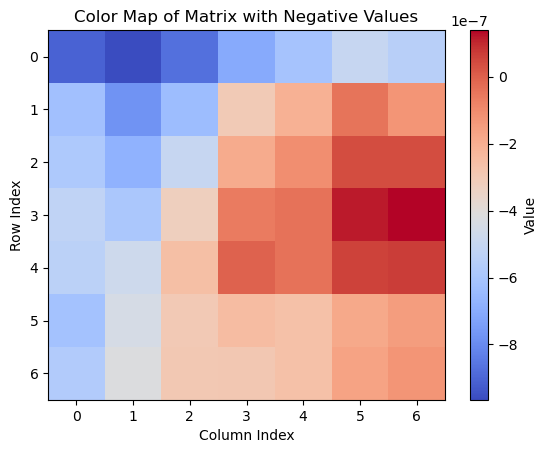

tensor([[-1.4624e-07, -1.4619e-07, -7.6372e-08,  8.9930e-08,  1.0887e-07,
          8.7107e-08, -2.4504e-08],
        [ 1.2966e-07,  6.5703e-08,  1.3716e-07,  4.1233e-07,  4.1540e-07,
          4.8649e-07,  3.1965e-07],
        [ 1.5468e-07,  1.3976e-07,  2.8458e-07,  4.9185e-07,  4.6906e-07,
          5.4324e-07,  4.5305e-07],
        [ 1.1641e-07,  1.7371e-07,  4.4146e-07,  6.2192e-07,  6.0458e-07,
          6.7833e-07,  6.3369e-07],
        [-5.3262e-08,  1.3911e-07,  4.1192e-07,  6.6554e-07,  6.5653e-07,
          6.9589e-07,  6.3420e-07],
        [-2.1347e-07,  9.9297e-08,  3.1455e-07,  4.2303e-07,  4.2732e-07,
          5.1321e-07,  5.0803e-07],
        [-1.5118e-07,  1.2767e-07,  3.4482e-07,  4.2460e-07,  5.1308e-07,
          6.2782e-07,  5.9574e-07]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


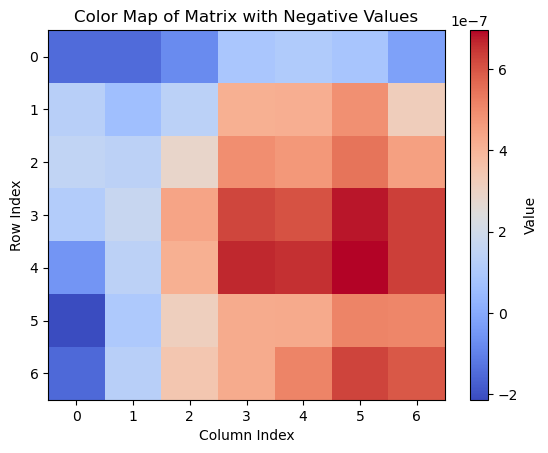

tensor([[3.4759e-07, 3.1328e-07, 3.5038e-07, 5.0226e-07, 4.4751e-07, 3.4962e-07,
         1.5030e-07],
        [5.9306e-07, 5.2947e-07, 5.8072e-07, 8.9652e-07, 8.8792e-07, 8.3005e-07,
         5.4426e-07],
        [6.1422e-07, 5.6181e-07, 6.9244e-07, 9.1559e-07, 9.0225e-07, 8.5933e-07,
         6.5593e-07],
        [6.1509e-07, 6.2894e-07, 8.6520e-07, 1.0130e-06, 9.6377e-07, 9.2421e-07,
         8.0249e-07],
        [4.2554e-07, 6.2635e-07, 8.2304e-07, 1.0849e-06, 1.0616e-06, 9.6645e-07,
         8.0199e-07],
        [2.7730e-07, 6.1919e-07, 7.5740e-07, 9.0849e-07, 9.0132e-07, 8.3407e-07,
         6.8499e-07],
        [3.4262e-07, 6.6519e-07, 8.7741e-07, 1.0121e-06, 1.0311e-06, 1.0167e-06,
         8.6389e-07]], device='cuda:0', grad_fn=<UnbindBackward0>)


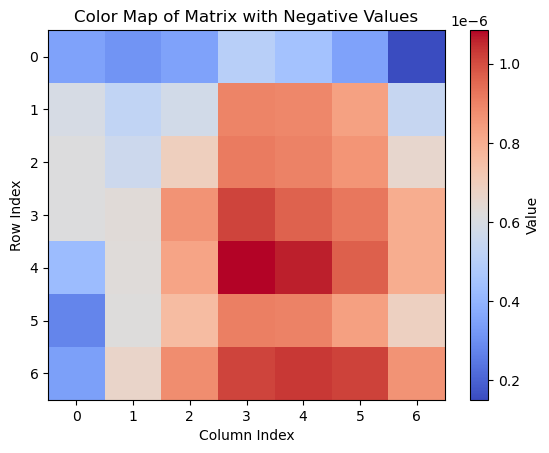

tensor([[-4.2338e-03, -1.2728e-02,  3.8690e-02,  5.1977e-02,  9.4106e-03,
          1.2345e-02,  6.4017e-03],
        [ 1.1858e-02, -7.0899e-02, -1.1276e-01, -9.0640e-02, -8.9948e-02,
         -2.5226e-02,  4.2004e-02],
        [-7.4817e-02, -1.5286e-01, -2.1224e-01, -2.4798e-01, -2.2469e-01,
         -1.2485e-01, -1.6194e-02],
        [ 9.8648e-02,  1.6307e-01,  2.2939e-01,  2.1668e-01,  1.6251e-01,
          1.1481e-01,  8.3482e-02],
        [ 1.1560e-01,  2.4865e-01,  3.8814e-01,  4.5812e-01,  3.2525e-01,
          1.6600e-01,  8.3252e-02],
        [ 1.4254e-02, -4.3058e-02, -5.6956e-02, -6.9117e-02, -8.2165e-02,
         -7.3785e-02, -1.3008e-04],
        [-7.5191e-02, -1.6846e-01, -2.3786e-01, -2.5748e-01, -2.1868e-01,
         -9.2323e-02,  4.5475e-03]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


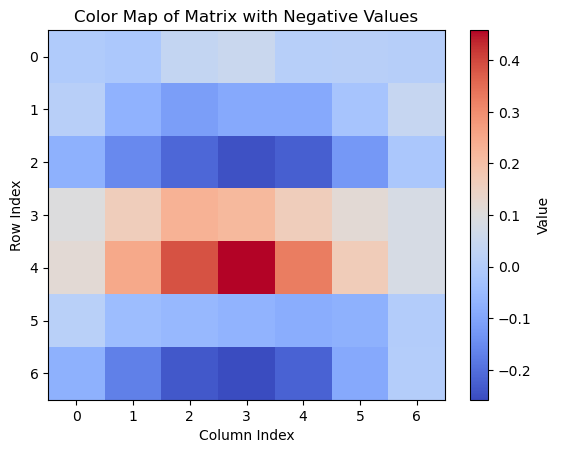

tensor([[-0.0157, -0.0187,  0.0031,  0.0104, -0.0187, -0.0029,  0.0048],
        [-0.0192, -0.1199, -0.2084, -0.1976, -0.1849, -0.0934,  0.0113],
        [-0.0942, -0.1782, -0.2691, -0.3288, -0.3083, -0.1797, -0.0476],
        [ 0.1617,  0.2587,  0.3294,  0.3060,  0.2343,  0.1744,  0.1250],
        [ 0.1752,  0.3517,  0.5130,  0.5969,  0.4381,  0.2444,  0.1477],
        [ 0.0202, -0.0225, -0.0460, -0.0588, -0.0671, -0.0513,  0.0318],
        [-0.0780, -0.1604, -0.2638, -0.2989, -0.2401, -0.0972,  0.0169]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


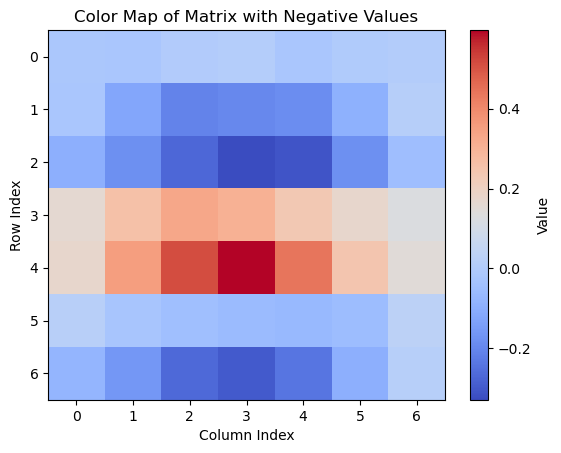

tensor([[-4.7500e-02, -4.3393e-03,  2.6001e-02,  2.9612e-02,  1.6642e-02,
         -2.5202e-04, -2.8433e-02],
        [ 1.4320e-02, -1.4379e-02, -6.6243e-02, -3.9288e-02, -2.9476e-02,
         -4.3031e-03,  2.0158e-02],
        [-5.4173e-02, -9.6941e-02, -1.4679e-01, -1.7300e-01, -1.4612e-01,
         -7.8822e-02, -2.7378e-02],
        [ 6.8778e-02,  9.1191e-02,  1.2836e-01,  1.0814e-01,  8.9822e-02,
          7.4808e-02,  3.9749e-02],
        [ 6.9630e-02,  1.4436e-01,  2.1737e-01,  2.7654e-01,  1.9251e-01,
          8.7104e-02,  3.7464e-02],
        [ 8.0845e-03, -3.2196e-02, -6.7084e-02, -7.5746e-02, -6.5085e-02,
         -5.3150e-02, -2.8225e-03],
        [-1.9523e-02, -3.5133e-02, -8.7547e-02, -1.0370e-01, -7.0439e-02,
         -6.2777e-03,  1.1040e-02]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


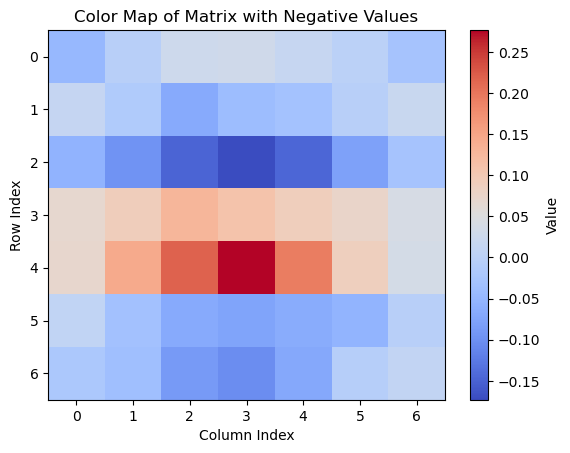

tensor([[ 4.8773e-02,  2.8099e-02,  5.5010e-02, -4.1104e-02, -1.6248e-01,
         -8.2555e-02,  6.4051e-02],
        [ 2.9819e-02,  7.6995e-02,  1.5263e-01,  1.4303e-01, -1.0155e-01,
         -2.5198e-01, -1.3002e-01],
        [-6.3453e-02, -6.3502e-05,  1.9082e-01,  3.6661e-01,  2.5357e-01,
         -1.0327e-01, -1.8802e-01],
        [-1.2711e-01, -2.0723e-01, -1.9182e-02,  2.8552e-01,  4.1215e-01,
          1.4166e-01, -5.2962e-02],
        [-5.9176e-02, -2.4188e-01, -2.2486e-01, -3.6024e-02,  1.9561e-01,
          1.5404e-01,  1.9747e-02],
        [ 5.7911e-02, -1.1336e-01, -1.6516e-01, -1.2249e-01,  6.0254e-02,
          1.2490e-01,  3.5762e-02],
        [ 1.2115e-01, -1.9563e-02, -1.2198e-01, -1.5844e-01, -4.7838e-02,
          6.5338e-02,  1.5059e-02]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


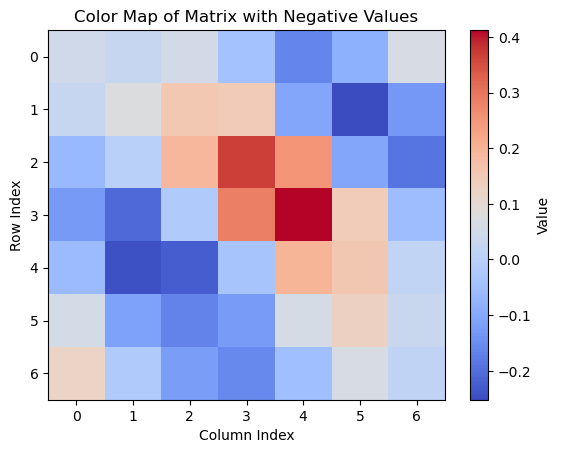

tensor([[ 0.0514,  0.0309,  0.0484, -0.0634, -0.2122, -0.1204,  0.0569],
        [ 0.0267,  0.0963,  0.1742,  0.1774, -0.1345, -0.3254, -0.1716],
        [-0.0779,  0.0058,  0.2251,  0.4655,  0.3145, -0.1257, -0.2214],
        [-0.1585, -0.2253,  0.0062,  0.3817,  0.5041,  0.1629, -0.0631],
        [-0.0980, -0.2699, -0.2379,  0.0019,  0.2472,  0.1681,  0.0243],
        [ 0.0222, -0.1391, -0.1983, -0.1283,  0.0715,  0.1318,  0.0392],
        [ 0.1009, -0.0314, -0.1304, -0.1627, -0.0350,  0.0847,  0.0327]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


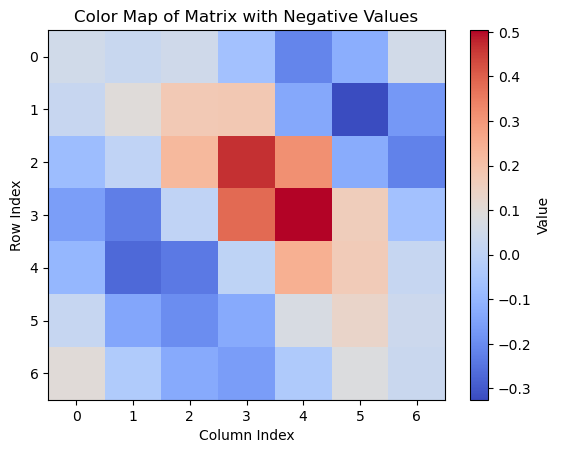

tensor([[ 0.0071, -0.0144,  0.0091, -0.0370, -0.1332, -0.0522,  0.0698],
        [ 0.0207,  0.0424,  0.0749,  0.1083, -0.0811, -0.1799, -0.0550],
        [-0.0255, -0.0030,  0.0939,  0.2646,  0.1937, -0.0867, -0.1141],
        [-0.0599, -0.1318, -0.0288,  0.1732,  0.2609,  0.0670, -0.0363],
        [ 0.0017, -0.1122, -0.1365, -0.0480,  0.0774,  0.0452, -0.0135],
        [ 0.0412, -0.0329, -0.0794, -0.0797,  0.0138,  0.0467, -0.0107],
        [ 0.0797,  0.0106, -0.0523, -0.0841, -0.0219,  0.0727,  0.0397]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


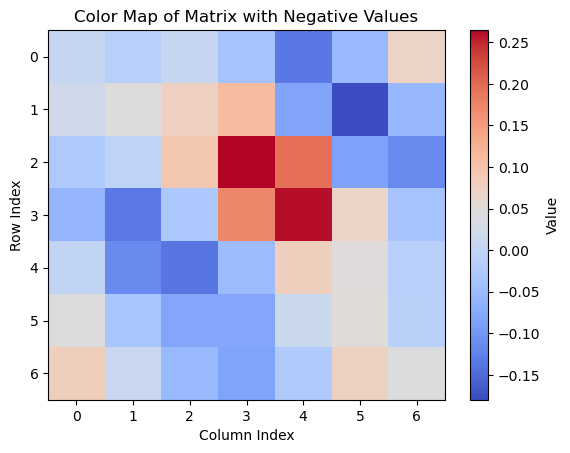

tensor([[ 0.0060,  0.0093,  0.0020,  0.0070,  0.0192,  0.0410,  0.0531],
        [ 0.0242,  0.0329,  0.0342,  0.0483,  0.0650,  0.0597,  0.0559],
        [ 0.0287,  0.0444,  0.0525,  0.0654,  0.0542,  0.0290,  0.0222],
        [ 0.0351, -0.0111, -0.0464, -0.0348, -0.0843, -0.1196, -0.1098],
        [-0.0022, -0.0529, -0.0915, -0.1036, -0.1375, -0.1613, -0.1424],
        [ 0.0214,  0.0207,  0.0170,  0.0027, -0.0280, -0.0089,  0.0041],
        [ 0.0205,  0.0226,  0.0399,  0.0553,  0.0343,  0.0374,  0.0418]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


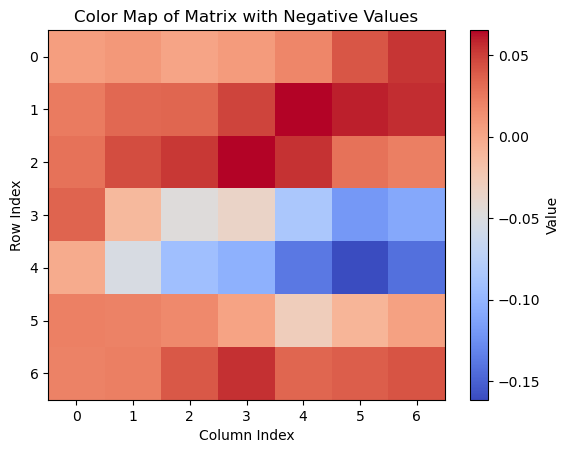

tensor([[ 0.0034, -0.0029,  0.0137,  0.0286,  0.0263,  0.0241,  0.0286],
        [ 0.0080,  0.0094,  0.0261,  0.0498,  0.0557,  0.0413,  0.0298],
        [ 0.0094,  0.0162,  0.0311,  0.0463,  0.0341,  0.0118,  0.0086],
        [ 0.0101, -0.0527, -0.0835, -0.0679, -0.1097, -0.1422, -0.1294],
        [-0.0124, -0.0730, -0.0987, -0.1039, -0.1349, -0.1622, -0.1310],
        [ 0.0136,  0.0192,  0.0361,  0.0302, -0.0051,  0.0019,  0.0230],
        [ 0.0155,  0.0164,  0.0459,  0.0660,  0.0335,  0.0325,  0.0450]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


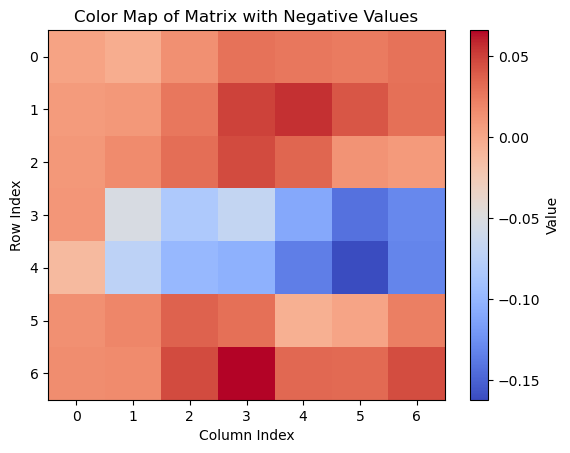

tensor([[ 0.0024, -0.0362, -0.0284, -0.0316, -0.0466, -0.0488, -0.0387],
        [-0.0068, -0.0452, -0.0401, -0.0284, -0.0314, -0.0400, -0.0416],
        [-0.0059, -0.0352, -0.0246, -0.0066, -0.0068, -0.0220, -0.0175],
        [ 0.0043, -0.0688, -0.0856, -0.0493, -0.0707, -0.0897, -0.0862],
        [-0.0060, -0.0602, -0.0625, -0.0451, -0.0593, -0.0708, -0.0539],
        [ 0.0206,  0.0202,  0.0447,  0.0586,  0.0417,  0.0516,  0.0617],
        [ 0.0094, -0.0022,  0.0267,  0.0543,  0.0271,  0.0306,  0.0461]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


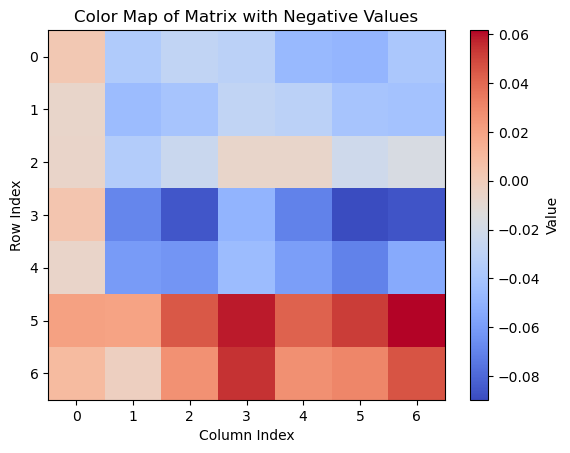

tensor([[ 6.3169e-07,  9.5991e-07,  8.0997e-07,  3.7733e-07,  7.1412e-07,
          4.6278e-07, -3.5342e-08],
        [ 1.1915e-06,  1.5061e-06,  1.3726e-06,  1.0923e-06,  1.3227e-06,
          1.1810e-06,  8.1140e-07],
        [ 1.0463e-06,  1.4247e-06,  1.3345e-06,  1.0844e-06,  9.2797e-07,
          8.8486e-07,  1.0065e-06],
        [ 1.5363e-06,  2.1231e-06,  1.9483e-06,  1.6443e-06,  1.7740e-06,
          1.6742e-06,  1.3508e-06],
        [ 1.8014e-06,  2.3581e-06,  2.0733e-06,  1.5833e-06,  1.8529e-06,
          2.0881e-06,  1.9888e-06],
        [ 1.3773e-06,  1.7442e-06,  1.6513e-06,  1.4467e-06,  1.5633e-06,
          1.6800e-06,  1.7617e-06],
        [ 1.3712e-06,  1.2858e-06,  1.5146e-06,  1.6555e-06,  1.8981e-06,
          1.4104e-06,  1.1109e-06]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


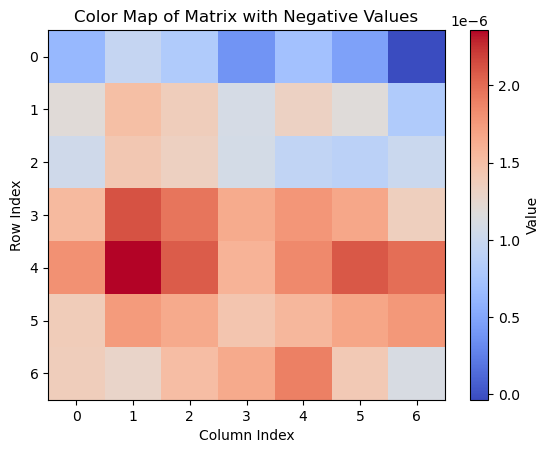

tensor([[-2.1974e-06, -1.7407e-06, -1.3059e-06, -1.5630e-06, -1.5065e-06,
         -1.9710e-06, -2.5788e-06],
        [-2.0134e-06, -1.4841e-06, -8.1148e-07, -7.7011e-07, -7.0615e-07,
         -1.1516e-06, -1.9207e-06],
        [-1.8072e-06, -8.0838e-07, -1.9028e-07, -1.8591e-07, -5.9023e-07,
         -9.4998e-07, -1.3436e-06],
        [-1.0160e-06,  2.6359e-07,  6.4481e-07,  2.9499e-07,  1.6572e-07,
         -1.4964e-07, -9.7664e-07],
        [-8.5011e-07,  3.9234e-07,  6.0709e-07,  1.1098e-07,  2.5838e-07,
          2.3745e-07, -4.2236e-07],
        [-1.4718e-06, -5.1917e-07, -2.6763e-08, -1.7972e-07, -1.1062e-07,
         -5.9989e-08, -4.8235e-07],
        [-1.3410e-06, -1.1178e-06, -5.7822e-07, -3.9080e-07, -1.5377e-07,
         -5.2610e-07, -1.1117e-06]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


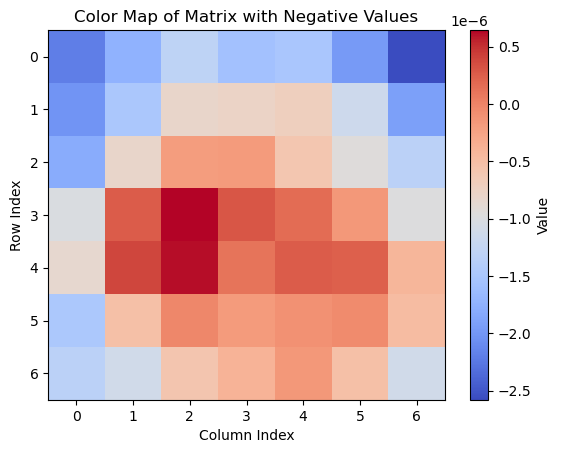

tensor([[-5.4971e-06, -5.2002e-06, -4.8066e-06, -4.9669e-06, -4.7044e-06,
         -4.9641e-06, -5.4298e-06],
        [-5.7081e-06, -5.2344e-06, -4.4616e-06, -4.4679e-06, -4.3530e-06,
         -4.6478e-06, -5.1304e-06],
        [-5.4485e-06, -4.7132e-06, -3.8416e-06, -3.8005e-06, -4.1327e-06,
         -4.3583e-06, -4.4797e-06],
        [-5.0438e-06, -3.9546e-06, -3.1370e-06, -3.3936e-06, -3.4364e-06,
         -3.6890e-06, -4.2341e-06],
        [-4.9147e-06, -3.5981e-06, -3.0976e-06, -3.5512e-06, -3.4354e-06,
         -3.3482e-06, -3.8138e-06],
        [-4.9810e-06, -3.9282e-06, -3.0728e-06, -3.0483e-06, -3.0418e-06,
         -3.0579e-06, -3.4315e-06],
        [-4.4064e-06, -4.1290e-06, -3.3193e-06, -2.9650e-06, -2.7135e-06,
         -3.0981e-06, -3.5754e-06]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


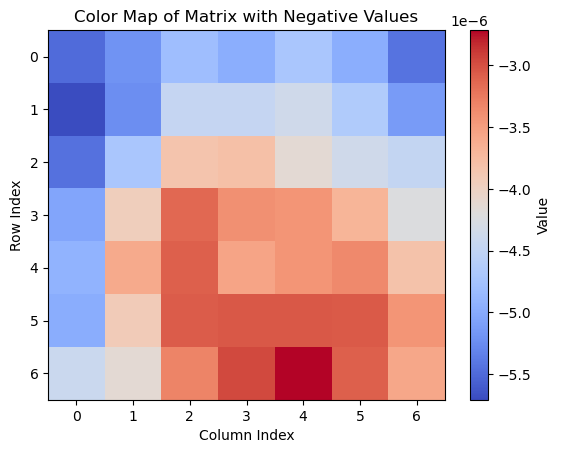

tensor([[-0.0561, -0.0707, -0.0023,  0.0640,  0.1230,  0.0453, -0.0114],
        [-0.1630, -0.1363, -0.0334,  0.0431,  0.1427,  0.1215,  0.1057],
        [-0.1965, -0.1719, -0.0828,  0.0292,  0.1671,  0.1598,  0.1498],
        [-0.1761, -0.1926, -0.1050,  0.0088,  0.1492,  0.1514,  0.1634],
        [-0.1583, -0.1878, -0.0887, -0.0006,  0.1418,  0.1447,  0.1517],
        [-0.1495, -0.1843, -0.0883, -0.0042,  0.1162,  0.1197,  0.1342],
        [-0.1338, -0.1812, -0.0992, -0.0074,  0.0945,  0.1012,  0.1263]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


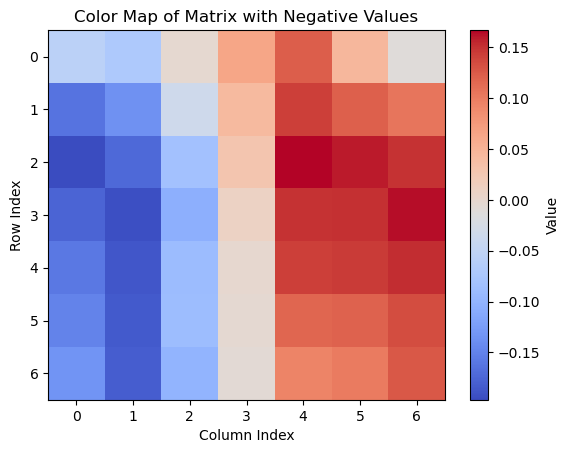

tensor([[-0.0781, -0.1085, -0.0288,  0.0559,  0.1308,  0.0777,  0.0294],
        [-0.2044, -0.1919, -0.0771,  0.0258,  0.1446,  0.1490,  0.1508],
        [-0.2382, -0.2342, -0.1277,  0.0175,  0.1810,  0.2083,  0.2231],
        [-0.2160, -0.2499, -0.1428,  0.0090,  0.1853,  0.2301,  0.2646],
        [-0.1983, -0.2459, -0.1245, -0.0025,  0.1797,  0.2268,  0.2542],
        [-0.1908, -0.2431, -0.1283, -0.0158,  0.1333,  0.1767,  0.2092],
        [-0.1531, -0.2226, -0.1291, -0.0197,  0.1005,  0.1379,  0.1820]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


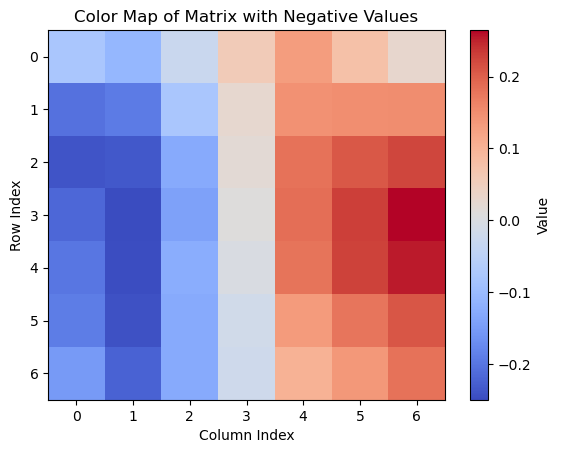

tensor([[ 0.0019, -0.0609, -0.0071,  0.0386,  0.0843,  0.0202, -0.0263],
        [-0.0893, -0.1307, -0.0493, -0.0049,  0.0678,  0.0620,  0.0643],
        [-0.1076, -0.1495, -0.0965, -0.0264,  0.0805,  0.1000,  0.1128],
        [-0.0766, -0.1598, -0.1043, -0.0265,  0.0973,  0.1260,  0.1599],
        [-0.0566, -0.1527, -0.0850, -0.0257,  0.1028,  0.1302,  0.1486],
        [-0.0383, -0.1471, -0.0908, -0.0408,  0.0615,  0.0874,  0.1164],
        [-0.0017, -0.1206, -0.0774, -0.0306,  0.0483,  0.0719,  0.1136]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


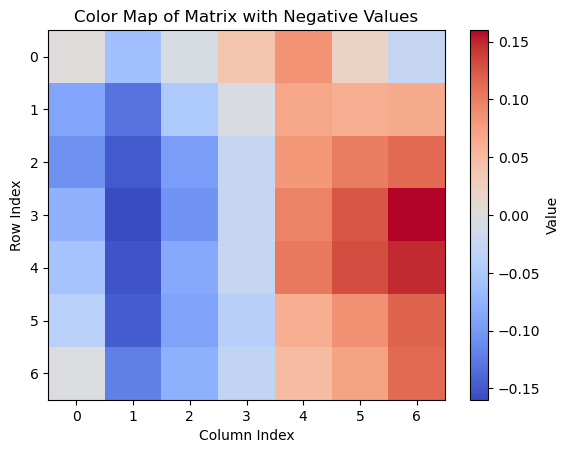

tensor([[ 0.0223,  0.0285,  0.0923,  0.0933,  0.0169, -0.2250, -0.3056],
        [-0.0160,  0.0210,  0.1666,  0.3789,  0.4397,  0.1977, -0.0773],
        [-0.0441, -0.0918,  0.0182,  0.2917,  0.5832,  0.5073,  0.2040],
        [-0.0555, -0.1937, -0.2583, -0.1433,  0.2723,  0.4542,  0.3229],
        [-0.0515, -0.2192, -0.3592, -0.5075, -0.2819,  0.0386,  0.1508],
        [ 0.1093, -0.0226, -0.1801, -0.4200, -0.3719, -0.1498,  0.0189],
        [ 0.1825,  0.1535,  0.0381, -0.2155, -0.2887, -0.1929, -0.0641]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


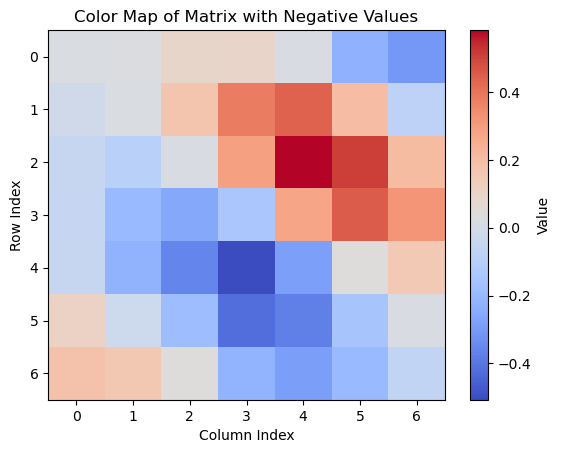

tensor([[-1.6743e-04, -1.4544e-02, -7.9170e-03, -3.7050e-02,  4.0526e-05,
          1.1996e-02,  7.1920e-02],
        [-1.3358e-02, -5.2556e-03, -2.7963e-02, -4.6791e-02, -6.3254e-02,
         -7.6265e-02, -2.5623e-02],
        [ 1.0518e-02,  8.2414e-03, -3.6036e-03, -4.9884e-02, -6.8802e-02,
         -1.0683e-01, -7.3523e-02],
        [ 1.2508e-02,  2.1760e-02,  2.0908e-02, -1.5470e-02,  1.0213e-02,
         -5.1667e-02, -6.0166e-02],
        [-9.9592e-03,  8.4092e-03,  2.8494e-02, -1.1905e-02,  1.0531e-02,
         -2.6179e-02, -3.9978e-02],
        [ 8.5615e-04,  1.3142e-02,  4.2716e-02,  3.6088e-02,  6.6429e-02,
          4.5174e-02,  3.3190e-03],
        [ 9.3806e-03,  3.5549e-02,  6.4390e-02,  5.5683e-02,  5.7602e-02,
          6.5639e-02,  6.3733e-02]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


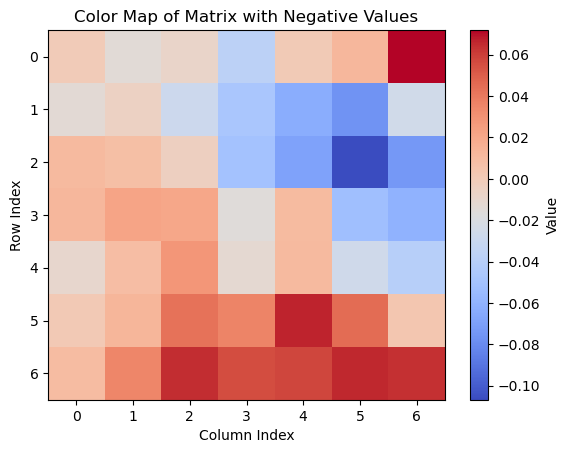

tensor([[ 0.0027, -0.0279, -0.0599, -0.0896,  0.0177,  0.1974,  0.2867],
        [ 0.0133, -0.0059, -0.1355, -0.3103, -0.3552, -0.1216,  0.1003],
        [ 0.0308,  0.0519, -0.0225, -0.2776, -0.5311, -0.4384, -0.1388],
        [ 0.0737,  0.1956,  0.2630,  0.1468, -0.1960, -0.3778, -0.2168],
        [ 0.0457,  0.1790,  0.3627,  0.4523,  0.2313, -0.0607, -0.1100],
        [-0.0839, -0.0046,  0.1595,  0.3609,  0.3441,  0.1418, -0.0267],
        [-0.1539, -0.1796, -0.0695,  0.1521,  0.2003,  0.1150,  0.0272]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


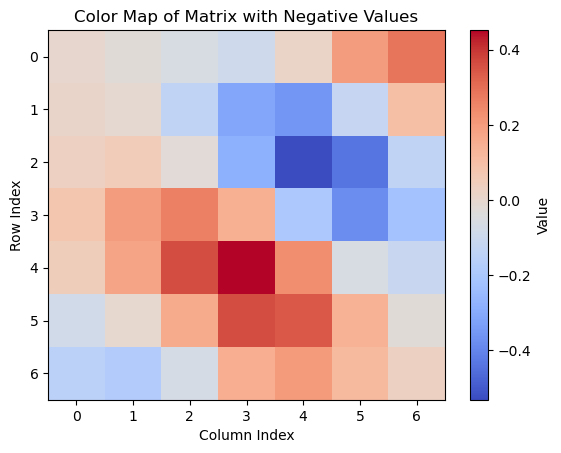

tensor([[-0.0511, -0.0568, -0.0472, -0.0147,  0.0157,  0.0060, -0.0190],
        [-0.0279, -0.0028,  0.0088,  0.0853,  0.1454,  0.1104,  0.0551],
        [-0.0472, -0.0079,  0.0293,  0.1512,  0.1971,  0.1437,  0.0958],
        [-0.0588, -0.0191,  0.0380,  0.1483,  0.2037,  0.1773,  0.0972],
        [-0.0313,  0.0074,  0.0372,  0.1154,  0.1673,  0.1520,  0.0705],
        [-0.0448,  0.0032,  0.0052,  0.0629,  0.0809,  0.0819,  0.0486],
        [-0.0494, -0.0126,  0.0048,  0.0465,  0.0372,  0.0195,  0.0063]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


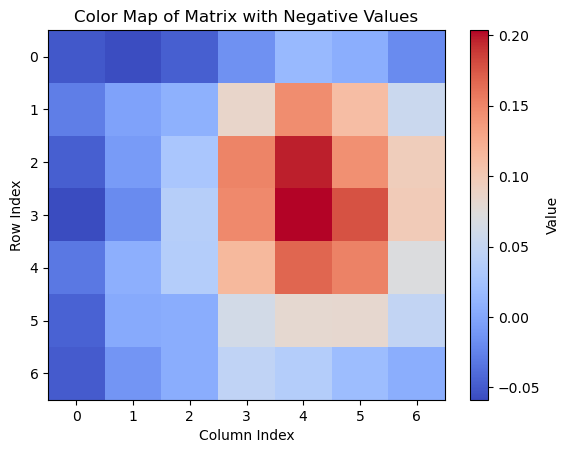

tensor([[ 0.0686,  0.0379,  0.0237, -0.0143, -0.0189,  0.0072,  0.0186],
        [ 0.0443,  0.0180, -0.0268, -0.0541, -0.0546, -0.0387, -0.0305],
        [ 0.0282, -0.0009, -0.0590, -0.0958, -0.1168, -0.1027, -0.0566],
        [-0.0063, -0.0385, -0.0878, -0.1669, -0.1911, -0.1344, -0.0960],
        [ 0.0167, -0.0159, -0.0877, -0.1843, -0.2083, -0.1369, -0.1070],
        [ 0.0393,  0.0269, -0.0602, -0.1477, -0.1693, -0.0888, -0.0264],
        [ 0.0427,  0.0240, -0.0251, -0.0843, -0.1040, -0.0582, -0.0174]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


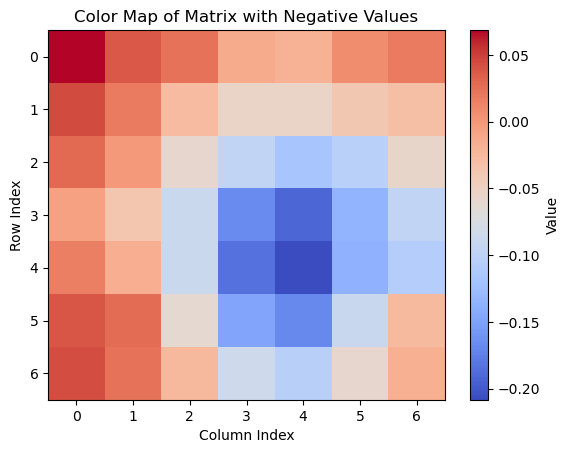

tensor([[-0.0043,  0.0157,  0.0010, -0.0171, -0.0173, -0.0369, -0.0331],
        [ 0.0173,  0.0314,  0.0108,  0.0328,  0.0407,  0.0120,  0.0055],
        [-0.0003,  0.0308,  0.0200,  0.0643,  0.0559,  0.0186,  0.0420],
        [-0.0098,  0.0391,  0.0569,  0.0682,  0.0558,  0.0542,  0.0619],
        [ 0.0205,  0.0677,  0.0595,  0.0438,  0.0372,  0.0508,  0.0471],
        [-0.0035,  0.0658,  0.0317,  0.0176,  0.0075,  0.0351,  0.0556],
        [ 0.0058,  0.0694,  0.0568,  0.0599,  0.0395,  0.0358,  0.0383]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


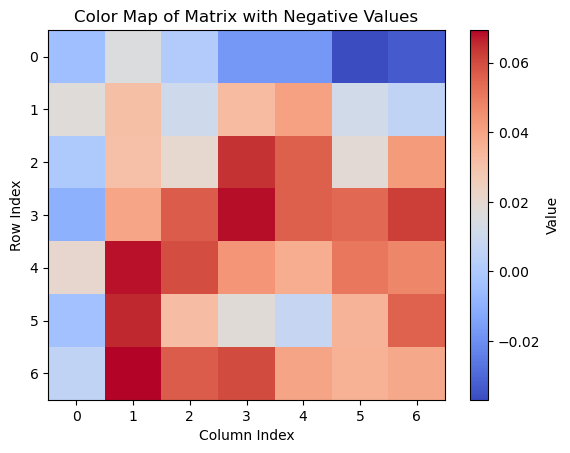

tensor([[0.0240, 0.0469, 0.0438, 0.0397, 0.0375, 0.0163, 0.0092],
        [0.0243, 0.0463, 0.0387, 0.0430, 0.0459, 0.0291, 0.0162],
        [0.0323, 0.0520, 0.0492, 0.0501, 0.0526, 0.0357, 0.0295],
        [0.0362, 0.0499, 0.0452, 0.0455, 0.0497, 0.0314, 0.0348],
        [0.0374, 0.0483, 0.0407, 0.0412, 0.0410, 0.0236, 0.0322],
        [0.0342, 0.0461, 0.0422, 0.0388, 0.0291, 0.0110, 0.0203],
        [0.0264, 0.0427, 0.0453, 0.0447, 0.0390, 0.0201, 0.0161]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


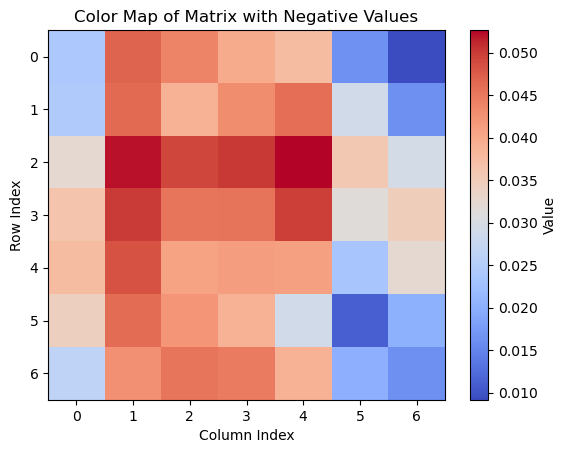

tensor([[-0.0402, -0.0245, -0.0135, -0.0175, -0.0252, -0.0522, -0.0523],
        [-0.0497, -0.0209, -0.0007,  0.0133,  0.0124, -0.0242, -0.0489],
        [-0.0235,  0.0202,  0.0507,  0.0654,  0.0628,  0.0200, -0.0145],
        [-0.0038,  0.0392,  0.0673,  0.0757,  0.0680,  0.0264,  0.0076],
        [-0.0048,  0.0298,  0.0502,  0.0581,  0.0433,  0.0071,  0.0023],
        [-0.0182,  0.0066,  0.0261,  0.0311,  0.0092, -0.0249, -0.0214],
        [-0.0336, -0.0166,  0.0016,  0.0129,  0.0038, -0.0240, -0.0309]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


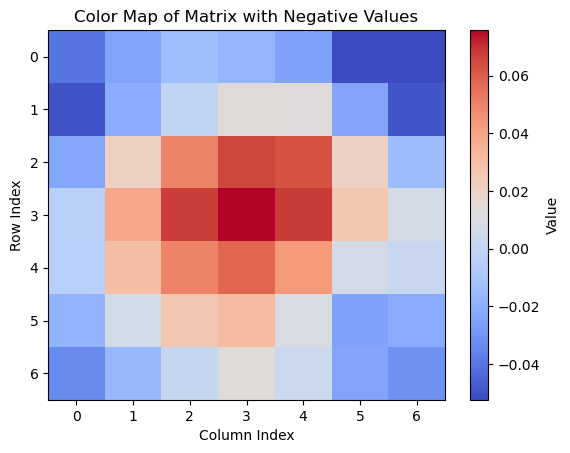

tensor([[-0.0232, -0.0260, -0.0200, -0.0193, -0.0200, -0.0332, -0.0199],
        [-0.0463, -0.0423, -0.0292, -0.0120, -0.0075, -0.0273, -0.0279],
        [-0.0359, -0.0158,  0.0146,  0.0338,  0.0324,  0.0022, -0.0071],
        [-0.0166,  0.0060,  0.0365,  0.0519,  0.0420,  0.0078,  0.0071],
        [-0.0063,  0.0064,  0.0261,  0.0376,  0.0223, -0.0114,  0.0037],
        [-0.0051, -0.0033,  0.0105,  0.0189, -0.0015, -0.0286, -0.0056],
        [-0.0030, -0.0046,  0.0041,  0.0174,  0.0138, -0.0087,  0.0014]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


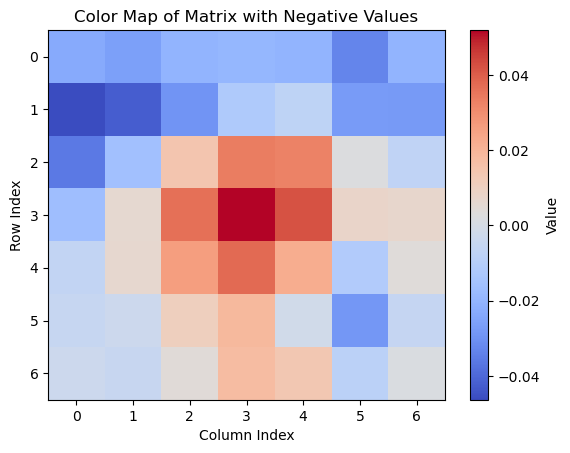

tensor([[ 0.0072, -0.0089, -0.0007, -0.0144, -0.0164, -0.0054, -0.0261],
        [-0.0160, -0.0085, -0.0046, -0.0070, -0.0097,  0.0009, -0.0222],
        [-0.0094, -0.0038, -0.0036, -0.0219, -0.0140, -0.0101, -0.0353],
        [-0.0036, -0.0048, -0.0110,  0.0017,  0.1693,  0.1122, -0.0308],
        [-0.0056, -0.0059, -0.0325, -0.0050,  0.1887,  0.1172, -0.0451],
        [-0.0182, -0.0061, -0.0102, -0.0455, -0.0133, -0.0287, -0.0593],
        [-0.0244, -0.0201, -0.0066, -0.0268, -0.0401, -0.0264, -0.0559]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


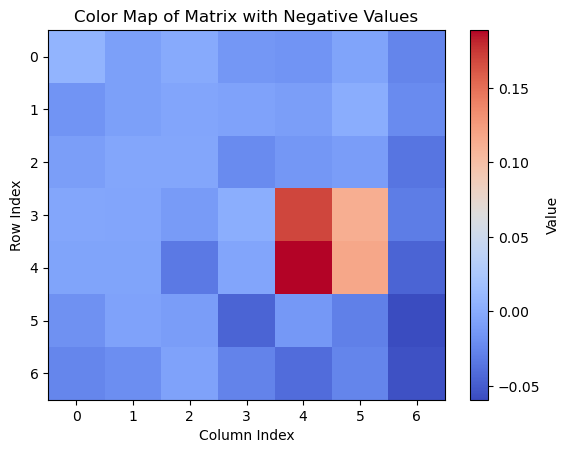

tensor([[-0.0092, -0.0181, -0.0038, -0.0124, -0.0177, -0.0059, -0.0173],
        [-0.0271, -0.0162, -0.0108, -0.0134, -0.0214, -0.0114, -0.0231],
        [-0.0193, -0.0147, -0.0120, -0.0206, -0.0149, -0.0084, -0.0326],
        [ 0.0015,  0.0053,  0.0135,  0.0575,  0.2404,  0.1781,  0.0156],
        [ 0.0040,  0.0106,  0.0030,  0.0667,  0.2768,  0.2001,  0.0083],
        [-0.0157,  0.0045,  0.0113, -0.0007,  0.0370,  0.0265, -0.0184],
        [-0.0160, -0.0027,  0.0263,  0.0232,  0.0093,  0.0327, -0.0003]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


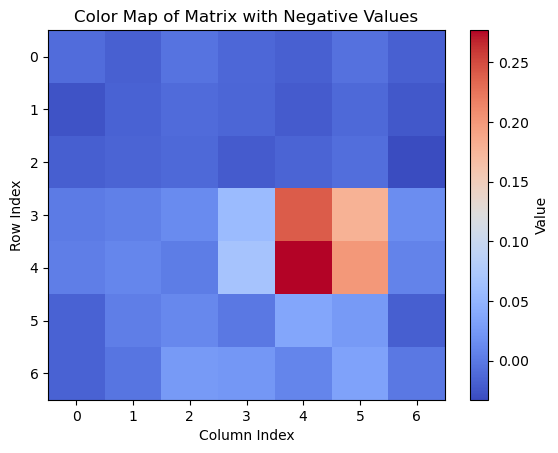

tensor([[ 0.0200,  0.0011,  0.0159,  0.0200,  0.0258,  0.0365,  0.0170],
        [ 0.0049, -0.0036, -0.0016,  0.0132,  0.0165,  0.0266,  0.0080],
        [ 0.0125, -0.0076, -0.0151, -0.0212, -0.0119, -0.0005, -0.0162],
        [ 0.0295,  0.0012, -0.0072,  0.0190,  0.1957,  0.1478,  0.0089],
        [ 0.0242, -0.0014, -0.0335,  0.0069,  0.2064,  0.1421, -0.0175],
        [-0.0014, -0.0126, -0.0271, -0.0583, -0.0337, -0.0292, -0.0451],
        [-0.0056, -0.0150,  0.0004, -0.0081, -0.0199,  0.0121, -0.0062]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


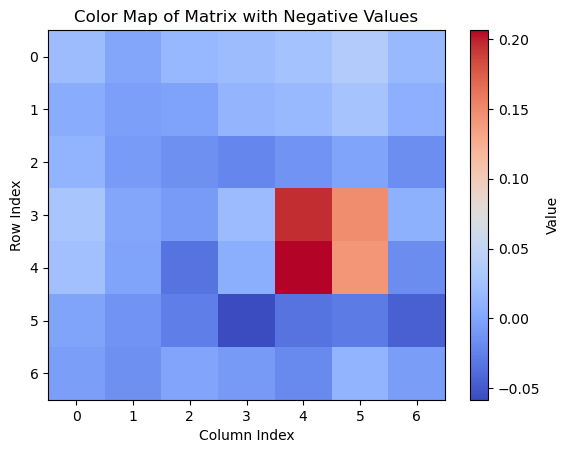

tensor([[-0.0355,  0.0268,  0.0233,  0.0830,  0.0908,  0.0864,  0.0411],
        [ 0.0610,  0.0918,  0.0749,  0.1109,  0.1175,  0.0762, -0.0096],
        [ 0.0836,  0.0788,  0.0728,  0.0958,  0.0902,  0.0309, -0.0663],
        [ 0.0995,  0.0569,  0.0472,  0.0643,  0.0338, -0.0442, -0.0967],
        [ 0.0452,  0.0095, -0.0036,  0.0097, -0.0385, -0.1260, -0.1475],
        [-0.0023, -0.0272, -0.0610, -0.0802, -0.1274, -0.2034, -0.1858],
        [-0.0505, -0.1015, -0.1271, -0.1881, -0.2111, -0.2178, -0.1172]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


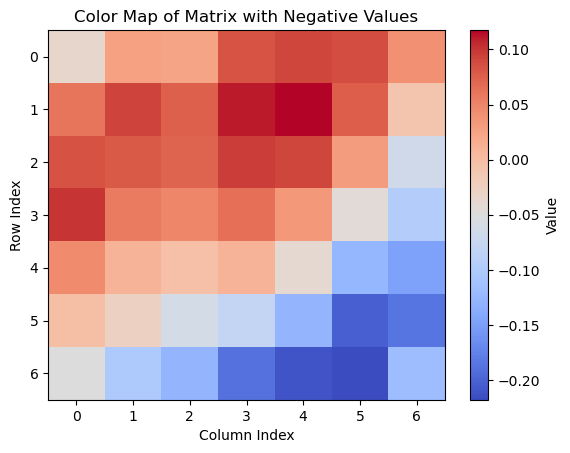

tensor([[-4.3226e-03,  4.3063e-02,  4.4881e-02,  1.0233e-01,  1.0000e-01,
          9.4832e-02,  6.1075e-02],
        [ 7.0371e-02,  8.0863e-02,  6.0878e-02,  9.7334e-02,  9.6976e-02,
          4.5786e-02, -2.8323e-02],
        [ 7.7618e-02,  6.0235e-02,  6.1756e-02,  8.6210e-02,  7.2758e-02,
         -1.4927e-03, -9.0348e-02],
        [ 7.7469e-02,  3.0684e-02,  3.3530e-02,  4.7190e-02,  1.5019e-05,
         -8.9774e-02, -1.3445e-01],
        [ 2.8235e-02, -1.2737e-02, -2.4465e-02, -1.4326e-02, -7.4925e-02,
         -1.6968e-01, -1.8168e-01],
        [ 7.4868e-03, -3.0182e-02, -7.7248e-02, -1.0175e-01, -1.5737e-01,
         -2.3114e-01, -2.0079e-01],
        [-3.2304e-02, -9.5000e-02, -1.2643e-01, -1.9882e-01, -2.3129e-01,
         -2.2827e-01, -1.1655e-01]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


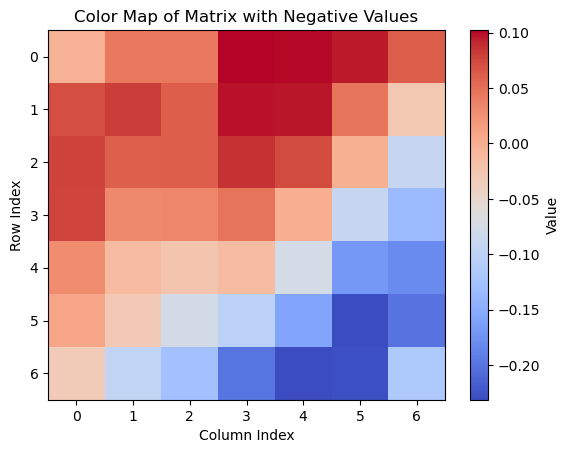

tensor([[-0.0209,  0.0107,  0.0130,  0.0680,  0.0766,  0.0779,  0.0431],
        [ 0.0359,  0.0382,  0.0222,  0.0618,  0.0692,  0.0366, -0.0326],
        [ 0.0506,  0.0257,  0.0290,  0.0519,  0.0597,  0.0065, -0.0727],
        [ 0.0557,  0.0100,  0.0124,  0.0446,  0.0318, -0.0366, -0.0748],
        [ 0.0145, -0.0172, -0.0198,  0.0104, -0.0121, -0.0833, -0.0936],
        [ 0.0279,  0.0021, -0.0258, -0.0280, -0.0480, -0.1057, -0.0979],
        [-0.0110, -0.0546, -0.0693, -0.1193, -0.1275, -0.1336, -0.0453]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


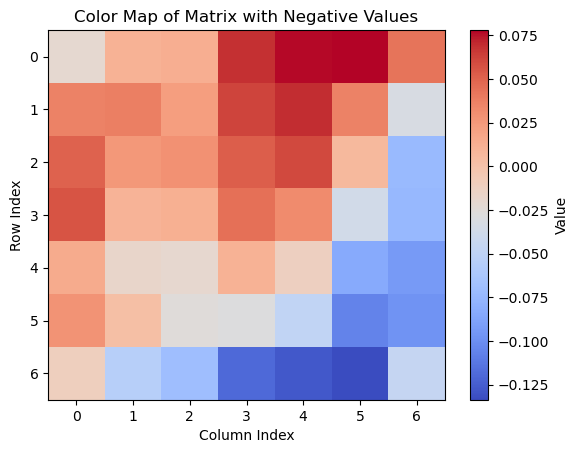

tensor([[-0.0301,  0.0250,  0.0287, -0.0616, -0.0829, -0.0447,  0.0592],
        [-0.0200,  0.0480,  0.0208, -0.1638, -0.1550,  0.0081,  0.1326],
        [-0.0039,  0.0788, -0.0174, -0.2754, -0.2217,  0.0722,  0.2227],
        [ 0.0152,  0.0919, -0.0361, -0.3155, -0.2175,  0.1388,  0.2882],
        [ 0.0100,  0.0817, -0.0754, -0.2906, -0.1274,  0.1269,  0.2293],
        [ 0.0159,  0.0556, -0.0822, -0.1698, -0.0289,  0.0931,  0.1980],
        [-0.0312, -0.0081, -0.0676, -0.0743,  0.0082,  0.0757,  0.1601]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


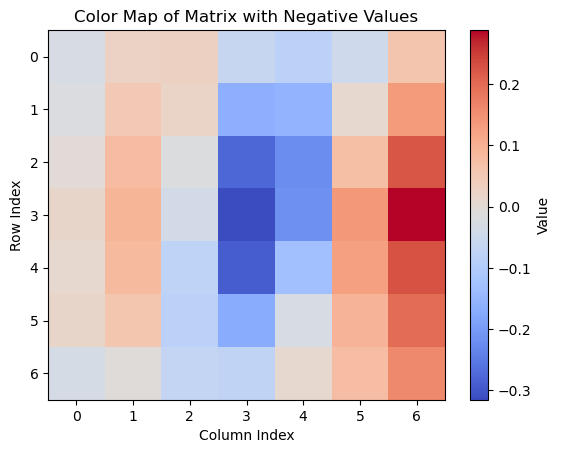

tensor([[-0.0113,  0.0676,  0.0408, -0.0619, -0.1003, -0.0414,  0.0765],
        [ 0.0170,  0.0988,  0.0142, -0.2183, -0.2234,  0.0038,  0.1541],
        [ 0.0342,  0.1185, -0.0455, -0.3604, -0.3051,  0.0763,  0.2761],
        [ 0.0452,  0.1231, -0.0855, -0.4086, -0.2708,  0.1902,  0.3752],
        [ 0.0271,  0.0931, -0.1336, -0.3753, -0.1612,  0.1851,  0.3085],
        [ 0.0190,  0.0540, -0.1333, -0.2093, -0.0359,  0.1309,  0.2538],
        [-0.0383, -0.0151, -0.1016, -0.0884, -0.0028,  0.0763,  0.1731]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


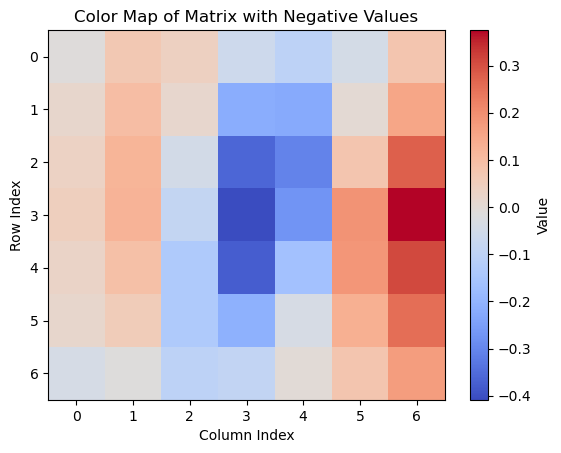

tensor([[-0.0300,  0.0084,  0.0267,  0.0061, -0.0404, -0.0434, -0.0141],
        [-0.0053,  0.0424,  0.0426, -0.0499, -0.0848, -0.0044,  0.0224],
        [-0.0045,  0.0526,  0.0110, -0.1293, -0.1445,  0.0151,  0.0693],
        [ 0.0120,  0.0728,  0.0170, -0.1383, -0.1219,  0.0841,  0.1318],
        [ 0.0056,  0.0645, -0.0174, -0.1352, -0.0589,  0.0727,  0.0870],
        [ 0.0178,  0.0395, -0.0313, -0.0446,  0.0101,  0.0347,  0.0698],
        [-0.0100, -0.0112, -0.0350,  0.0061,  0.0078,  0.0054,  0.0327]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


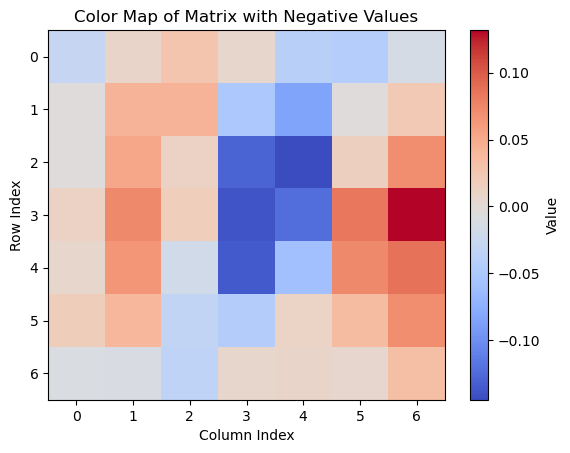

tensor([[ 0.0518, -0.0085, -0.0429, -0.0676, -0.0778, -0.0168,  0.0151],
        [ 0.0084, -0.0078, -0.0347, -0.0648, -0.0574, -0.0245, -0.0209],
        [ 0.0259,  0.0479,  0.0539,  0.0272,  0.0222,  0.0219,  0.0151],
        [ 0.0141,  0.0546,  0.0703,  0.0467,  0.0540,  0.0590,  0.0436],
        [-0.0028,  0.0318,  0.0639,  0.0700,  0.0655,  0.0834,  0.0795],
        [-0.0536, -0.0279,  0.0148,  0.0354,  0.0528,  0.0520,  0.0240],
        [-0.0602, -0.0478, -0.0461, -0.0339, -0.0262, -0.0137, -0.0216]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


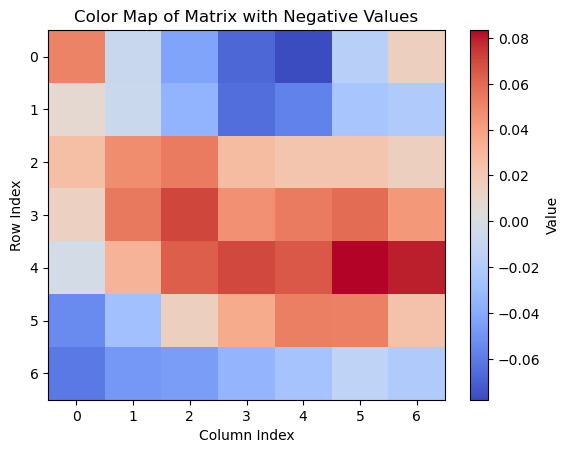

tensor([[ 0.0430,  0.0051, -0.0432, -0.0740, -0.0855, -0.0320, -0.0048],
        [ 0.0361,  0.0321, -0.0073, -0.0397, -0.0336, -0.0107, -0.0082],
        [ 0.0584,  0.0904,  0.0867,  0.0580,  0.0371,  0.0260,  0.0199],
        [ 0.0499,  0.0909,  0.0900,  0.0651,  0.0582,  0.0552,  0.0412],
        [ 0.0285,  0.0667,  0.0846,  0.0835,  0.0684,  0.0761,  0.0808],
        [-0.0067,  0.0312,  0.0643,  0.0724,  0.0878,  0.0780,  0.0552],
        [-0.0157,  0.0135,  0.0161,  0.0183,  0.0213,  0.0215,  0.0091]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


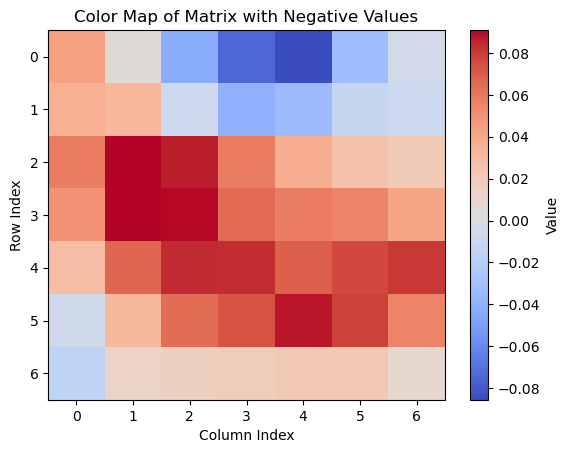

tensor([[ 0.0223, -0.0123, -0.0523, -0.0804, -0.0879, -0.0383, -0.0077],
        [ 0.0170,  0.0026, -0.0309, -0.0542, -0.0440, -0.0203, -0.0118],
        [ 0.0367,  0.0494,  0.0356,  0.0206,  0.0040, -0.0022,  0.0022],
        [ 0.0073,  0.0316,  0.0215,  0.0019,  0.0032, -0.0029, -0.0003],
        [-0.0119,  0.0075,  0.0145,  0.0175,  0.0081,  0.0203,  0.0399],
        [-0.0257, -0.0065,  0.0144,  0.0243,  0.0421,  0.0372,  0.0305],
        [-0.0018,  0.0112, -0.0002,  0.0004, -0.0017, -0.0017,  0.0031]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


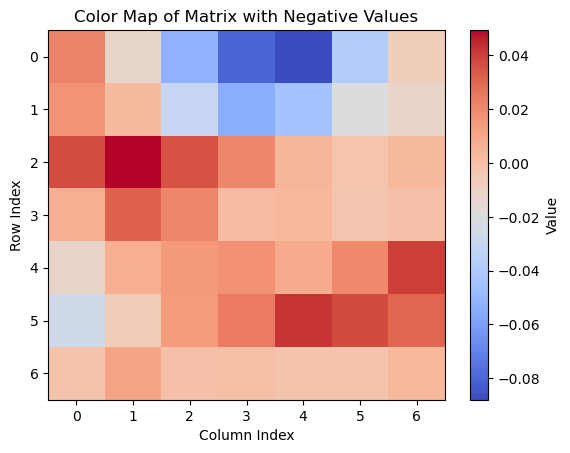

tensor([[ 0.0199,  0.1195,  0.0239, -0.0898, -0.1217, -0.0224,  0.0338],
        [ 0.0941,  0.1452,  0.0541, -0.0766, -0.1250, -0.0497,  0.0104],
        [ 0.0789,  0.1636,  0.0578, -0.1053, -0.1354, -0.0442,  0.0096],
        [ 0.0541,  0.1685,  0.0481, -0.1009, -0.1348, -0.0522,  0.0115],
        [ 0.0353,  0.1366,  0.0314, -0.0735, -0.1088, -0.0342,  0.0123],
        [-0.0016,  0.1120,  0.0087, -0.0790, -0.0840,  0.0118,  0.0148],
        [-0.0183,  0.0963,  0.0111, -0.0827, -0.0973,  0.0147, -0.0294]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


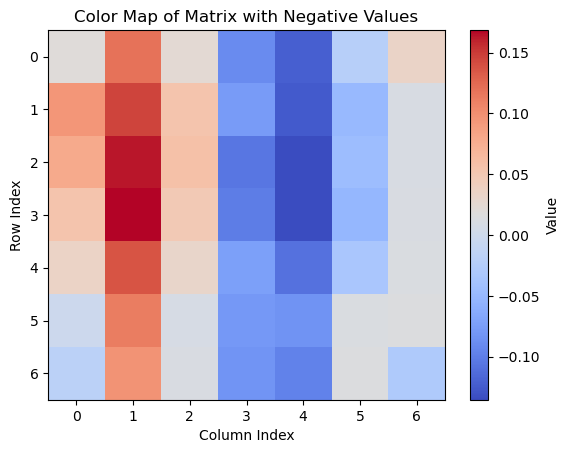

tensor([[ 0.0864,  0.1387,  0.0213, -0.1294, -0.1864, -0.0447,  0.0585],
        [ 0.1616,  0.1770,  0.0517, -0.1446, -0.2460, -0.1204,  0.0020],
        [ 0.1398,  0.1974,  0.0595, -0.1788, -0.2633, -0.1295, -0.0136],
        [ 0.1117,  0.1958,  0.0438, -0.1727, -0.2573, -0.1265, -0.0031],
        [ 0.0959,  0.1672,  0.0326, -0.1343, -0.2248, -0.0989,  0.0053],
        [ 0.0476,  0.1165, -0.0014, -0.1344, -0.1741, -0.0319,  0.0199],
        [ 0.0267,  0.0949, -0.0051, -0.1227, -0.1634, -0.0185, -0.0150]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


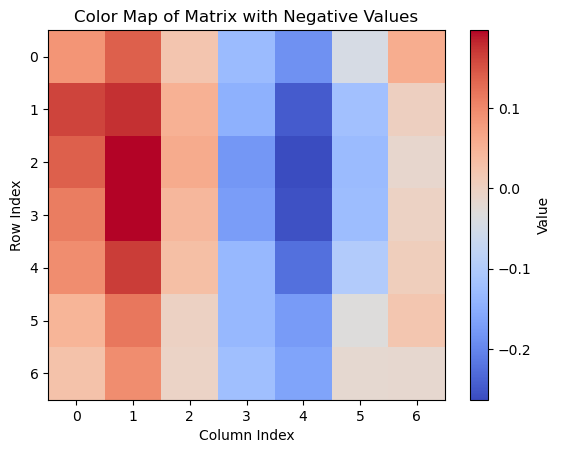

tensor([[ 0.0098,  0.0518, -0.0122, -0.0782, -0.0955,  0.0111,  0.0885],
        [ 0.0729,  0.0757,  0.0102, -0.0852, -0.1289, -0.0410,  0.0316],
        [ 0.0486,  0.0798,  0.0112, -0.1148, -0.1347, -0.0346,  0.0249],
        [ 0.0433,  0.0969,  0.0136, -0.0922, -0.1214, -0.0343,  0.0366],
        [ 0.0489,  0.0821,  0.0047, -0.0704, -0.1043, -0.0164,  0.0530],
        [ 0.0246,  0.0616, -0.0142, -0.0743, -0.0825,  0.0268,  0.0518],
        [ 0.0214,  0.0580, -0.0033, -0.0570, -0.0723,  0.0380,  0.0107]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


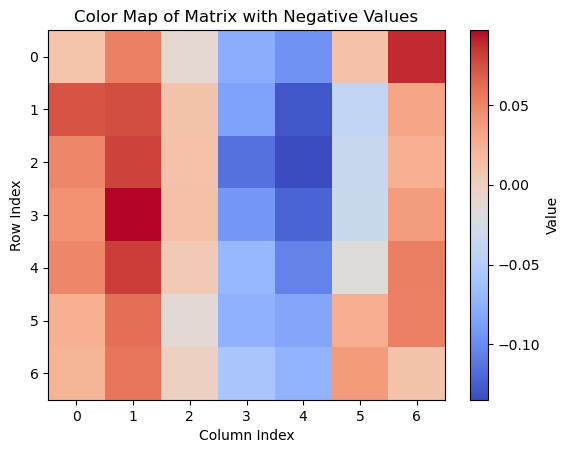

tensor([[ 0.2309,  0.1747,  0.0225, -0.1144, -0.1038, -0.0235, -0.0303],
        [ 0.1683,  0.0039, -0.2233, -0.3447, -0.1995, -0.0267,  0.0127],
        [ 0.0241, -0.2034, -0.4129, -0.4431, -0.1598,  0.1431,  0.1236],
        [-0.1209, -0.3484, -0.4665, -0.3025,  0.2061,  0.4213,  0.2145],
        [-0.1092, -0.2226, -0.1832,  0.2359,  0.6304,  0.4993,  0.1050],
        [-0.0369, -0.0467,  0.1166,  0.4386,  0.5106,  0.1673, -0.2401],
        [-0.0390,  0.0066,  0.1418,  0.2499,  0.1420, -0.2112, -0.4257]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


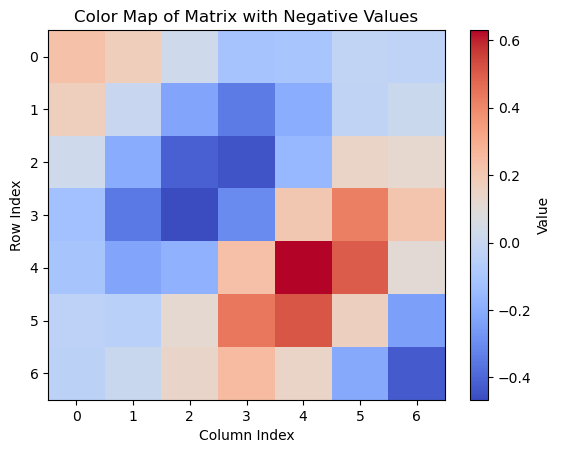

tensor([[-0.0376,  0.0190,  0.0419,  0.0521,  0.0153,  0.0193,  0.0001],
        [ 0.0113,  0.0683,  0.0686,  0.0682,  0.0280,  0.0076, -0.0055],
        [ 0.0347,  0.0624,  0.0667,  0.0670, -0.0087, -0.0168, -0.0645],
        [ 0.0310,  0.0639,  0.0407, -0.0384, -0.0598, -0.0738, -0.1044],
        [ 0.0157,  0.0414, -0.0202, -0.0427, -0.0674, -0.0823, -0.0470],
        [ 0.0261,  0.0018, -0.0467, -0.0791, -0.0973, -0.0385, -0.0046],
        [ 0.0011, -0.0249, -0.0744, -0.0911, -0.0386,  0.0150,  0.0525]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


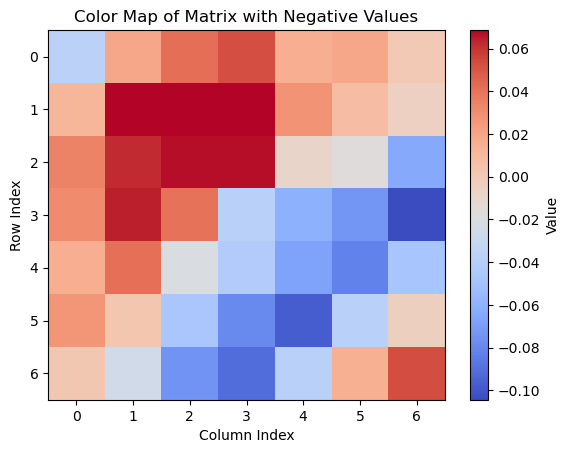

tensor([[-0.2137, -0.1815, -0.0740,  0.0712,  0.0391,  0.0051,  0.0147],
        [-0.1777, -0.0699,  0.1096,  0.2613,  0.1617,  0.0168, -0.0019],
        [-0.0588,  0.1152,  0.3481,  0.4350,  0.1346, -0.0682, -0.0757],
        [ 0.0740,  0.2767,  0.4300,  0.2718, -0.1715, -0.3274, -0.1611],
        [ 0.0568,  0.2030,  0.1428, -0.1637, -0.5295, -0.4161, -0.0468],
        [ 0.0208,  0.0584, -0.0599, -0.3457, -0.4486, -0.1075,  0.2163],
        [ 0.0213,  0.0050, -0.0896, -0.1911, -0.0820,  0.1915,  0.3425]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


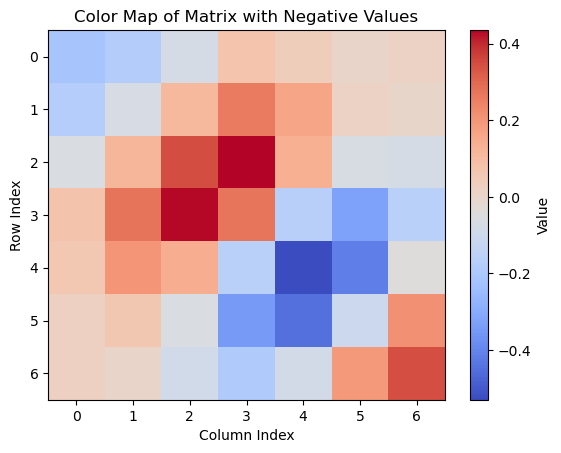

tensor([[-6.9834e-03, -4.6716e-02, -1.0447e-01,  1.5481e-02,  8.1273e-02,
          2.9046e-02, -2.0328e-02],
        [ 2.5384e-02,  1.0771e-01,  3.2111e-01,  1.8281e-01, -1.5183e-01,
         -1.0917e-01, -1.5715e-02],
        [-3.9043e-03, -3.7919e-02, -4.4663e-01, -5.4934e-01,  1.8085e-03,
          1.8308e-01,  5.6796e-02],
        [-4.1792e-02, -1.3257e-01,  1.8466e-01,  7.2214e-01,  3.2849e-01,
         -1.0687e-01, -6.2617e-02],
        [ 3.3958e-02,  1.8486e-01,  1.6169e-01, -4.0403e-01, -5.0699e-01,
         -1.5011e-02,  4.7829e-02],
        [-1.5420e-02, -1.0204e-01, -2.7988e-01, -1.4386e-02,  3.1522e-01,
          3.9394e-02, -6.4822e-02],
        [ 4.3699e-05,  2.8838e-02,  1.2959e-01,  9.6904e-02, -7.5571e-02,
         -3.2915e-02,  3.9771e-02]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


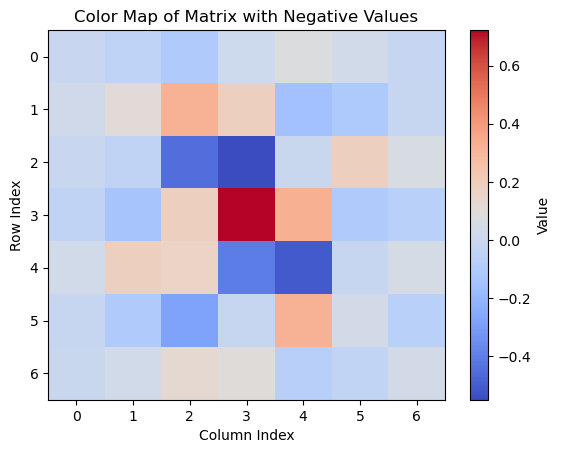

tensor([[ 0.0078, -0.0163, -0.0695,  0.0322,  0.1017,  0.0339,  0.0017],
        [ 0.0044,  0.0762,  0.2716,  0.0735, -0.2581, -0.1676, -0.0182],
        [-0.0374, -0.1205, -0.5681, -0.6042,  0.0775,  0.2634,  0.0941],
        [-0.0354, -0.0830,  0.3808,  1.0045,  0.5107, -0.0873, -0.0914],
        [ 0.0861,  0.2788,  0.2149, -0.5141, -0.6814, -0.1060,  0.0156],
        [-0.0170, -0.1551, -0.3957, -0.1133,  0.3073,  0.0610, -0.0589],
        [-0.0229,  0.0107,  0.1400,  0.1364, -0.0439, -0.0058,  0.0663]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


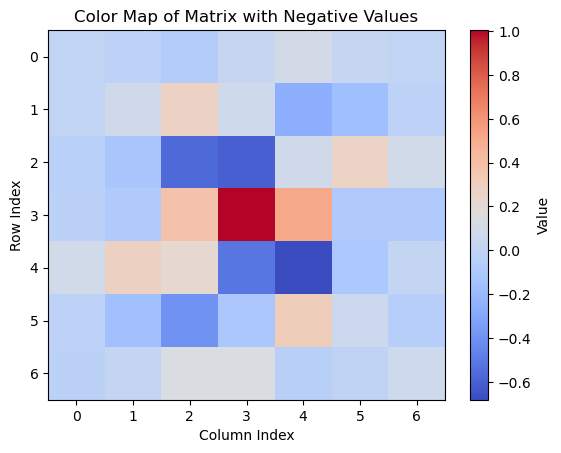

tensor([[ 2.7688e-02,  2.1401e-03, -9.3070e-02, -3.6589e-02,  6.8908e-02,
          2.5857e-02, -9.2816e-03],
        [-3.2446e-02,  1.1218e-02,  2.1307e-01,  1.3503e-01, -1.3143e-01,
         -1.1713e-01, -2.5055e-02],
        [-1.1812e-02, -1.1498e-03, -3.1946e-01, -4.2918e-01,  6.9285e-03,
          1.3160e-01,  5.8084e-02],
        [-4.9757e-04, -8.8960e-02,  1.6211e-01,  5.7835e-01,  2.7464e-01,
         -8.0264e-02, -8.7595e-03],
        [ 4.4513e-02,  1.4200e-01,  1.2452e-01, -3.4751e-01, -3.6946e-01,
          4.4790e-02,  4.1872e-02],
        [ 1.0785e-02, -7.6171e-02, -1.9230e-01,  8.5492e-02,  3.2041e-01,
          1.6237e-02, -6.7787e-02],
        [-9.4325e-03, -4.1275e-03,  7.8185e-02,  1.6039e-02, -1.4026e-01,
         -5.4915e-02,  4.3020e-02]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


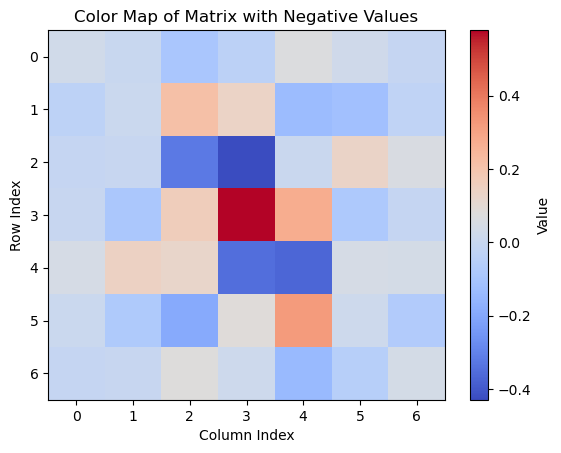

tensor([[-0.0135, -0.0367, -0.0375,  0.0179,  0.0203,  0.0344,  0.0307],
        [-0.0186, -0.0026, -0.0097,  0.0276,  0.0117,  0.0082, -0.0074],
        [-0.0440,  0.0454,  0.0367,  0.0379,  0.0067, -0.0198, -0.0666],
        [-0.0531,  0.1102,  0.1229,  0.0925, -0.0266, -0.0955, -0.1363],
        [-0.0288,  0.1560,  0.1769,  0.1033, -0.0591, -0.1323, -0.1684],
        [-0.0012,  0.1243,  0.1304,  0.0778, -0.0517, -0.1175, -0.1664],
        [-0.0019,  0.0791,  0.0871,  0.0571, -0.0482, -0.0989, -0.1293]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


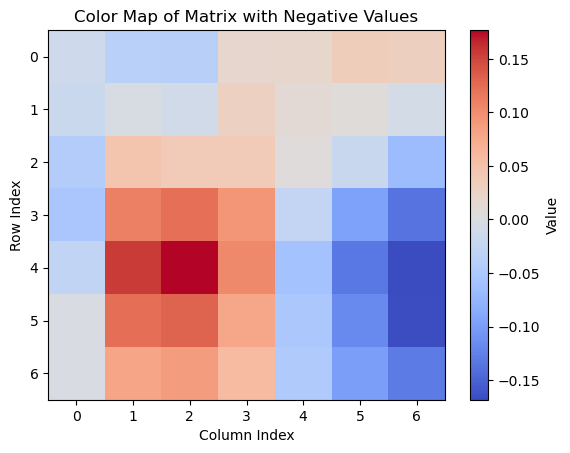

tensor([[-0.0147, -0.0008, -0.0094,  0.0273,  0.0091,  0.0262,  0.0273],
        [ 0.0084,  0.0720,  0.0481,  0.0452, -0.0157, -0.0300, -0.0538],
        [ 0.0082,  0.1569,  0.1239,  0.0655, -0.0286, -0.0860, -0.1471],
        [ 0.0142,  0.2457,  0.2357,  0.1376, -0.0634, -0.1887, -0.2439],
        [ 0.0420,  0.3005,  0.2986,  0.1592, -0.0862, -0.2316, -0.2858],
        [ 0.0590,  0.2519,  0.2366,  0.1321, -0.0746, -0.2044, -0.2700],
        [ 0.0505,  0.1923,  0.1845,  0.1058, -0.0720, -0.1719, -0.2114]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


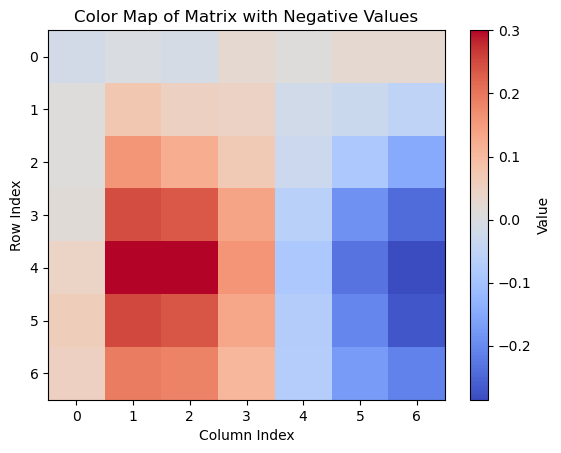

tensor([[-0.0127, -0.0024, -0.0206,  0.0029, -0.0016,  0.0225,  0.0203],
        [ 0.0127,  0.0654,  0.0329,  0.0168, -0.0291, -0.0301, -0.0448],
        [-0.0028,  0.1278,  0.0895,  0.0187, -0.0514, -0.0913, -0.1357],
        [-0.0080,  0.2103,  0.2028,  0.0899, -0.0773, -0.1715, -0.2104],
        [ 0.0125,  0.2578,  0.2577,  0.1120, -0.0985, -0.2105, -0.2516],
        [ 0.0267,  0.2049,  0.1884,  0.0754, -0.0983, -0.1960, -0.2433],
        [ 0.0366,  0.1554,  0.1334,  0.0432, -0.0940, -0.1580, -0.1771]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


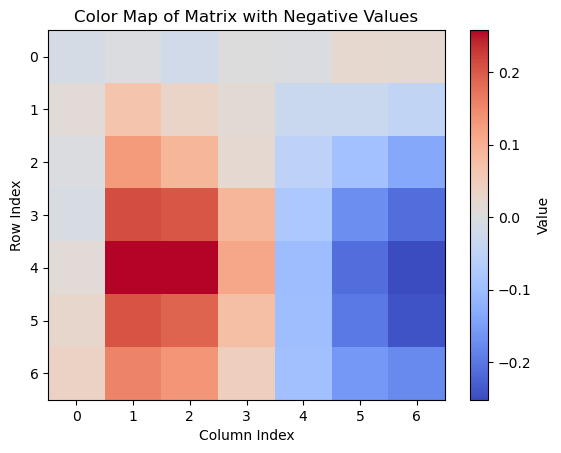

tensor([[-0.0227, -0.1222, -0.1164, -0.1182, -0.1267, -0.1371, -0.1132],
        [-0.1100, -0.1886, -0.1869, -0.1772, -0.1743, -0.1622, -0.1551],
        [-0.0522, -0.1013, -0.0963, -0.1124, -0.1055, -0.0814, -0.0673],
        [-0.0248, -0.0337,  0.0010, -0.0148, -0.0233, -0.0009,  0.0175],
        [ 0.0328,  0.0789,  0.1291,  0.1412,  0.1233,  0.1246,  0.1138],
        [ 0.0313,  0.1158,  0.1528,  0.1626,  0.1626,  0.1436,  0.0850],
        [ 0.0572,  0.1682,  0.1993,  0.2038,  0.2109,  0.1629,  0.0712]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


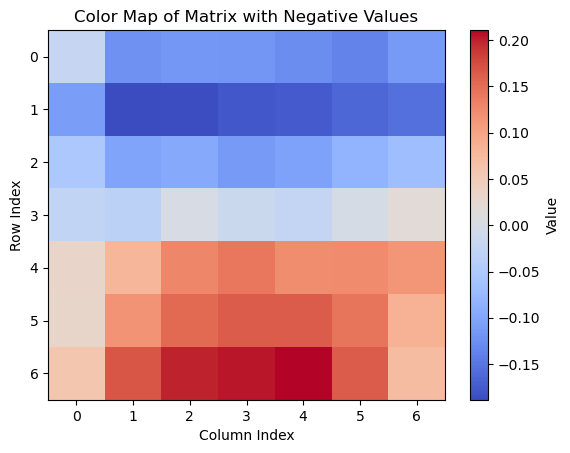

tensor([[-0.0605, -0.1666, -0.1736, -0.1713, -0.1803, -0.1850, -0.1448],
        [-0.1653, -0.2548, -0.2711, -0.2573, -0.2498, -0.2324, -0.2065],
        [-0.0947, -0.1530, -0.1598, -0.1668, -0.1588, -0.1318, -0.1023],
        [-0.0397, -0.0481, -0.0109, -0.0142, -0.0208, -0.0112,  0.0147],
        [ 0.0404,  0.0999,  0.1579,  0.1827,  0.1704,  0.1516,  0.1356],
        [ 0.0541,  0.1586,  0.2055,  0.2251,  0.2255,  0.1907,  0.1296],
        [ 0.0772,  0.2056,  0.2532,  0.2724,  0.2763,  0.2134,  0.1192]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


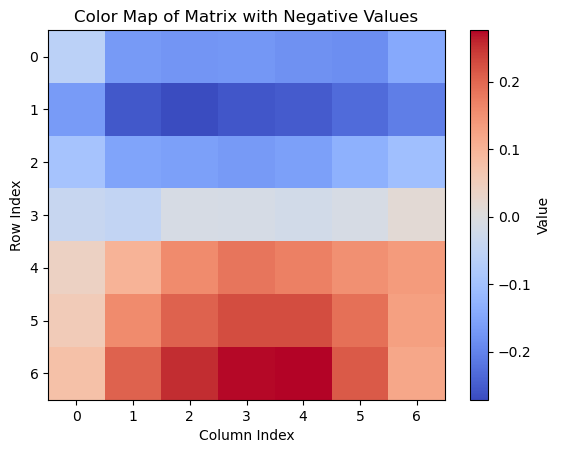

tensor([[ 0.0096, -0.0925, -0.0944, -0.0868, -0.0957, -0.1171, -0.0891],
        [-0.0787, -0.1566, -0.1686, -0.1475, -0.1484, -0.1517, -0.1421],
        [-0.0233, -0.0830, -0.0927, -0.0913, -0.0867, -0.0828, -0.0593],
        [-0.0087, -0.0312, -0.0074, -0.0032, -0.0127, -0.0145,  0.0166],
        [ 0.0390,  0.0717,  0.1072,  0.1291,  0.1206,  0.1020,  0.0974],
        [ 0.0254,  0.0994,  0.1247,  0.1425,  0.1490,  0.1135,  0.0701],
        [ 0.0365,  0.1264,  0.1517,  0.1700,  0.1841,  0.1304,  0.0596]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


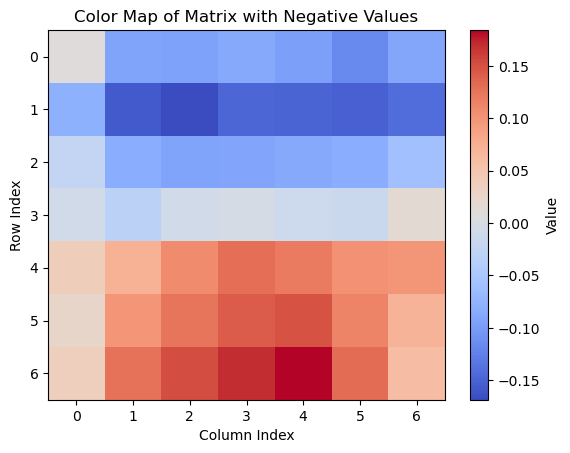

tensor([[ 0.0644,  0.0075,  0.0027,  0.0233, -0.0215, -0.0276, -0.0396],
        [ 0.0761,  0.0159, -0.0208,  0.0156,  0.0099, -0.0120, -0.0410],
        [ 0.0094, -0.0558, -0.0983, -0.0661, -0.0289, -0.0718, -0.1031],
        [-0.0375, -0.1302, -0.1977, -0.2025, -0.1926, -0.1914, -0.1650],
        [-0.0585, -0.1460, -0.1811, -0.2028, -0.2464, -0.2102, -0.1592],
        [-0.0114, -0.0732, -0.1205, -0.1483, -0.1845, -0.1468, -0.0972],
        [ 0.0191, -0.0157, -0.0496, -0.0671, -0.1094, -0.0982, -0.0643]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


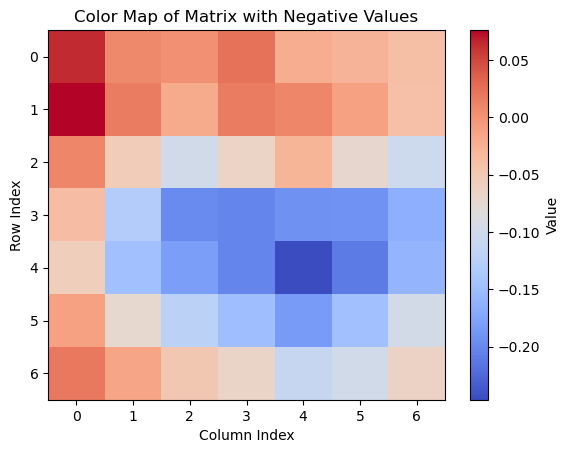

tensor([[ 0.0004, -0.0004,  0.0104,  0.0519,  0.0287,  0.0250,  0.0135],
        [ 0.0600,  0.0795,  0.0751,  0.1451,  0.1603,  0.1212,  0.0824],
        [ 0.0241,  0.0691,  0.0724,  0.1472,  0.2028,  0.1235,  0.0575],
        [ 0.0562,  0.0891,  0.0703,  0.1074,  0.1234,  0.0935,  0.0754],
        [ 0.0307,  0.0588,  0.0729,  0.0892,  0.0557,  0.0635,  0.0661],
        [ 0.0224,  0.0632,  0.0578,  0.0666,  0.0396,  0.0527,  0.0629],
        [ 0.0184,  0.0660,  0.0663,  0.0873,  0.0523,  0.0411,  0.0549]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


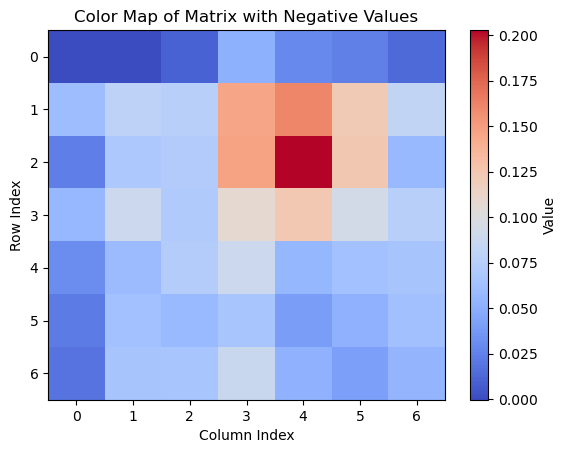

tensor([[-0.0703, -0.0752, -0.0852, -0.0595, -0.0871, -0.0487, -0.0306],
        [-0.0357, -0.0273, -0.0602, -0.0223, -0.0278, -0.0142,  0.0093],
        [-0.0654, -0.0201, -0.0432,  0.0018,  0.0284, -0.0102, -0.0120],
        [-0.0014,  0.0530,  0.0343,  0.0692,  0.0701,  0.0624,  0.0629],
        [-0.0009,  0.0575,  0.0795,  0.1158,  0.0776,  0.0942,  0.0811],
        [-0.0150,  0.0463,  0.0464,  0.0830,  0.0695,  0.0878,  0.0853],
        [-0.0409,  0.0072, -0.0008,  0.0485,  0.0419,  0.0514,  0.0636]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


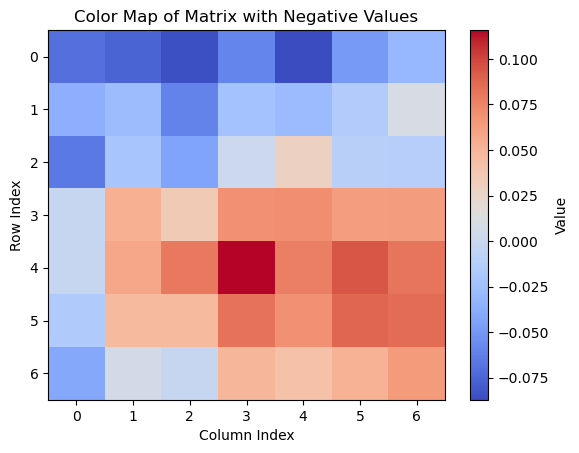

tensor([[-0.0316,  0.0023, -0.0230, -0.0258, -0.0497, -0.1236, -0.0681],
        [-0.0094,  0.0783,  0.0617,  0.0866,  0.0596, -0.0598, -0.0121],
        [-0.0277,  0.0994,  0.1773,  0.2572,  0.2108,  0.0123,  0.0084],
        [-0.0425,  0.1406,  0.3069,  0.4809,  0.4681,  0.1635,  0.0712],
        [-0.0294,  0.1361,  0.3196,  0.5222,  0.4906,  0.1602,  0.0659],
        [-0.0702,  0.0715,  0.1818,  0.2855,  0.2073, -0.0315, -0.0785],
        [-0.0411,  0.0845,  0.1031,  0.1238,  0.0470, -0.1210, -0.1268]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


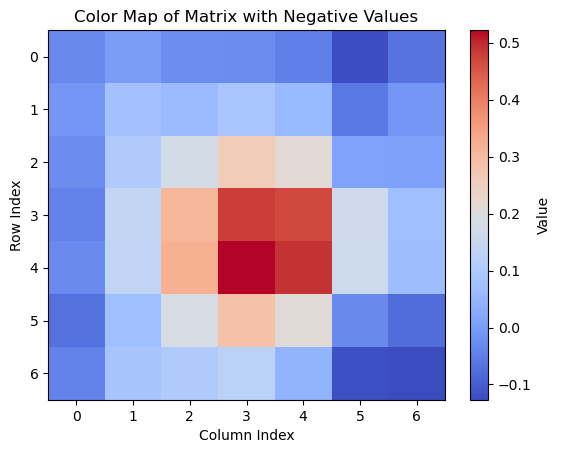

tensor([[ 0.0728,  0.0038,  0.0153,  0.0316,  0.0364,  0.0725,  0.0892],
        [ 0.0216, -0.0585, -0.0763, -0.0921, -0.0698,  0.0060,  0.0103],
        [ 0.0281, -0.0773, -0.1135, -0.1993, -0.1960, -0.0510, -0.0116],
        [ 0.0209, -0.1146, -0.2402, -0.3714, -0.3341, -0.1445, -0.0500],
        [ 0.0281, -0.1291, -0.2689, -0.3742, -0.3598, -0.1651, -0.0479],
        [ 0.0578, -0.0762, -0.1547, -0.2145, -0.2077, -0.0358,  0.0282],
        [ 0.0431, -0.0399, -0.0652, -0.0951, -0.0774,  0.0566,  0.0822]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


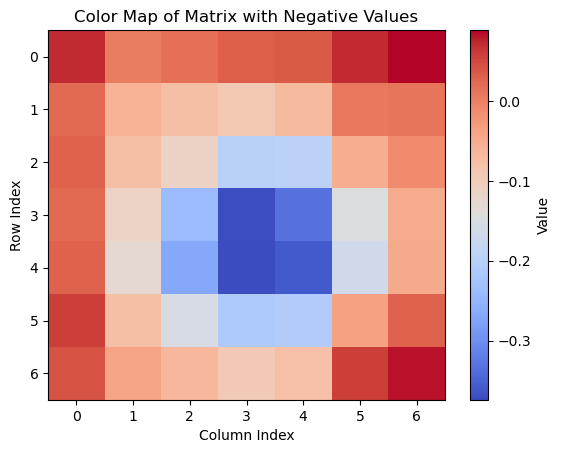

tensor([[-0.0273, -0.0188,  0.0261,  0.0160,  0.0148,  0.0341, -0.0098],
        [-0.0214, -0.0476, -0.0228, -0.0072,  0.0150,  0.0512, -0.0180],
        [-0.0028, -0.0321, -0.0108, -0.0279, -0.0277,  0.0534, -0.0133],
        [ 0.0260, -0.0102, -0.0490, -0.1243, -0.1129, -0.0046, -0.0283],
        [ 0.0217, -0.0154, -0.0663, -0.1311, -0.1270, -0.0209, -0.0232],
        [ 0.0235, -0.0157, -0.0348, -0.0350, -0.0198,  0.0792,  0.0470],
        [-0.0149, -0.0400, -0.0407, -0.0240,  0.0039,  0.0971,  0.0557]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


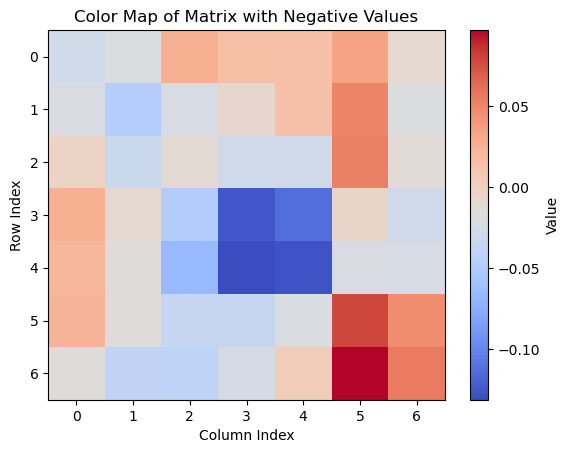

tensor([[ 0.0244,  0.0154,  0.0979,  0.0377, -0.0368,  0.0107,  0.0613],
        [ 0.0067, -0.0084, -0.0260, -0.2468, -0.3254, -0.0531,  0.0455],
        [ 0.0088,  0.0115,  0.0262, -0.0696, -0.0556,  0.0632,  0.0557],
        [-0.0178,  0.0004,  0.0400,  0.0567,  0.0829,  0.0307,  0.0130],
        [-0.0266, -0.0130,  0.0139,  0.0225,  0.0305, -0.0061,  0.0041],
        [-0.0198, -0.0106, -0.0082, -0.0179,  0.0034, -0.0155, -0.0361],
        [-0.0104, -0.0091, -0.0166, -0.0055,  0.0111,  0.0012, -0.0057]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


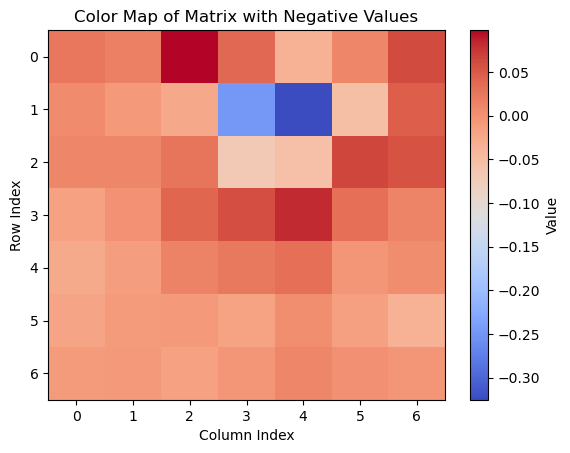

tensor([[ 0.0136,  0.0099,  0.0640, -0.0406, -0.1250, -0.0523,  0.0383],
        [-0.0060, -0.0340, -0.0901, -0.3666, -0.4576, -0.1341,  0.0174],
        [ 0.0157,  0.0029, -0.0111, -0.1548, -0.1426,  0.0294,  0.0517],
        [ 0.0191,  0.0289,  0.0513,  0.0451,  0.0854,  0.0525,  0.0356],
        [ 0.0197,  0.0297,  0.0485,  0.0420,  0.0517,  0.0282,  0.0418],
        [ 0.0188,  0.0240,  0.0213, -0.0046,  0.0148,  0.0067,  0.0023],
        [ 0.0332,  0.0275,  0.0142,  0.0148,  0.0405,  0.0311,  0.0402]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


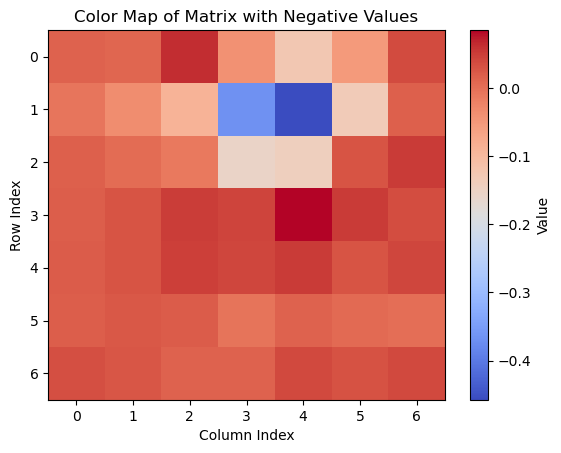

tensor([[-0.0135,  0.0035,  0.1128,  0.1276,  0.0747,  0.0412,  0.0062],
        [-0.0089, -0.0078,  0.0113, -0.1262, -0.1994, -0.0148,  0.0063],
        [-0.0066, -0.0217,  0.0035, -0.0557, -0.0451,  0.0465,  0.0154],
        [-0.0153, -0.0316, -0.0081,  0.0082,  0.0412,  0.0122, -0.0059],
        [-0.0266, -0.0319, -0.0163, -0.0320, -0.0184, -0.0121,  0.0071],
        [-0.0092, -0.0169, -0.0062, -0.0279, -0.0142, -0.0146, -0.0193],
        [ 0.0180, -0.0056, -0.0023,  0.0024,  0.0157,  0.0085,  0.0180]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


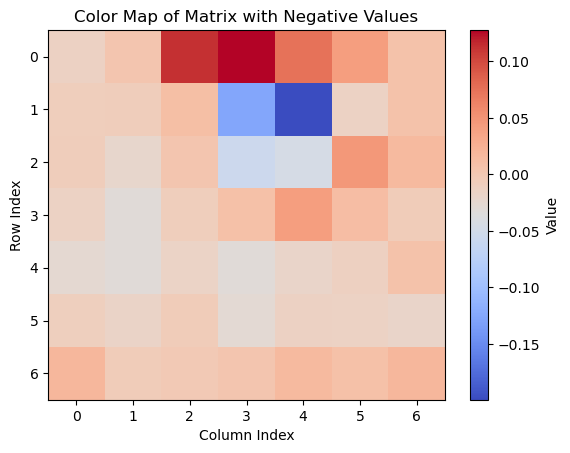

tensor([[ 0.0174,  0.0021, -0.0055, -0.0007, -0.0029,  0.0104,  0.0262],
        [-0.0698, -0.1518, -0.1846, -0.1128, -0.0327, -0.0081,  0.0036],
        [ 0.0706,  0.1187,  0.0801,  0.0578,  0.0362, -0.0092,  0.0184],
        [ 0.1869,  0.3494,  0.4592,  0.3296,  0.1442,  0.0486,  0.0075],
        [-0.0996, -0.1490, -0.1642, -0.0806, -0.0512, -0.0192, -0.0190],
        [-0.1507, -0.2850, -0.3634, -0.2595, -0.1253, -0.0428, -0.0124],
        [ 0.0685,  0.1474,  0.1486,  0.0920,  0.0396,  0.0162, -0.0152]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


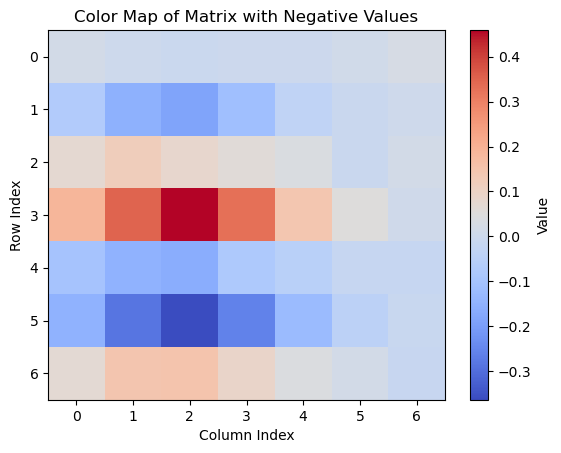

tensor([[-0.0156, -0.0514, -0.0603, -0.0448, -0.0341, -0.0053,  0.0193],
        [-0.0412, -0.1532, -0.2001, -0.1350, -0.0522, -0.0153,  0.0182],
        [ 0.1607,  0.2429,  0.2027,  0.1424,  0.0756,  0.0091,  0.0453],
        [ 0.2543,  0.4935,  0.6523,  0.4956,  0.2374,  0.1026,  0.0350],
        [-0.1646, -0.2189, -0.1978, -0.0989, -0.0582, -0.0074, -0.0077],
        [-0.2543, -0.4370, -0.5323, -0.4019, -0.2221, -0.0894, -0.0350],
        [ 0.0533,  0.1296,  0.1233,  0.0672,  0.0103, -0.0045, -0.0355]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


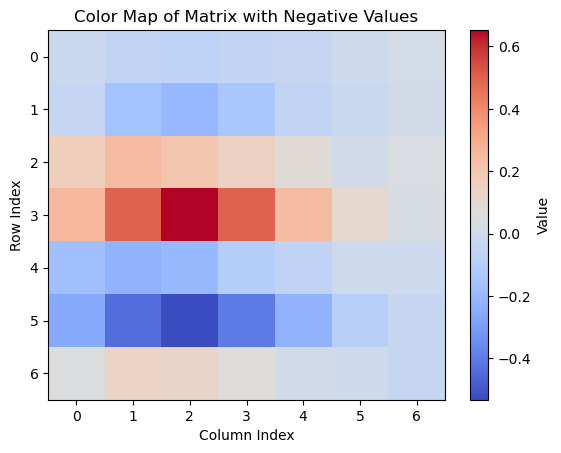

tensor([[-0.0054,  0.0029,  0.0075,  0.0011, -0.0206, -0.0076, -0.0168],
        [-0.0247, -0.1004, -0.1195, -0.0697, -0.0253, -0.0045,  0.0067],
        [ 0.0415,  0.0461,  0.0003, -0.0124, -0.0043, -0.0135,  0.0258],
        [ 0.0837,  0.1942,  0.2763,  0.1839,  0.0634,  0.0278,  0.0004],
        [-0.0580, -0.0834, -0.0943, -0.0332, -0.0182,  0.0125,  0.0082],
        [-0.0812, -0.1498, -0.2261, -0.1481, -0.0632, -0.0121,  0.0037],
        [ 0.0694,  0.1327,  0.1268,  0.0908,  0.0470,  0.0254, -0.0183]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


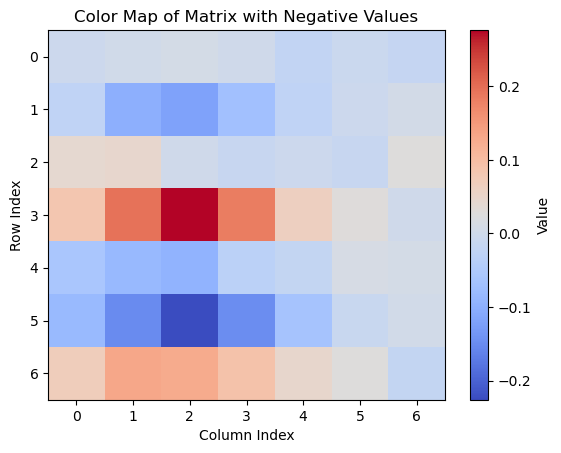

tensor([[-0.0949, -0.1225, -0.1549, -0.1806, -0.1797, -0.1037, -0.0844],
        [-0.0685, -0.1389, -0.1948, -0.2537, -0.2808, -0.1850, -0.1435],
        [ 0.0329, -0.0539, -0.1767, -0.2332, -0.2477, -0.1959, -0.1397],
        [ 0.0999,  0.0984,  0.0174, -0.0545, -0.1199, -0.1214, -0.1185],
        [ 0.1133,  0.2010,  0.1972,  0.1923,  0.1338,  0.0780,  0.0320],
        [ 0.0481,  0.1879,  0.2446,  0.2799,  0.2323,  0.1571,  0.0816],
        [ 0.0607,  0.1561,  0.2290,  0.3183,  0.3069,  0.2272,  0.1818]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


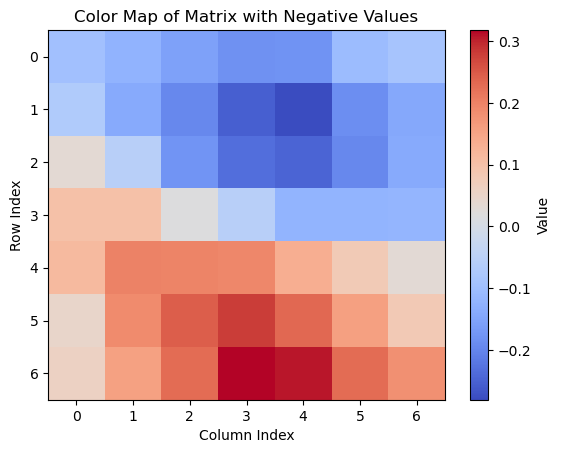

tensor([[ 0.0478,  0.0616,  0.0711,  0.0450,  0.0406,  0.0598,  0.0639],
        [ 0.0439,  0.0582,  0.0829,  0.0482,  0.0165,  0.0583,  0.0795],
        [ 0.0221,  0.0209, -0.0134, -0.0325, -0.0232,  0.0022,  0.0408],
        [ 0.0198,  0.0524,  0.0412,  0.0094, -0.0002,  0.0157,  0.0341],
        [-0.0584, -0.0050,  0.0084,  0.0101,  0.0020,  0.0059,  0.0157],
        [-0.1022, -0.0424, -0.0062, -0.0117, -0.0415, -0.0509, -0.0443],
        [-0.0869, -0.0772, -0.0355, -0.0172, -0.0337, -0.0637, -0.0487]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


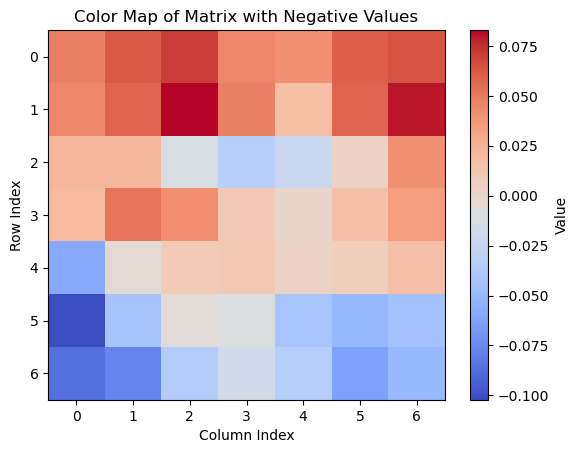

tensor([[ 0.0566,  0.0960,  0.1190,  0.1045,  0.0957,  0.0822,  0.0497],
        [ 0.0403,  0.0870,  0.1679,  0.1761,  0.1502,  0.1418,  0.1207],
        [-0.0308,  0.0069,  0.0429,  0.0809,  0.1112,  0.0978,  0.1000],
        [-0.0280, -0.0044,  0.0319,  0.0551,  0.0916,  0.1122,  0.1219],
        [-0.1076, -0.1148, -0.1135, -0.0983, -0.0668, -0.0260,  0.0175],
        [-0.0762, -0.1068, -0.1191, -0.1503, -0.1509, -0.1132, -0.0635],
        [-0.0513, -0.1125, -0.1174, -0.1420, -0.1540, -0.1512, -0.1107]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


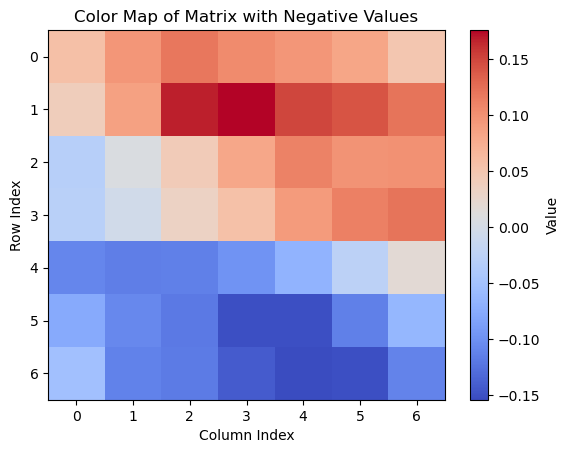

tensor([[ 0.1025,  0.0889,  0.0797,  0.0275, -0.0141,  0.0169,  0.0344],
        [ 0.0688,  0.0596,  0.0161, -0.0457, -0.0778, -0.0369, -0.0109],
        [ 0.0251, -0.0015, -0.0361, -0.0925, -0.1265, -0.0873, -0.0317],
        [ 0.0055, -0.0377, -0.1039, -0.1495, -0.1613, -0.1141, -0.0414],
        [-0.0150, -0.0625, -0.1011, -0.0915, -0.0838, -0.0853, -0.0442],
        [ 0.0013, -0.0405, -0.0894, -0.0878, -0.0770, -0.0729, -0.0221],
        [ 0.0375,  0.0227, -0.0222, -0.0876, -0.1134, -0.0699,  0.0006]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


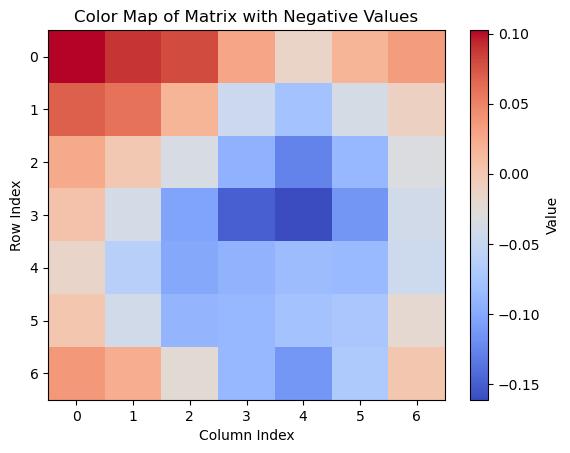

tensor([[-0.0109, -0.0027,  0.0046, -0.0098, -0.0196,  0.0037,  0.0033],
        [-0.0047,  0.0154, -0.0033, -0.0192, -0.0197,  0.0022, -0.0006],
        [-0.0252, -0.0145, -0.0156, -0.0254, -0.0494, -0.0353, -0.0235],
        [-0.0146, -0.0114, -0.0381, -0.0351, -0.0522, -0.0551, -0.0426],
        [-0.0143, -0.0166, -0.0066,  0.0615,  0.0606, -0.0129, -0.0447],
        [-0.0192, -0.0268, -0.0354,  0.0249,  0.0327, -0.0208, -0.0377],
        [-0.0009,  0.0038, -0.0138, -0.0316, -0.0518, -0.0378, -0.0142]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


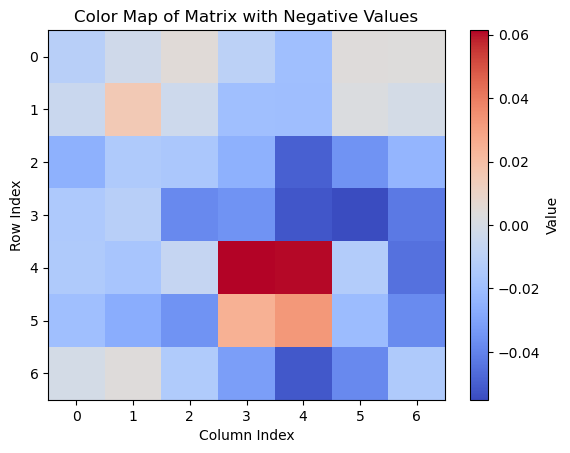

tensor([[-0.0940, -0.0732, -0.0530, -0.0214, -0.0042,  0.0171, -0.0080],
        [-0.0530, -0.0047,  0.0064,  0.0587,  0.0815,  0.0858,  0.0468],
        [-0.0376,  0.0086,  0.0490,  0.1239,  0.1233,  0.0981,  0.0500],
        [ 0.0024,  0.0585,  0.0823,  0.1699,  0.1752,  0.1268,  0.0707],
        [ 0.0198,  0.0722,  0.1181,  0.2586,  0.2773,  0.1626,  0.0636],
        [ 0.0133,  0.0370,  0.0423,  0.1608,  0.2007,  0.1204,  0.0432],
        [-0.0084,  0.0210,  0.0267,  0.0663,  0.0715,  0.0601,  0.0408]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


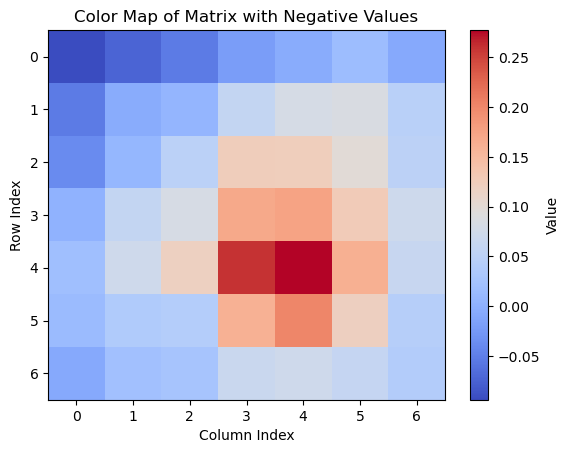

tensor([[ 0.0880,  0.0554,  0.0482,  0.0137,  0.0096,  0.0574,  0.0965],
        [ 0.0942,  0.0541,  0.0019, -0.0469, -0.0411,  0.0087,  0.0406],
        [ 0.0759,  0.0295, -0.0448, -0.0847, -0.0883, -0.0392,  0.0205],
        [ 0.0239, -0.0672, -0.1520, -0.2038, -0.2259, -0.1506, -0.0970],
        [ 0.0094, -0.0794, -0.1354, -0.2154, -0.2188, -0.1434, -0.0958],
        [ 0.0165, -0.0770, -0.1425, -0.1729, -0.1372, -0.0939, -0.0623],
        [ 0.0529, -0.0156, -0.0887, -0.1174, -0.0772, -0.0287, -0.0301]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


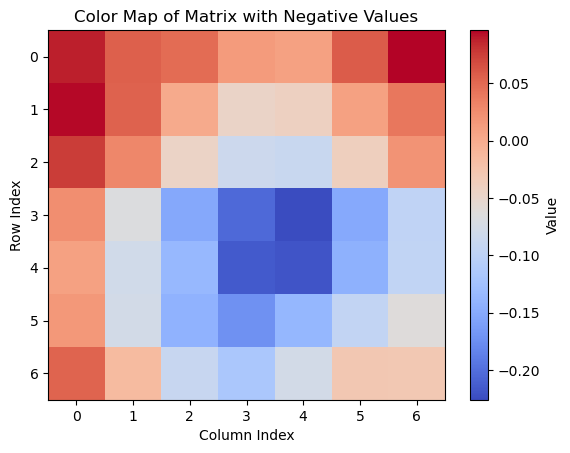

tensor([[-0.1377, -0.1121, -0.0984, -0.0536, -0.0551, -0.1045, -0.1076],
        [-0.1036, -0.0780, -0.0673,  0.0022,  0.0231, -0.0394, -0.0548],
        [-0.1102, -0.0387,  0.0104,  0.1217,  0.1542,  0.0780,  0.0396],
        [-0.0250,  0.0731,  0.1705,  0.3435,  0.3573,  0.2670,  0.1491],
        [ 0.0201,  0.1476,  0.2889,  0.4347,  0.4569,  0.3418,  0.2005],
        [-0.0334,  0.0909,  0.2093,  0.3492,  0.3913,  0.2646,  0.1467],
        [-0.0673,  0.0533,  0.1146,  0.2281,  0.2624,  0.1602,  0.0696]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


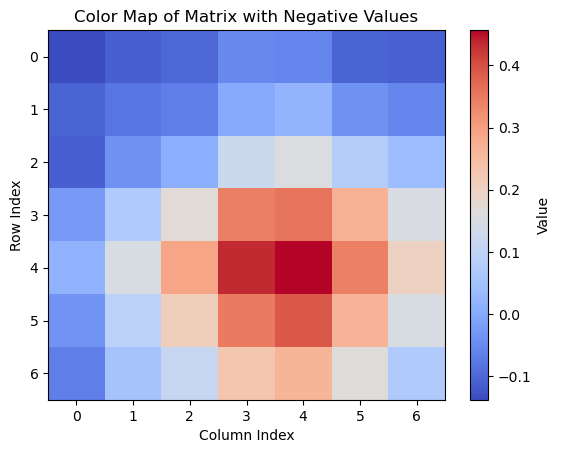

tensor([[ 0.0556,  0.0618,  0.0678,  0.0400,  0.0401,  0.0459,  0.0573],
        [ 0.0591,  0.0671,  0.0743,  0.0470,  0.0367,  0.0261,  0.0344],
        [ 0.0186,  0.0529,  0.0513,  0.0027, -0.0291, -0.0293,  0.0048],
        [ 0.0011,  0.0009, -0.0313, -0.1239, -0.1812, -0.1110, -0.0332],
        [ 0.0046, -0.0130, -0.0661, -0.2463, -0.3009, -0.1951, -0.0617],
        [ 0.0023, -0.0271, -0.1172, -0.2792, -0.3015, -0.2165, -0.0718],
        [ 0.0613,  0.0591, -0.0232, -0.1375, -0.1518, -0.1002, -0.0076]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


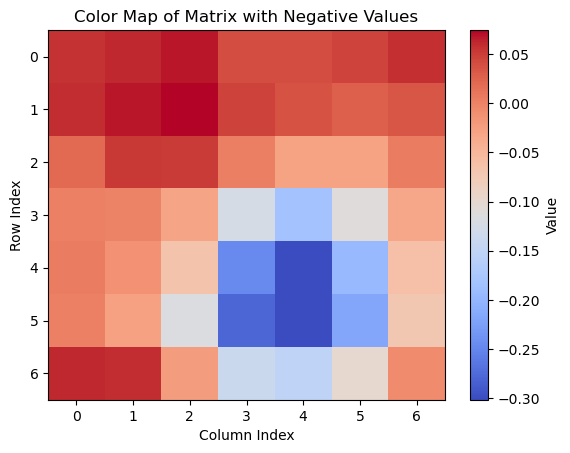

tensor([[-0.0340, -0.0251, -0.0255,  0.0054,  0.0105, -0.0004, -0.0300],
        [-0.0466, -0.0147, -0.0093,  0.0137,  0.0136,  0.0206, -0.0086],
        [-0.0464, -0.0261, -0.0084,  0.0311,  0.0166,  0.0176,  0.0027],
        [ 0.0054,  0.0228,  0.0311,  0.0757,  0.0780,  0.0680,  0.0560],
        [-0.0049,  0.0215,  0.0397,  0.1252,  0.1813,  0.1505,  0.0752],
        [-0.0025,  0.0359,  0.0701,  0.1476,  0.2227,  0.1956,  0.1038],
        [-0.0242,  0.0044,  0.0269,  0.0832,  0.1113,  0.1254,  0.0570]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


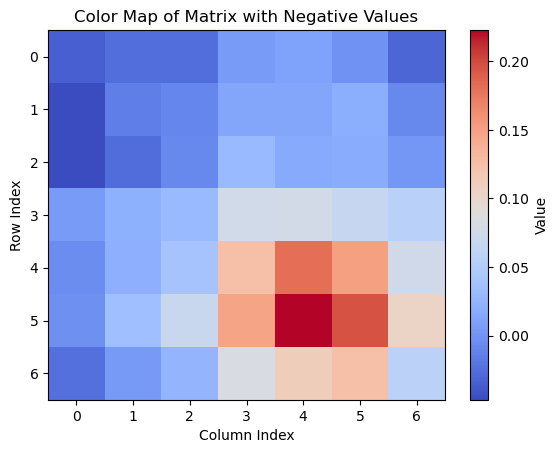

tensor([[ 2.6596e-02,  1.5267e-02, -1.0052e-02,  8.1780e-05,  6.4754e-03,
          8.3071e-03, -1.9958e-02],
        [ 8.1813e-03,  1.4773e-02, -4.1304e-03, -1.0360e-02, -2.3615e-02,
         -3.6712e-03, -8.8021e-03],
        [-1.3464e-02, -1.3957e-02, -2.0853e-02, -1.4788e-02, -4.8393e-02,
         -4.5643e-02, -3.0797e-02],
        [-1.4160e-02, -3.4654e-02, -4.8710e-02,  4.3517e-03,  2.0223e-02,
         -1.3393e-02, -4.1692e-02],
        [-3.4782e-02, -5.6457e-02, -4.0992e-02,  1.0541e-01,  2.0826e-01,
          1.3162e-01, -1.8591e-02],
        [-3.4194e-02, -4.9856e-02, -2.2475e-02,  1.0956e-01,  2.3495e-01,
          1.6560e-01, -7.1351e-03],
        [-5.1194e-02, -7.0069e-02, -8.0640e-02, -3.5906e-02,  4.4461e-03,
          1.8027e-03, -8.4319e-02]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


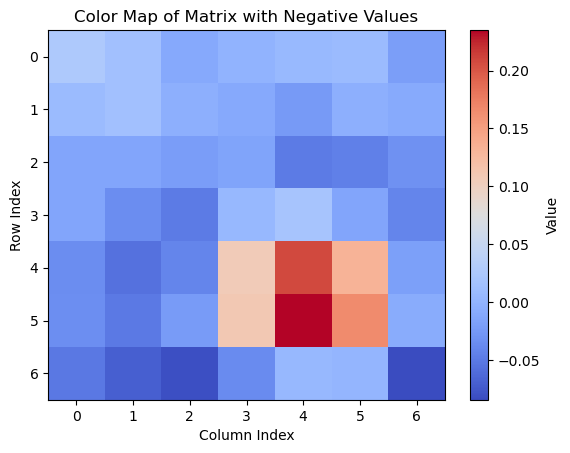

tensor([[ 0.0271,  0.0223, -0.0013, -0.0158, -0.0079,  0.0083,  0.0015],
        [ 0.0241,  0.0404,  0.0260,  0.0039, -0.0091,  0.0178,  0.0301],
        [ 0.0257,  0.0306,  0.0187, -0.0053, -0.0384, -0.0198,  0.0194],
        [ 0.0268,  0.0099, -0.0311, -0.0562, -0.0616, -0.0712, -0.0483],
        [ 0.0301,  0.0037, -0.0451, -0.0167,  0.0515, -0.0075, -0.0865],
        [ 0.0510,  0.0281, -0.0223, -0.0202,  0.0581,  0.0100, -0.0775],
        [ 0.0560,  0.0343, -0.0302, -0.0921, -0.0974, -0.0760, -0.0943]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


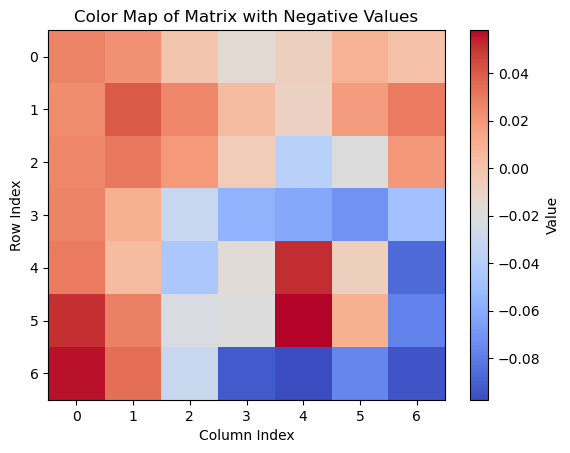

tensor([[-0.0472, -0.0569, -0.0189,  0.0179,  0.0144, -0.0066, -0.0347],
        [-0.0485, -0.0274,  0.0342,  0.0544,  0.0624,  0.0458,  0.0173],
        [-0.0413, -0.0102,  0.0366,  0.0638,  0.0853,  0.0717,  0.0292],
        [-0.0436, -0.0090,  0.0359,  0.0812,  0.0955,  0.0617,  0.0297],
        [-0.0360, -0.0174,  0.0428,  0.0888,  0.1179,  0.0680,  0.0396],
        [-0.0419, -0.0262,  0.0177,  0.0528,  0.0861,  0.0538,  0.0267],
        [-0.0444, -0.0316,  0.0002,  0.0274,  0.0335,  0.0117,  0.0018]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


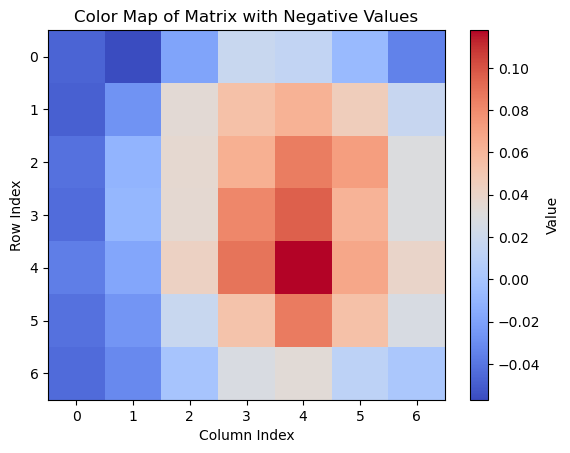

tensor([[ 0.0263,  0.0307,  0.0434,  0.0148,  0.0162,  0.0636,  0.0889],
        [-0.0031,  0.0255,  0.0326, -0.0595, -0.0541,  0.0340,  0.0894],
        [ 0.0182,  0.0473,  0.0091, -0.1170, -0.1147, -0.0104,  0.0599],
        [ 0.0098,  0.0281, -0.0115, -0.1190, -0.1284, -0.0572,  0.0215],
        [ 0.0085,  0.0019, -0.0156, -0.1031, -0.0972, -0.0562,  0.0099],
        [ 0.0139,  0.0088, -0.0117, -0.0973, -0.0914, -0.0472,  0.0080],
        [ 0.0368,  0.0377,  0.0213, -0.0511, -0.0742, -0.0340,  0.0200]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


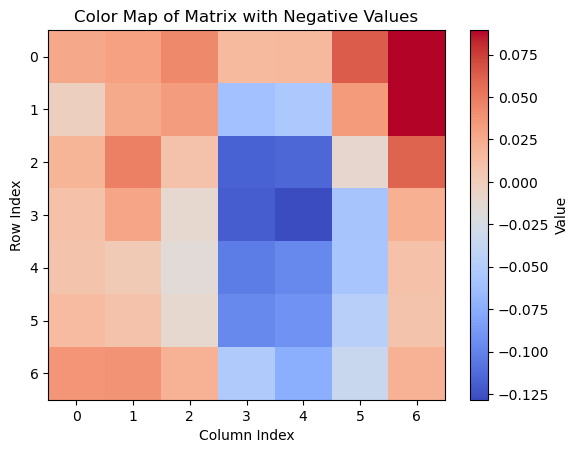

tensor([[ 0.0599,  0.0480,  0.0476, -0.0299, -0.0281,  0.0460,  0.0865],
        [ 0.0030,  0.0149,  0.0024, -0.1477, -0.1578, -0.0466,  0.0377],
        [ 0.0243,  0.0299, -0.0205, -0.2016, -0.2172, -0.0932,  0.0053],
        [ 0.0206,  0.0220, -0.0246, -0.1870, -0.2137, -0.1226, -0.0161],
        [ 0.0193,  0.0034, -0.0175, -0.1614, -0.1723, -0.1075, -0.0277],
        [ 0.0297,  0.0207,  0.0009, -0.1374, -0.1491, -0.0850, -0.0213],
        [ 0.0549,  0.0520,  0.0409, -0.0787, -0.1119, -0.0577,  0.0089]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


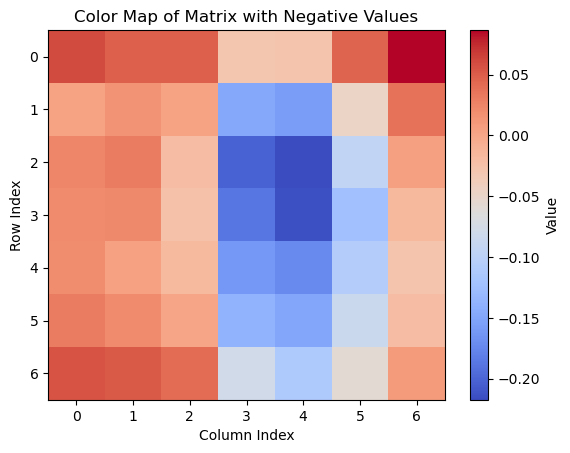

tensor([[-3.3804e-08, -3.4041e-08, -3.2982e-08, -2.5443e-08, -2.0378e-08,
         -1.3667e-08, -1.4558e-08],
        [-2.7557e-08, -2.7881e-08, -2.2728e-08, -1.8864e-08, -1.1536e-08,
         -1.8578e-09, -4.1946e-09],
        [-2.5840e-08, -2.7954e-08, -2.1996e-08, -1.8048e-08, -9.5993e-09,
          2.2143e-09, -8.8145e-10],
        [-2.9391e-08, -2.6037e-08, -2.9581e-08, -2.0340e-08, -1.3475e-08,
          1.4135e-09, -1.9207e-09],
        [-2.6455e-08, -3.2370e-08, -2.9183e-08, -2.4533e-08, -1.5198e-08,
         -3.7732e-09, -3.5940e-09],
        [-2.3799e-08, -2.9860e-08, -3.0324e-08, -2.3610e-08, -1.7873e-08,
         -8.7737e-09, -8.9529e-09],
        [-2.6037e-08, -2.4474e-08, -2.8424e-08, -2.5532e-08, -1.8263e-08,
         -1.0923e-08, -9.0988e-09]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


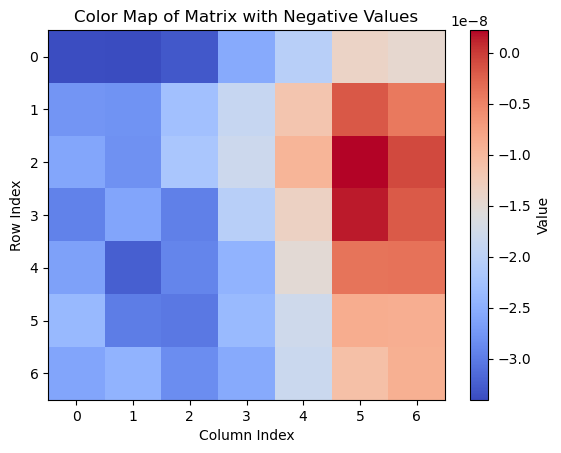

tensor([[-2.2667e-08, -1.8798e-08, -1.4158e-08, -6.9353e-09, -5.7495e-09,
         -1.4194e-09, -5.0461e-10],
        [-1.4225e-08, -8.4409e-09, -8.0713e-09,  1.8549e-09,  7.5964e-09,
          1.4951e-08,  1.1743e-08],
        [-1.1442e-08, -5.1233e-09, -4.6143e-09,  4.0804e-09,  1.1396e-08,
          1.6637e-08,  1.4042e-08],
        [-7.9640e-09, -8.5932e-09, -7.8027e-09, -1.4232e-09,  6.4525e-09,
          1.4439e-08,  1.5967e-08],
        [-1.4076e-08, -1.1144e-08, -1.1921e-08, -4.2455e-09,  2.7792e-09,
          1.4974e-08,  1.2069e-08],
        [-9.1119e-09, -1.0485e-08, -1.0059e-08, -6.6756e-09,  1.1456e-09,
          8.4283e-09,  9.1001e-09],
        [-6.8228e-09, -5.2617e-09, -8.4405e-09, -1.8075e-09,  4.2784e-10,
          5.7105e-09,  8.9100e-09]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


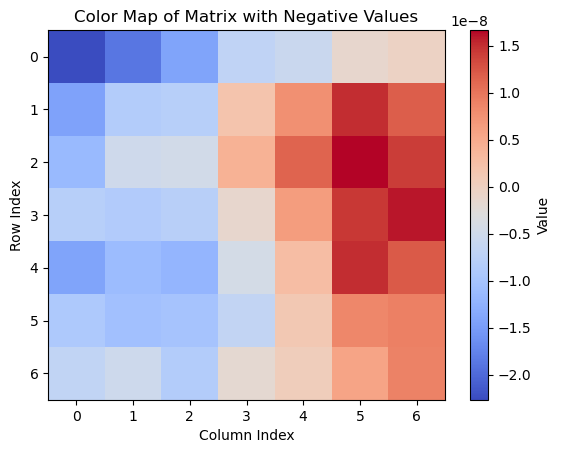

tensor([[-2.5010e-08, -1.7710e-08, -1.7096e-08, -9.7758e-09, -5.9127e-09,
          1.3997e-09, -4.4540e-09],
        [-1.3452e-08, -8.1171e-09, -8.1240e-09,  3.3527e-09,  4.1626e-09,
          7.4673e-09,  9.5903e-09],
        [-1.0095e-08, -7.6292e-09, -5.0362e-09,  2.5580e-09,  5.4912e-09,
          1.3635e-08,  1.0350e-08],
        [-1.0421e-08, -7.9029e-09, -1.0581e-08,  8.7192e-10,  3.0837e-09,
          1.2826e-08,  1.0993e-08],
        [-8.4738e-09, -8.9011e-09, -9.2477e-09, -2.0265e-09,  3.0468e-09,
          1.0806e-08,  1.0628e-08],
        [-7.3583e-09, -6.6474e-09, -6.7925e-09, -2.2959e-09,  8.9168e-10,
          8.8737e-09,  5.4139e-09],
        [-6.7137e-09, -5.8884e-09, -5.5110e-09, -1.1011e-09,  2.1564e-09,
          7.3136e-09,  5.3575e-09]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


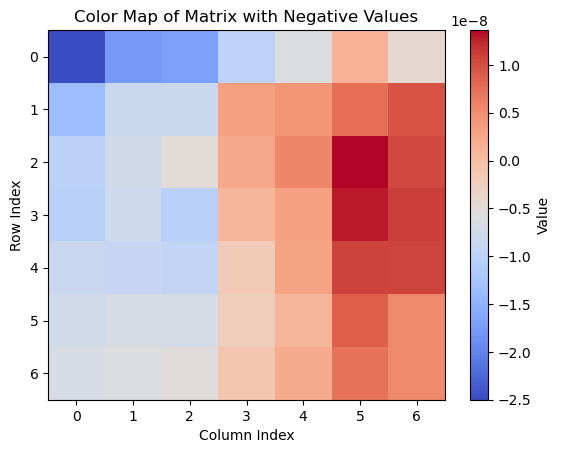

tensor([[ 0.0159,  0.0034,  0.0020, -0.0006,  0.0021, -0.0021,  0.0061],
        [ 0.0175,  0.0079, -0.0098, -0.0203, -0.0157,  0.0060,  0.0109],
        [ 0.0248,  0.0297,  0.0101,  0.0248,  0.0026,  0.0047,  0.0161],
        [ 0.0079,  0.0216,  0.0286,  0.0557,  0.0096, -0.0023,  0.0138],
        [ 0.0093,  0.0149,  0.0150,  0.0217, -0.0002,  0.0016,  0.0101],
        [ 0.0145,  0.0250,  0.0183,  0.0086,  0.0043,  0.0085,  0.0150],
        [ 0.0324,  0.0166,  0.0151,  0.0222,  0.0126,  0.0217,  0.0295]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


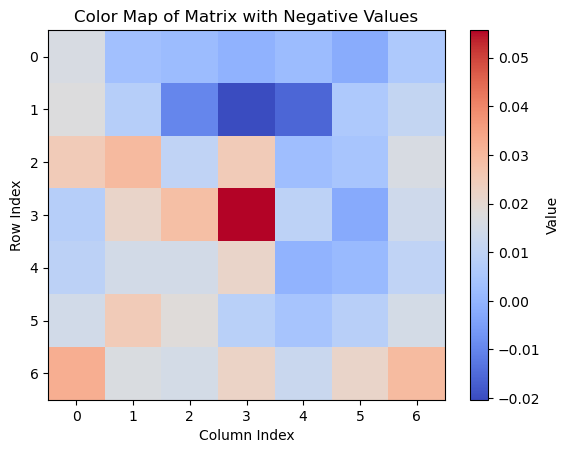

tensor([[ 0.0053, -0.0155,  0.0007,  0.0012, -0.0011,  0.0044,  0.0187],
        [-0.0184, -0.0329, -0.0280, -0.0344, -0.0402, -0.0169, -0.0061],
        [-0.0183, -0.0192, -0.0094,  0.0054, -0.0302, -0.0301, -0.0119],
        [-0.0354, -0.0301,  0.0054,  0.0358, -0.0280, -0.0430, -0.0156],
        [-0.0237, -0.0407, -0.0203, -0.0154, -0.0426, -0.0325, -0.0101],
        [-0.0161, -0.0371, -0.0261, -0.0368, -0.0425, -0.0210, -0.0010],
        [-0.0005, -0.0445, -0.0278, -0.0159, -0.0237, -0.0028,  0.0093]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


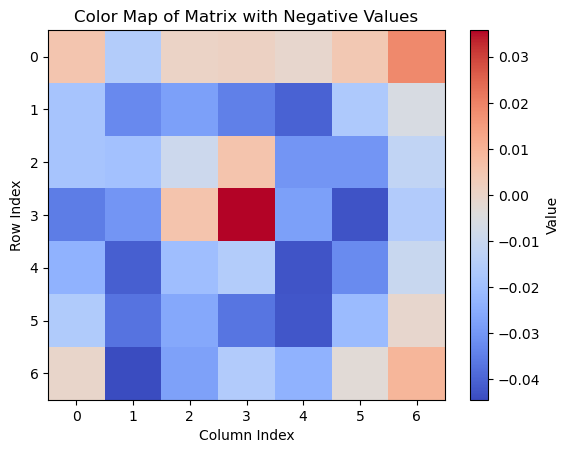

tensor([[-0.0267, -0.0244,  0.0086,  0.0231,  0.0095, -0.0039, -0.0086],
        [-0.0248, -0.0030,  0.0381,  0.0471,  0.0099, -0.0062, -0.0164],
        [-0.0134,  0.0399,  0.1172,  0.1651,  0.0677, -0.0055, -0.0223],
        [-0.0249,  0.0486,  0.1743,  0.2443,  0.1017, -0.0097, -0.0249],
        [-0.0005,  0.0333,  0.1089,  0.1546,  0.0656, -0.0068, -0.0157],
        [-0.0082,  0.0004,  0.0374,  0.0514,  0.0103, -0.0179, -0.0208],
        [ 0.0028, -0.0185,  0.0106,  0.0317,  0.0006, -0.0094, -0.0134]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


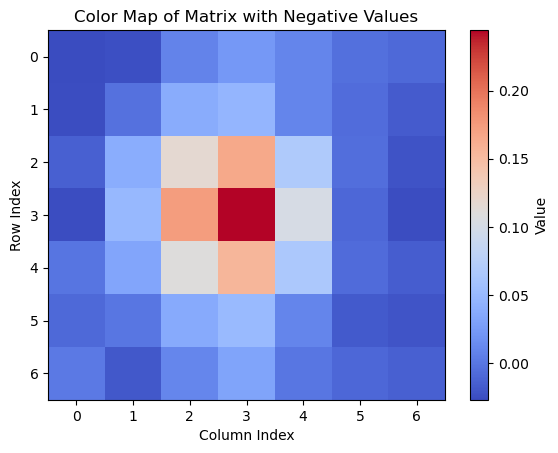

tensor([[ 2.2314e-09,  2.7489e-09,  1.7960e-09,  7.5360e-10,  2.2652e-09,
         -6.1001e-10, -2.2252e-11],
        [ 4.2700e-09,  4.3641e-09,  1.1546e-09,  1.9958e-09,  1.3896e-09,
          4.5471e-11, -1.4307e-09],
        [ 4.6231e-09,  6.2253e-09,  5.5692e-09,  4.4226e-09, -7.0225e-10,
          4.5178e-10, -3.0662e-09],
        [ 6.9783e-09,  6.9544e-09,  5.0731e-09, -8.3453e-10, -2.1730e-09,
         -3.9668e-09, -8.6810e-09],
        [ 4.5573e-09,  8.0192e-09,  4.9056e-09, -1.6996e-10, -1.9023e-09,
         -8.6839e-09, -7.5680e-09],
        [ 5.1674e-09,  6.4304e-09,  6.6439e-09,  1.6864e-09, -4.7941e-09,
         -4.1468e-09, -9.1121e-09],
        [ 4.9949e-09,  6.7423e-09,  4.5109e-09,  2.4185e-09, -5.2253e-09,
         -6.4253e-09, -7.1280e-09]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


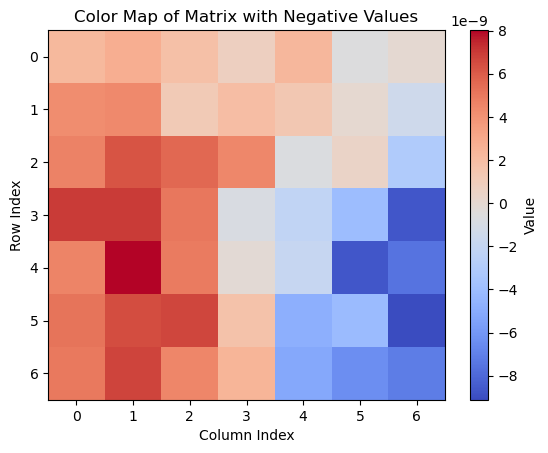

tensor([[-6.1826e-09, -5.4963e-09, -4.7149e-09, -5.2143e-09, -7.2782e-09,
         -5.7892e-09, -4.6549e-09],
        [-5.7638e-09, -2.7585e-09, -3.6000e-09, -7.3151e-09, -2.6069e-09,
         -4.3827e-09, -5.4191e-09],
        [-3.3163e-09, -4.1207e-09, -2.1758e-09, -3.0256e-09, -4.0418e-09,
         -3.1822e-09, -8.4564e-09],
        [-1.9885e-10, -2.6322e-09,  2.8836e-11, -3.8739e-09, -7.1031e-09,
         -7.6588e-09, -6.7344e-09],
        [-2.9321e-09, -2.2399e-09, -7.9885e-10, -4.8866e-09, -5.8133e-09,
         -7.7775e-09, -1.3835e-08],
        [-2.6370e-09, -2.3111e-10, -1.1949e-09, -2.0464e-09, -5.0651e-09,
         -8.0751e-09, -1.0195e-08],
        [-3.0965e-09, -1.8851e-09, -2.8776e-09, -4.5667e-09, -7.6108e-09,
         -7.9130e-09, -5.8120e-09]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


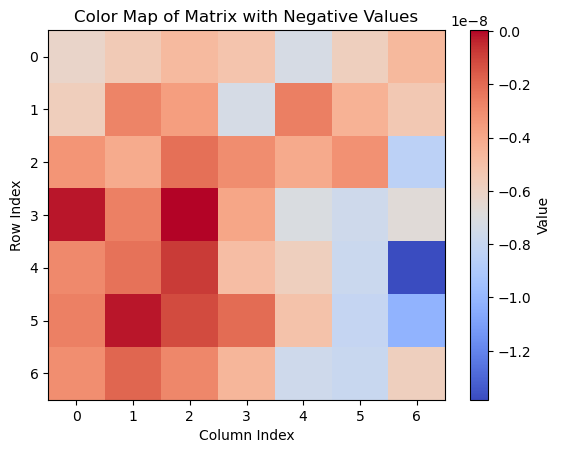

tensor([[-5.9511e-09, -2.6083e-09, -5.0673e-09, -4.3681e-09, -4.1182e-09,
         -1.1481e-09, -4.1470e-09],
        [-4.9247e-09, -3.6542e-09, -4.5346e-09, -2.0194e-09, -3.0880e-09,
          2.9781e-09, -3.6976e-09],
        [-3.8152e-09, -1.7514e-09, -1.4618e-09, -2.5132e-09,  9.4242e-10,
         -6.0514e-10, -3.4026e-09],
        [-5.0279e-09,  4.7646e-10, -2.2754e-09, -6.5366e-11, -4.5100e-09,
         -4.1910e-09, -2.2511e-09],
        [-4.6348e-09, -3.7652e-10,  3.8584e-10, -2.0119e-09, -2.7649e-09,
         -2.2660e-09, -5.4254e-09],
        [-3.5633e-10, -9.1801e-10,  1.5538e-09,  3.1171e-11, -2.3097e-09,
         -1.2275e-09, -5.2526e-09],
        [-1.6387e-09,  2.4799e-09,  1.8938e-09,  7.9892e-11,  9.6105e-10,
          2.2339e-09, -1.2629e-09]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


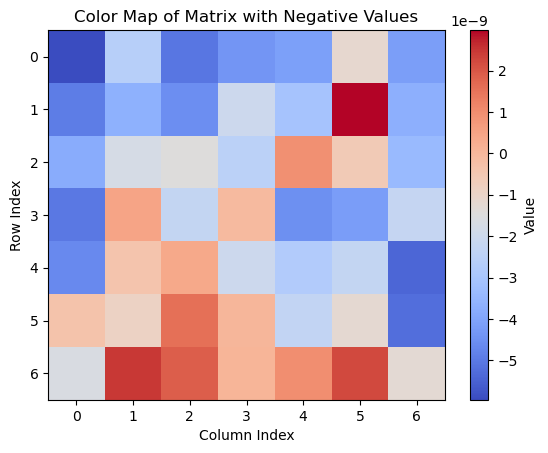

tensor([[-0.0307, -0.0244,  0.0457,  0.1106, -0.0277, -0.0366,  0.0235],
        [ 0.0237, -0.0312, -0.2147, -0.0906,  0.3329,  0.0882, -0.0455],
        [-0.0087,  0.1074,  0.1818, -0.3992, -0.5029,  0.1822,  0.1205],
        [ 0.0214, -0.1258,  0.0804,  0.6475, -0.0820, -0.3822, -0.0221],
        [ 0.0425,  0.1308, -0.3217, -0.2622,  0.4301,  0.0948, -0.0644],
        [-0.0454,  0.0302,  0.3023, -0.1166, -0.1964,  0.0129,  0.0328],
        [-0.0105, -0.0530, -0.0475,  0.1294,  0.0387,  0.0008, -0.0282]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


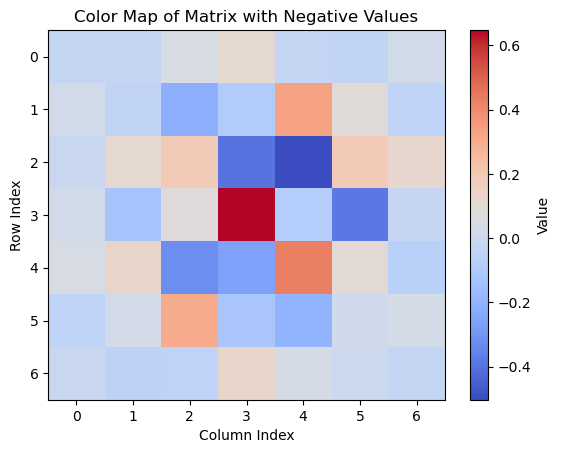

tensor([[ 0.0060, -0.0110,  0.0391,  0.0910, -0.0343, -0.0429,  0.0427],
        [ 0.0307, -0.0235, -0.2303, -0.1724,  0.2930,  0.0737, -0.0602],
        [ 0.0193,  0.2070,  0.3730, -0.3542, -0.6174,  0.0911,  0.0581],
        [-0.0733, -0.2124,  0.1860,  0.9829,  0.1194, -0.3881, -0.0630],
        [-0.0229,  0.0018, -0.5482, -0.3297,  0.6045,  0.2331,  0.0016],
        [-0.0103,  0.0275,  0.2314, -0.3145, -0.2971,  0.0328,  0.0932],
        [ 0.0447, -0.0188,  0.0132,  0.1242, -0.0123, -0.0403, -0.0221]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


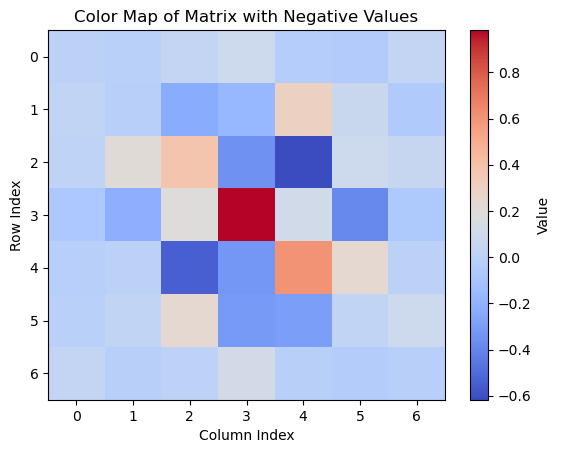

tensor([[-0.0201, -0.0268,  0.0163,  0.0434, -0.1115, -0.0493,  0.0629],
        [ 0.0326, -0.0130, -0.1525, -0.0634,  0.2543,  0.0023, -0.0963],
        [ 0.0066,  0.1162,  0.2365, -0.2601, -0.3714,  0.1436, -0.0026],
        [-0.0086, -0.1283,  0.0798,  0.6564,  0.0527, -0.2399, -0.0109],
        [-0.0214,  0.0638, -0.3472, -0.3031,  0.3824,  0.1219, -0.0216],
        [-0.0297, -0.0050,  0.2386, -0.1598, -0.2218,  0.0205,  0.0640],
        [ 0.0360, -0.0283, -0.0514,  0.0746, -0.0042, -0.0206, -0.0068]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


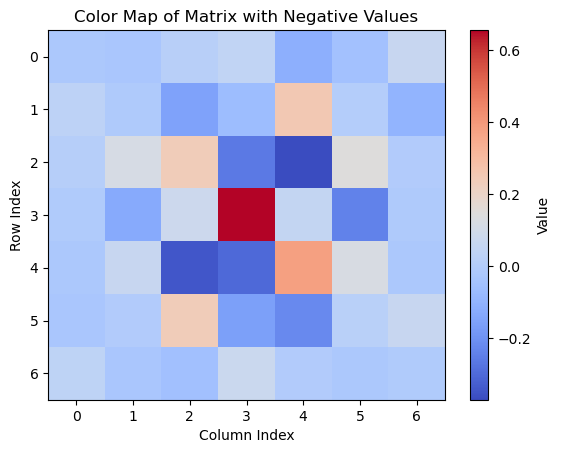

tensor([[-0.0168, -0.0837,  0.0077,  0.0408, -0.0057,  0.0139, -0.0274],
        [-0.0551,  0.0514, -0.0939,  0.1133,  0.1241, -0.0115, -0.0517],
        [ 0.0367, -0.1232,  0.2156,  0.4128, -0.2782, -0.0881,  0.0159],
        [-0.0116,  0.0625,  0.4901, -0.4918, -0.2508,  0.1430, -0.0343],
        [-0.0022,  0.2492, -0.2334, -0.3989,  0.3785, -0.1606,  0.0334],
        [ 0.0350,  0.0361, -0.2744,  0.1837, -0.0752, -0.1262,  0.1469],
        [-0.0081, -0.0632, -0.0312,  0.0216, -0.0137,  0.1531, -0.0066]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


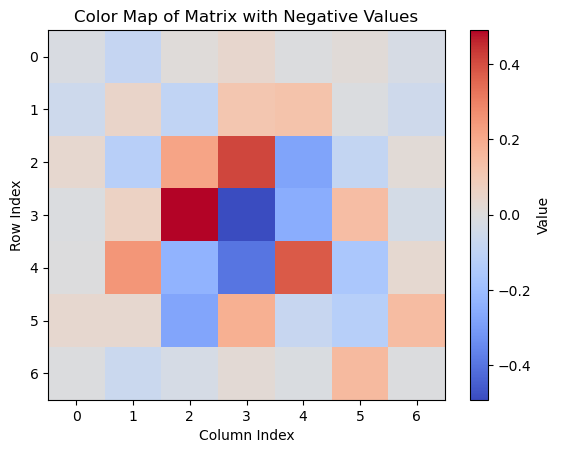

tensor([[ 0.0136, -0.0163,  0.0700, -0.0087, -0.0727,  0.0249,  0.0080],
        [-0.0140,  0.0575, -0.1583,  0.0281,  0.0959,  0.0044, -0.0369],
        [ 0.0918, -0.1709,  0.1483,  0.3214, -0.3138, -0.0036,  0.0431],
        [-0.0563, -0.0129,  0.4102, -0.6465, -0.1538,  0.3071, -0.0452],
        [-0.0536,  0.2236, -0.2811, -0.3309,  0.6579, -0.1169, -0.0550],
        [ 0.0172,  0.0316, -0.2495,  0.3357,  0.0030, -0.2290,  0.0820],
        [ 0.0139, -0.0069,  0.0298,  0.0351, -0.1132,  0.0679, -0.0218]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


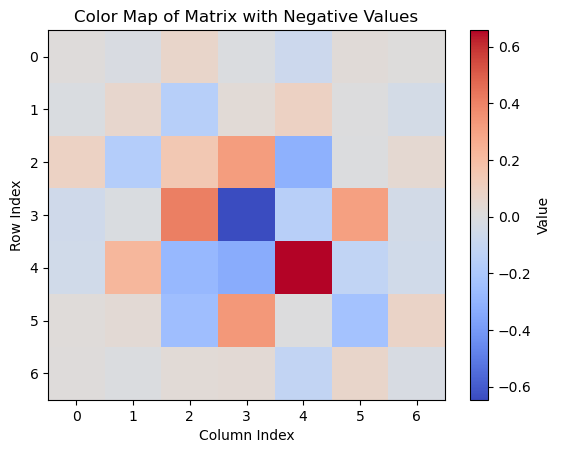

tensor([[ 0.0177,  0.0194,  0.0948, -0.0560, -0.0830,  0.0426,  0.0335],
        [-0.0063,  0.0967, -0.1911, -0.1371,  0.0494,  0.0135, -0.0143],
        [ 0.0988, -0.1999, -0.0766,  0.1992, -0.1533,  0.0447,  0.0458],
        [-0.0511, -0.1638,  0.2824, -0.3129,  0.0851,  0.2887, -0.0676],
        [-0.0750,  0.1215, -0.1269, -0.0442,  0.5628, -0.1628, -0.0649],
        [-0.0078,  0.0214, -0.0974,  0.3511, -0.0841, -0.2110,  0.0393],
        [ 0.0341,  0.0125,  0.0791,  0.0042, -0.1473,  0.0349, -0.0488]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


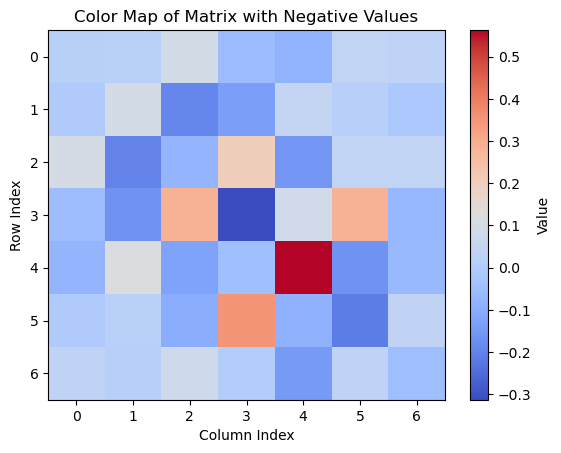

tensor([[-0.0236,  0.0774, -0.0969, -0.1226,  0.0712,  0.0882, -0.0051],
        [-0.0070,  0.1098, -0.0727, -0.3036,  0.2810,  0.0817, -0.0549],
        [ 0.0037,  0.1198, -0.0495, -0.5108,  0.4865,  0.0656, -0.0739],
        [ 0.0153,  0.0931, -0.0619, -0.5080,  0.4915,  0.0277, -0.0688],
        [ 0.0188,  0.0872, -0.0662, -0.3080,  0.2703,  0.0293, -0.0189],
        [ 0.0081,  0.0762, -0.0828, -0.0739,  0.0699,  0.0398, -0.0024],
        [ 0.0076,  0.0573, -0.1039,  0.0117, -0.0187,  0.0259,  0.0275]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


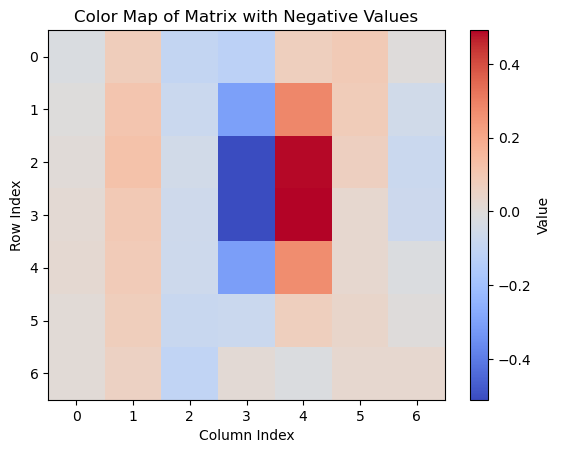

tensor([[-0.0221,  0.0957, -0.0888, -0.1247,  0.0849,  0.1321, -0.0489],
        [ 0.0026,  0.1150, -0.1289, -0.3634,  0.3791,  0.1532, -0.1397],
        [ 0.0170,  0.1415, -0.1332, -0.6195,  0.6764,  0.1665, -0.1897],
        [ 0.0218,  0.1166, -0.1394, -0.6017,  0.7183,  0.1364, -0.1907],
        [ 0.0028,  0.0726, -0.1231, -0.3478,  0.3955,  0.0865, -0.1073],
        [-0.0104,  0.0745, -0.1006, -0.0642,  0.1019,  0.0678, -0.0457],
        [-0.0188,  0.0627, -0.0854,  0.0438, -0.0231,  0.0493,  0.0039]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


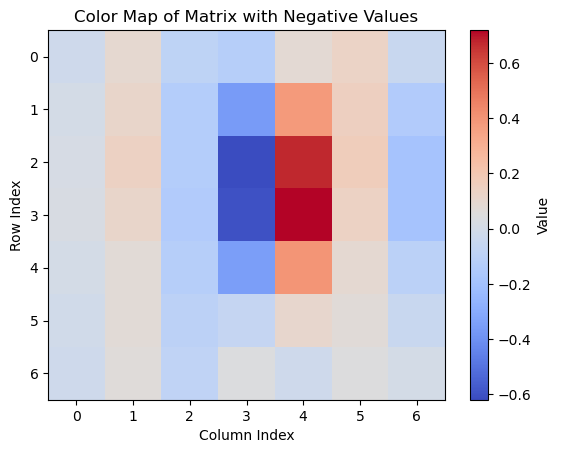

tensor([[-0.0251,  0.0377, -0.0313, -0.0328,  0.0458,  0.0768, -0.0387],
        [-0.0029,  0.0325, -0.0115, -0.1661,  0.2334,  0.0402, -0.0839],
        [-0.0131,  0.0104,  0.0050, -0.3446,  0.4268, -0.0043, -0.1275],
        [ 0.0036,  0.0032,  0.0151, -0.3178,  0.4474, -0.0204, -0.0999],
        [ 0.0145, -0.0041, -0.0106, -0.1644,  0.2224, -0.0140, -0.0577],
        [-0.0086,  0.0091, -0.0433,  0.0084,  0.0430,  0.0218, -0.0242],
        [-0.0015,  0.0168, -0.0569,  0.0723, -0.0181,  0.0496,  0.0011]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


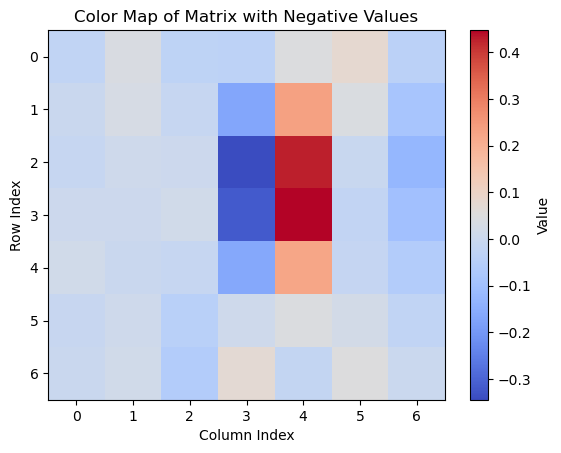

tensor([[ 8.3123e-03,  7.2702e-03,  2.9594e-02,  2.4435e-02, -4.8789e-02,
         -2.4590e-02,  2.8619e-02],
        [ 2.1792e-02,  7.4463e-02,  1.5288e-01,  3.0100e-01,  2.6727e-01,
          1.6422e-01,  9.2330e-02],
        [-6.8666e-02, -1.3080e-01, -2.5619e-01, -3.0715e-01, -1.5922e-01,
         -4.2764e-02, -4.6052e-02],
        [ 1.7082e-03, -1.4047e-02, -1.1840e-01, -3.8405e-01, -5.9437e-01,
         -4.1830e-01, -2.2880e-01],
        [-2.6054e-02,  4.4016e-02,  2.1675e-01,  4.7466e-01,  4.2063e-01,
          2.5798e-01,  7.6103e-02],
        [ 8.0475e-03,  1.6420e-02, -2.8973e-02, -3.3723e-02,  1.1135e-02,
          5.5756e-02,  1.5344e-02],
        [-2.5005e-03, -5.5547e-04, -2.8477e-02, -2.2922e-02, -3.7227e-02,
         -3.1427e-03,  3.7553e-03]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


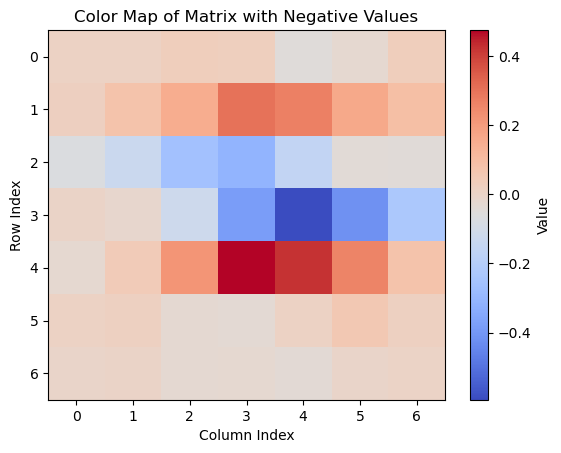

tensor([[-1.1983e-02,  1.9703e-02,  4.9850e-02,  4.7085e-02, -3.7327e-03,
          8.3258e-04,  2.7556e-02],
        [ 1.7567e-03,  7.5848e-02,  1.7017e-01,  3.3400e-01,  3.5189e-01,
          2.4558e-01,  9.6969e-02],
        [-1.0558e-01, -1.8412e-01, -3.5550e-01, -4.4439e-01, -2.5262e-01,
         -9.1499e-02, -9.5787e-02],
        [-4.9063e-04, -2.8419e-02, -1.6743e-01, -5.0887e-01, -7.3164e-01,
         -5.3258e-01, -3.0237e-01],
        [ 5.6748e-03,  9.6117e-02,  3.1522e-01,  6.2587e-01,  5.7972e-01,
          3.3942e-01,  1.0268e-01],
        [ 2.8546e-02,  5.1203e-02,  1.2754e-02,  2.1994e-02,  9.4850e-02,
          1.1514e-01,  5.3249e-02],
        [-1.9659e-02, -8.5559e-03, -3.9215e-02, -5.4728e-02, -7.5178e-02,
         -3.2093e-02, -1.6355e-02]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


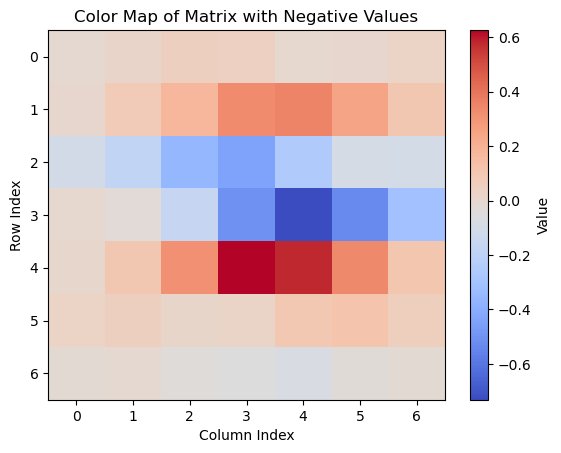

tensor([[-0.0025, -0.0112, -0.0311, -0.0460, -0.0494, -0.0387, -0.0069],
        [-0.0067,  0.0420,  0.0652,  0.1553,  0.1360,  0.0769,  0.0177],
        [-0.0588, -0.0522, -0.1237, -0.1340,  0.0059,  0.0510, -0.0056],
        [ 0.0057,  0.0190, -0.0345, -0.2055, -0.3337, -0.2195, -0.1008],
        [-0.0239, -0.0072,  0.0827,  0.2988,  0.2900,  0.1642,  0.0652],
        [ 0.0560,  0.0374, -0.0359, -0.0888, -0.0500, -0.0138,  0.0118],
        [-0.0112, -0.0057, -0.0130, -0.0088, -0.0343, -0.0258, -0.0101]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


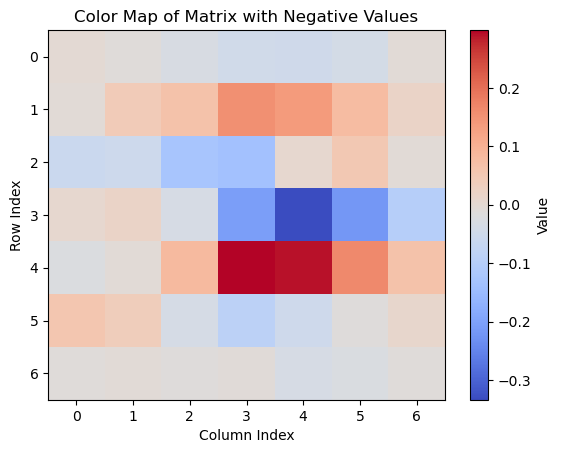

tensor([[-0.0083, -0.2285, -0.1175,  0.1125,  0.0504,  0.0402,  0.0478],
        [-0.2532, -0.2896,  0.0971,  0.2493,  0.0452,  0.0474,  0.0052],
        [-0.1703,  0.0996,  0.4129,  0.3123,  0.0426,  0.0374, -0.0369],
        [ 0.0819,  0.3026,  0.3404,  0.1577, -0.1207, -0.1269, -0.1229],
        [ 0.1231,  0.1657,  0.1067, -0.1265, -0.3273, -0.1888, -0.0831],
        [ 0.0814,  0.0790, -0.0240, -0.2660, -0.2498, -0.0190,  0.0594],
        [ 0.0443, -0.0156, -0.1178, -0.2130, -0.0606,  0.1159,  0.0865]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


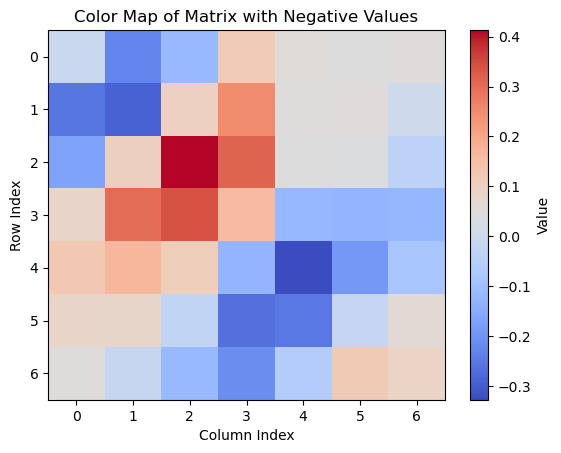

tensor([[-0.0148, -0.2578, -0.1506,  0.0892,  0.0303,  0.0098,  0.0262],
        [-0.2660, -0.3138,  0.1144,  0.2826,  0.0687,  0.0548,  0.0252],
        [-0.1975,  0.1027,  0.4493,  0.3455,  0.0531,  0.0366, -0.0219],
        [ 0.0575,  0.3220,  0.3788,  0.1727, -0.1309, -0.1386, -0.1170],
        [ 0.1030,  0.1854,  0.1387, -0.1084, -0.3191, -0.1792, -0.0636],
        [ 0.0605,  0.0914, -0.0145, -0.2733, -0.2458, -0.0095,  0.0576],
        [ 0.0387,  0.0109, -0.0963, -0.2058, -0.0402,  0.1153,  0.0583]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


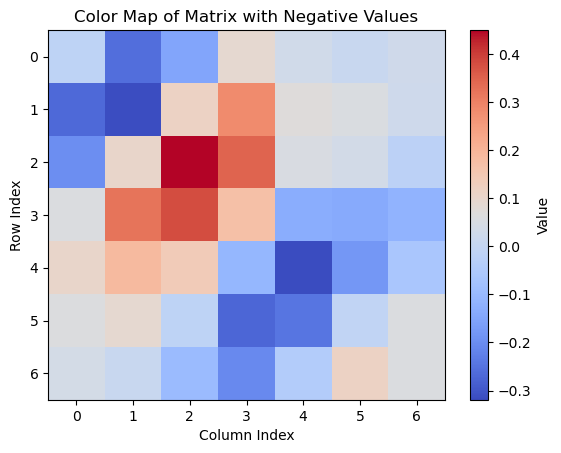

tensor([[ 0.1318, -0.0986, -0.0759,  0.0324, -0.0236, -0.0340,  0.0043],
        [-0.0627, -0.2034,  0.0226,  0.0793, -0.0430,  0.0093,  0.0360],
        [-0.0968, -0.0005,  0.1598,  0.0602, -0.0387,  0.0375,  0.0240],
        [-0.0032,  0.0725,  0.0890,  0.0306, -0.0549, -0.0205, -0.0083],
        [ 0.0027,  0.0053,  0.0234, -0.0221, -0.0780, -0.0065,  0.0286],
        [-0.0056,  0.0235,  0.0246, -0.0806, -0.0305,  0.0591,  0.0416],
        [ 0.0350,  0.0253, -0.0003, -0.0527,  0.0502,  0.0723, -0.0015]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


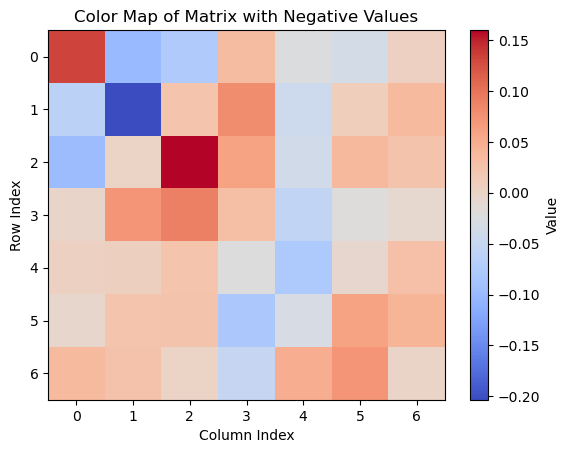

tensor([[-0.0134, -0.0322, -0.1594,  0.1106,  0.1678, -0.0120, -0.0739],
        [ 0.0416, -0.0719, -0.2501,  0.2954,  0.3036, -0.0976, -0.1104],
        [ 0.0122, -0.1180, -0.2955,  0.3825,  0.3139, -0.1998, -0.1164],
        [ 0.0081, -0.1084, -0.2240,  0.4209,  0.2370, -0.2652, -0.1121],
        [-0.0006, -0.0749, -0.1066,  0.3021,  0.1035, -0.2020, -0.0430],
        [ 0.0019, -0.0508, -0.0258,  0.1621,  0.0027, -0.0909,  0.0149],
        [-0.0178,  0.0011,  0.0375,  0.0947, -0.0196, -0.0212,  0.0199]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


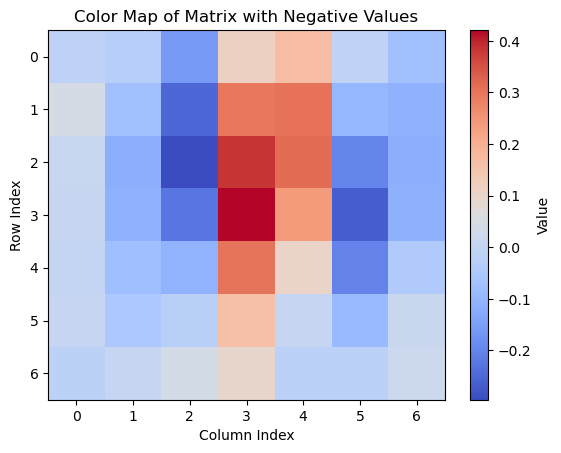

tensor([[-0.0106, -0.0372, -0.1884,  0.1301,  0.2134,  0.0117, -0.0461],
        [ 0.0105, -0.1146, -0.2987,  0.3652,  0.3877, -0.0911, -0.1319],
        [-0.0220, -0.1628, -0.3194,  0.5119,  0.4278, -0.2186, -0.1654],
        [-0.0221, -0.1470, -0.2282,  0.5702,  0.3461, -0.2973, -0.1482],
        [-0.0484, -0.1044, -0.1121,  0.3897,  0.1291, -0.2524, -0.0762],
        [-0.0016, -0.0288, -0.0052,  0.2012,  0.0031, -0.1067,  0.0231],
        [-0.0107,  0.0172,  0.0444,  0.1047, -0.0162, -0.0175,  0.0291]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


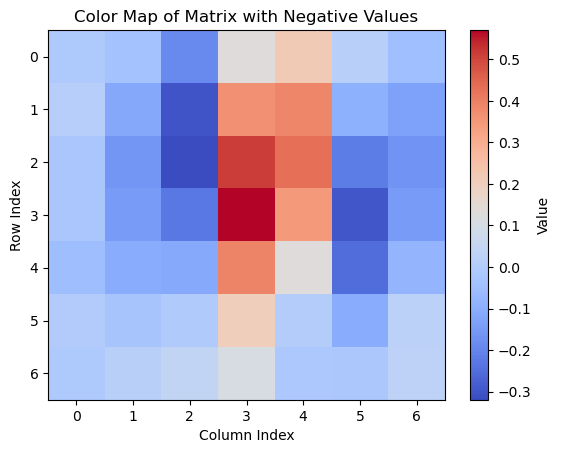

tensor([[-0.0017,  0.0380, -0.1097,  0.0442,  0.0680, -0.0122,  0.0089],
        [ 0.0259,  0.0155, -0.1973,  0.1621,  0.1217, -0.1088, -0.0252],
        [ 0.0113, -0.0112, -0.2452,  0.2109,  0.1382, -0.1533, -0.0156],
        [ 0.0263, -0.0118, -0.1952,  0.2576,  0.1220, -0.1800,  0.0074],
        [ 0.0100, -0.0121, -0.1177,  0.1612,  0.0233, -0.1375,  0.0316],
        [ 0.0257,  0.0006, -0.0496,  0.0744, -0.0185, -0.0509,  0.0586],
        [-0.0125,  0.0111,  0.0081,  0.0495, -0.0227, -0.0140,  0.0239]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


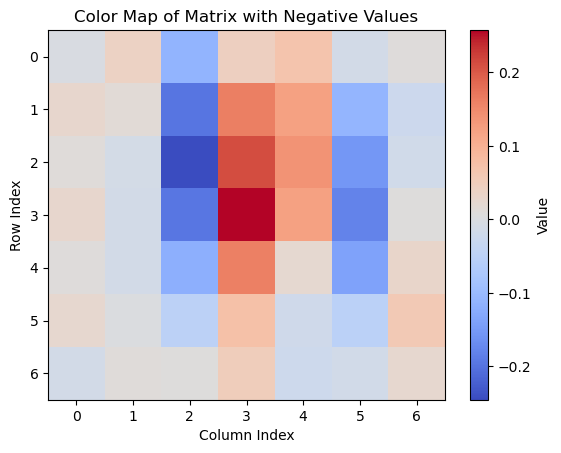

tensor([[ 0.0842,  0.0758,  0.0181, -0.0684, -0.0708,  0.0540,  0.1281],
        [ 0.0688,  0.0204, -0.0753, -0.1821, -0.2045, -0.0493,  0.0689],
        [ 0.0532, -0.0270, -0.1298, -0.2340, -0.2619, -0.1266,  0.0308],
        [-0.0090, -0.0847, -0.1741, -0.2783, -0.2774, -0.1667, -0.0237],
        [-0.0637, -0.1267, -0.1809, -0.2587, -0.2754, -0.1911, -0.0581],
        [ 0.0058, -0.0027, -0.0487, -0.1530, -0.1844, -0.1018,  0.0168],
        [ 0.0877,  0.0936,  0.0427, -0.0618, -0.1022, -0.0197,  0.0589]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


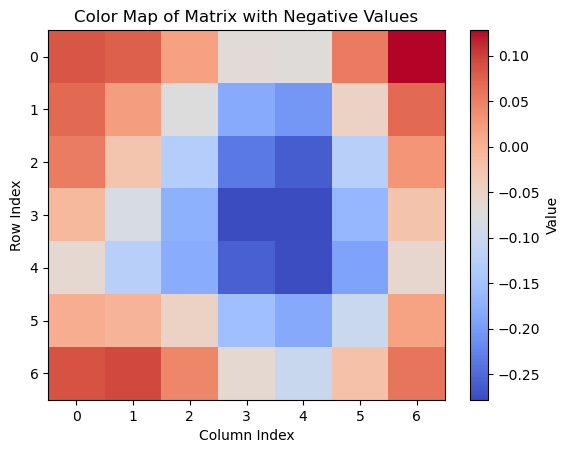

tensor([[-0.0987, -0.0432, -0.0232, -0.0048,  0.0246,  0.0187, -0.0111],
        [-0.0480,  0.0006,  0.0261,  0.0624,  0.0586,  0.0531,  0.0234],
        [-0.0131,  0.0341,  0.0783,  0.1197,  0.0985,  0.0673,  0.0540],
        [ 0.0087,  0.0773,  0.1224,  0.1507,  0.1612,  0.1141,  0.0761],
        [-0.0114,  0.0407,  0.0907,  0.1350,  0.1421,  0.0827,  0.0631],
        [-0.0445,  0.0144,  0.0460,  0.0664,  0.0733,  0.0413,  0.0466],
        [-0.0485,  0.0044,  0.0108,  0.0215,  0.0233,  0.0086,  0.0125]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


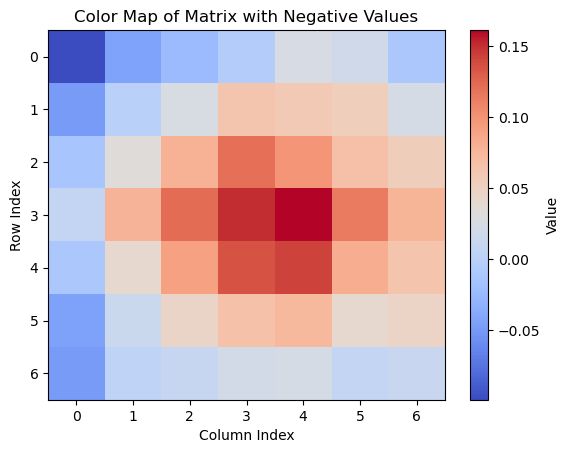

tensor([[-0.0111,  0.0168,  0.0104,  0.0044,  0.0356,  0.0158, -0.0196],
        [-0.0062,  0.0013, -0.0089,  0.0063,  0.0176, -0.0036, -0.0406],
        [ 0.0096,  0.0076,  0.0160,  0.0238,  0.0106, -0.0203, -0.0418],
        [ 0.0128,  0.0144,  0.0169,  0.0098,  0.0195, -0.0144, -0.0455],
        [ 0.0103,  0.0017,  0.0063,  0.0102,  0.0214, -0.0254, -0.0385],
        [-0.0062, -0.0045, -0.0007, -0.0079,  0.0105, -0.0193, -0.0262],
        [-0.0020, -0.0052, -0.0081, -0.0075,  0.0100, -0.0073, -0.0193]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


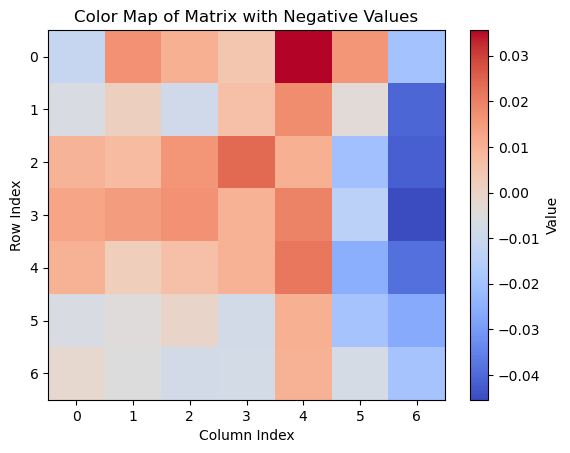

tensor([[ 0.0585,  0.0068,  0.0268,  0.0641,  0.0606,  0.0423,  0.0285],
        [-0.0558, -0.0708, -0.0529, -0.0147,  0.0028, -0.0037, -0.0127],
        [-0.0570, -0.0561, -0.0486, -0.0298, -0.0071,  0.0027, -0.0146],
        [-0.0158, -0.0124, -0.0038, -0.0167, -0.0129,  0.0040, -0.0160],
        [ 0.0316,  0.0739,  0.0819,  0.0641,  0.0379,  0.0318, -0.0039],
        [ 0.0159,  0.0422,  0.0476,  0.0462,  0.0223, -0.0225, -0.0722],
        [ 0.0498,  0.0515,  0.0381,  0.0289,  0.0039, -0.0592, -0.1040]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


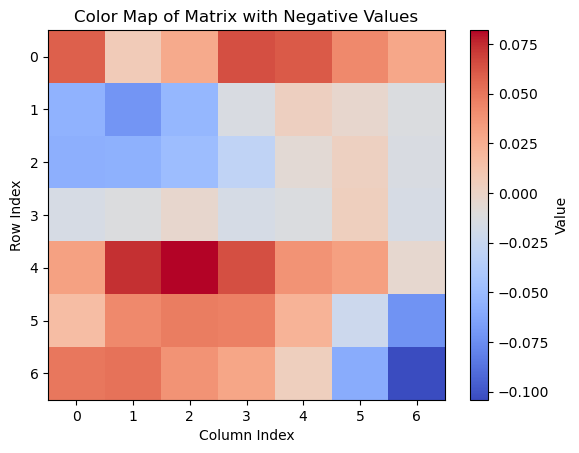

tensor([[ 0.0338, -0.0098,  0.0023,  0.0323,  0.0264,  0.0279,  0.0254],
        [-0.0518, -0.0584, -0.0456, -0.0202, -0.0075,  0.0032,  0.0119],
        [-0.0385, -0.0363, -0.0429, -0.0326, -0.0103,  0.0164,  0.0150],
        [ 0.0064,  0.0058,  0.0018, -0.0140, -0.0096,  0.0232,  0.0199],
        [ 0.0437,  0.0862,  0.0917,  0.0615,  0.0332,  0.0487,  0.0272],
        [ 0.0330,  0.0711,  0.0778,  0.0745,  0.0461,  0.0169, -0.0208],
        [ 0.0768,  0.0885,  0.0794,  0.0728,  0.0496, -0.0005, -0.0425]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


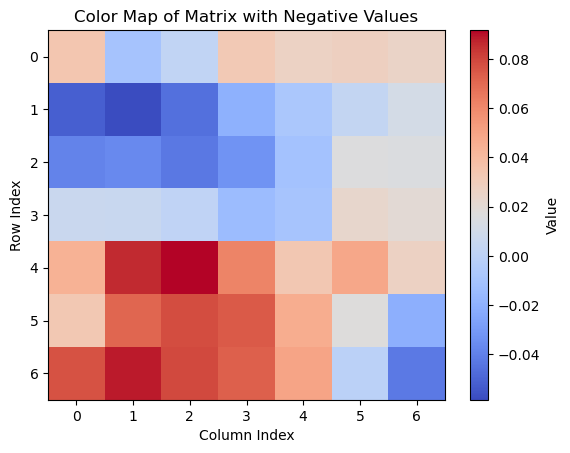

tensor([[ 0.0106, -0.0207, -0.0098,  0.0125,  0.0048,  0.0117,  0.0157],
        [-0.0478, -0.0483, -0.0429, -0.0209, -0.0132,  0.0031,  0.0129],
        [-0.0366, -0.0403, -0.0510, -0.0366, -0.0266,  0.0079,  0.0187],
        [-0.0003, -0.0092, -0.0245, -0.0314, -0.0273,  0.0188,  0.0375],
        [ 0.0065,  0.0458,  0.0416,  0.0195, -0.0044,  0.0378,  0.0425],
        [-0.0084,  0.0167,  0.0200,  0.0261,  0.0071,  0.0158,  0.0070],
        [ 0.0379,  0.0362,  0.0206,  0.0292,  0.0220,  0.0121,  0.0047]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


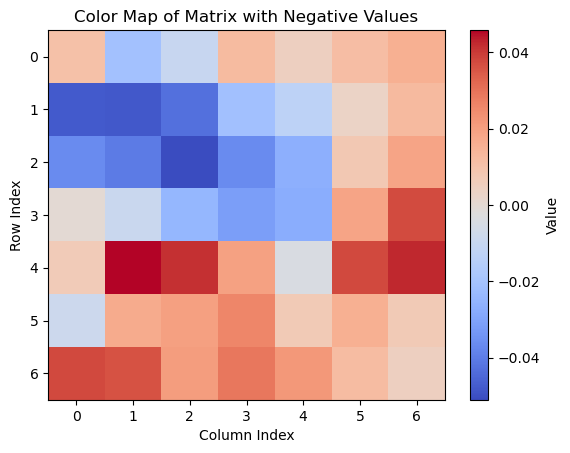

tensor([[-1.0300e-02,  2.2791e-04, -2.0268e-02, -2.5527e-03,  2.6805e-02,
         -4.8212e-03, -2.5637e-03],
        [-4.6707e-02,  5.3509e-03,  6.9110e-02,  8.7809e-03, -4.4353e-02,
          1.0252e-04,  9.7425e-03],
        [ 1.1357e-02,  1.4968e-01,  2.0148e-02, -2.2947e-01, -2.2099e-02,
          9.9839e-02,  3.8306e-02],
        [ 7.2483e-02, -4.5884e-02, -4.4947e-01, -8.7976e-02,  3.8565e-01,
          7.8918e-02, -6.8459e-02],
        [ 2.4968e-03, -2.4351e-01,  2.7487e-03,  6.8009e-01,  2.3286e-01,
         -2.1444e-01, -3.3880e-02],
        [-4.4805e-02,  1.6050e-02,  3.8873e-01,  1.2368e-01, -4.2124e-01,
         -2.0181e-01,  4.8770e-02],
        [ 1.6074e-02,  7.3974e-02,  1.5660e-02, -2.6589e-01, -8.6539e-02,
          1.1700e-01,  8.5851e-02]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


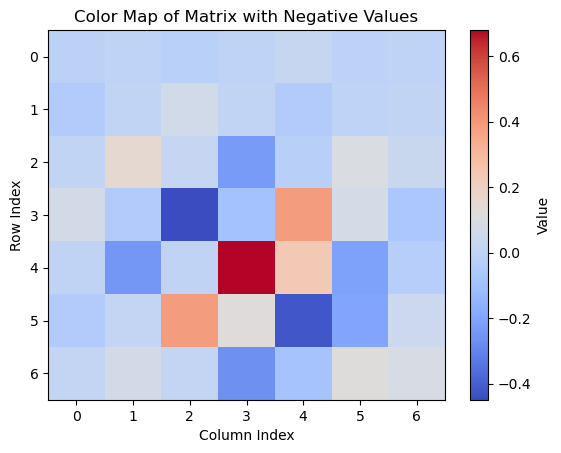

tensor([[ 0.0102,  0.0210, -0.0149, -0.0360,  0.0185,  0.0200,  0.0060],
        [-0.0090,  0.0282,  0.0545, -0.0564, -0.0594,  0.0390,  0.0227],
        [ 0.0409,  0.1221, -0.1162, -0.3642, -0.0150,  0.1558,  0.0415],
        [ 0.0283, -0.1838, -0.6197, -0.0276,  0.5774,  0.1527, -0.0905],
        [-0.0508, -0.3052,  0.1114,  1.0165,  0.4153, -0.2685, -0.1053],
        [-0.0464,  0.0701,  0.5651,  0.2411, -0.5265, -0.3412, -0.0113],
        [ 0.0422,  0.0905,  0.0103, -0.3611, -0.2151,  0.0574,  0.0933]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


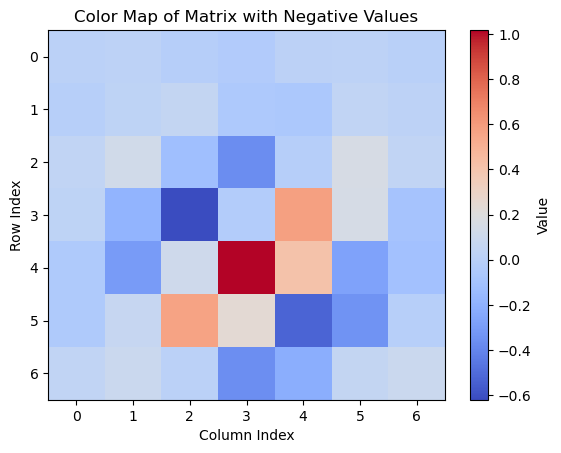

tensor([[ 0.0172,  0.0104, -0.0297, -0.0201,  0.0147, -0.0046,  0.0121],
        [-0.0261, -0.0058,  0.0429, -0.0074, -0.0430, -0.0065, -0.0072],
        [-0.0025,  0.1023, -0.0121, -0.2239, -0.0397,  0.0769,  0.0226],
        [ 0.0268, -0.0728, -0.4049, -0.0871,  0.3113,  0.0669, -0.0451],
        [-0.0038, -0.1860,  0.0243,  0.6236,  0.2302, -0.1423,  0.0056],
        [-0.0370,  0.0066,  0.3338,  0.1151, -0.3340, -0.1349,  0.0233],
        [ 0.0296,  0.0534,  0.0238, -0.1978, -0.0420,  0.0796,  0.0184]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


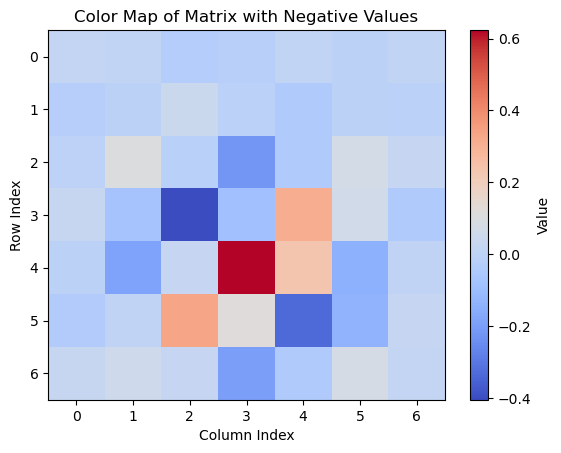

tensor([[ 3.8688e-09,  1.8607e-10,  2.1952e-09,  8.3084e-09,  8.7748e-09,
          1.1474e-08,  7.3132e-09],
        [-2.9831e-09, -5.3952e-10,  2.3216e-09,  4.0346e-09,  3.3365e-09,
          2.6578e-09,  5.2765e-09],
        [ 1.6302e-09,  6.9136e-09,  3.6989e-09,  3.7759e-09,  5.3211e-09,
          6.2465e-09,  4.2829e-09],
        [ 6.2143e-09,  9.0906e-09,  4.0032e-09,  9.1948e-09,  5.0580e-09,
          3.0323e-09,  8.6820e-09],
        [ 6.0326e-09,  6.0520e-09,  6.8837e-09,  7.4051e-09,  7.7325e-09,
          7.0108e-09,  5.0969e-09],
        [ 9.1797e-09,  7.3007e-09,  6.9500e-09,  1.0030e-08,  1.1456e-08,
          1.0514e-08,  7.7712e-09],
        [ 1.1385e-08,  8.1565e-09,  7.5665e-09,  1.3586e-08,  1.3640e-08,
          1.7204e-08,  1.4138e-08]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


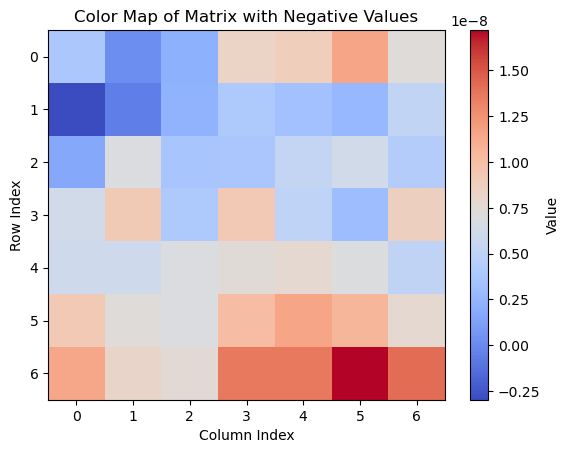

tensor([[-6.7251e-09, -9.9137e-09, -9.6092e-09, -3.8324e-09, -9.5826e-10,
          3.2090e-09,  5.7712e-09],
        [-1.1005e-08, -1.1094e-08, -5.8745e-09, -3.1774e-09, -2.5730e-09,
         -2.2785e-09,  3.5072e-10],
        [-7.8267e-09, -2.1763e-09, -2.9041e-09, -4.5939e-10, -3.6883e-09,
         -2.9054e-09,  2.9935e-09],
        [-3.2297e-09, -2.1246e-10, -2.4640e-09,  1.9703e-09, -8.1548e-10,
         -1.6133e-09, -6.7205e-10],
        [-4.1273e-09, -1.4056e-09, -6.6148e-09, -2.1238e-09, -4.2965e-10,
         -1.0602e-10,  3.5069e-09],
        [-1.7237e-09, -3.9192e-09, -1.2001e-09, -3.0804e-10,  1.0149e-09,
          6.0013e-09,  3.4204e-09],
        [-1.5560e-09,  7.4945e-10, -3.0576e-09,  5.3018e-09,  6.3463e-09,
          8.9140e-09,  6.6496e-09]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


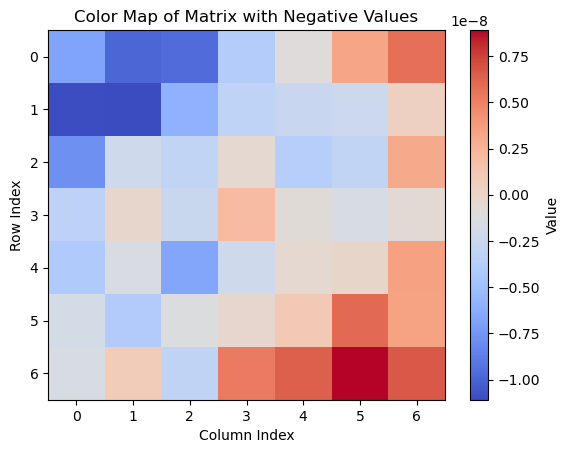

tensor([[-2.9918e-09, -7.5481e-09, -3.3692e-09,  4.6390e-10,  4.0858e-09,
          2.8490e-09,  7.7839e-09],
        [-5.1214e-09, -6.2611e-09, -3.2586e-09,  1.9777e-09,  3.0463e-09,
          2.3032e-09,  3.8767e-09],
        [ 4.2059e-10, -2.7834e-09,  1.4394e-10,  6.9841e-09,  4.8083e-09,
          4.1281e-09,  8.3753e-09],
        [ 4.6024e-09,  2.7065e-09,  4.0161e-09,  5.7703e-09,  5.7672e-09,
          6.2471e-09,  7.1668e-09],
        [ 6.1695e-09,  3.2653e-09,  3.3355e-09,  5.9738e-09,  9.5240e-09,
          6.1385e-09,  6.9994e-09],
        [ 7.5269e-09,  5.3563e-09,  4.8443e-09,  9.1515e-09,  1.2052e-08,
          9.1710e-09,  8.6250e-09],
        [ 1.0440e-08,  9.8448e-09,  4.5292e-09,  1.4273e-08,  1.6011e-08,
          1.8489e-08,  1.6214e-08]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


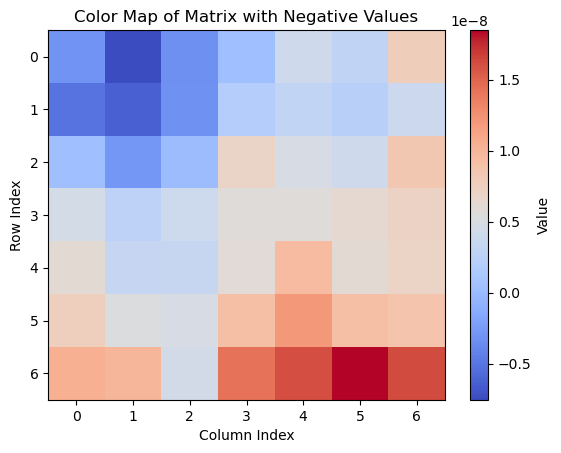

tensor([[-0.0078, -0.0050,  0.0013,  0.0181,  0.0203, -0.0225,  0.0124],
        [-0.0083, -0.0564, -0.0758,  0.0630,  0.1808,  0.0192, -0.0295],
        [ 0.0275, -0.0363, -0.2614, -0.2654,  0.1587,  0.1893,  0.0651],
        [ 0.0843,  0.1955, -0.0018, -0.5235, -0.3011,  0.0309,  0.1093],
        [ 0.0161,  0.1975,  0.3773, -0.0358, -0.2819, -0.1984, -0.0443],
        [-0.0664, -0.0059,  0.2366,  0.2273,  0.0528, -0.0344, -0.0526],
        [-0.1064, -0.1184,  0.0202,  0.1067,  0.0427, -0.0145, -0.0126]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


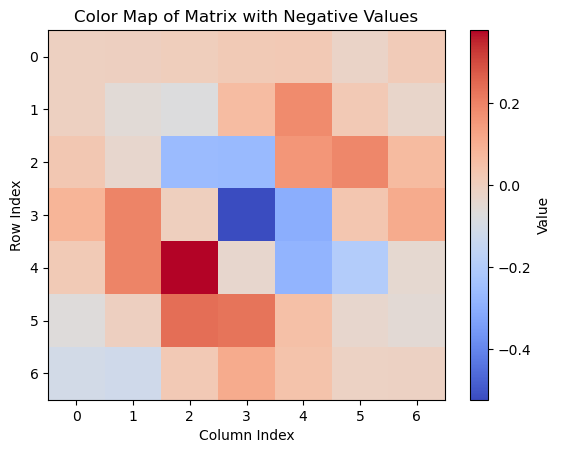

tensor([[-0.0216, -0.0378, -0.0122,  0.0326,  0.0509, -0.0060,  0.0237],
        [-0.0084, -0.0787, -0.1177,  0.0679,  0.2544,  0.0877,  0.0069],
        [ 0.0315, -0.0574, -0.3951, -0.4118,  0.1458,  0.2645,  0.1322],
        [ 0.1268,  0.2430, -0.0819, -0.7401, -0.4776, -0.0087,  0.1532],
        [ 0.0822,  0.3009,  0.4454, -0.1288, -0.4552, -0.3165, -0.0664],
        [-0.0181,  0.0778,  0.3328,  0.2583,  0.0165, -0.0970, -0.0878],
        [-0.0680, -0.0494,  0.0990,  0.1689,  0.0858,  0.0178,  0.0105]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


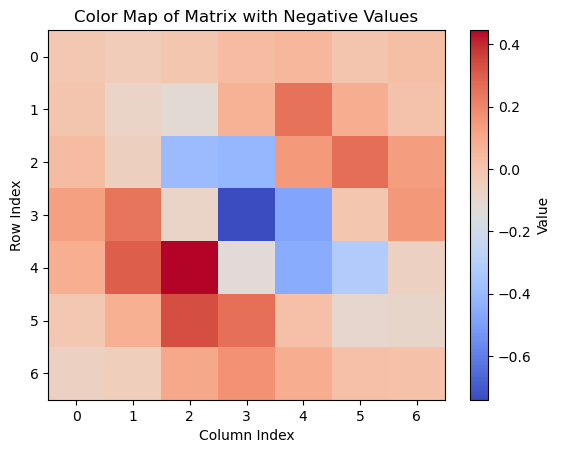

tensor([[ 0.0022, -0.0054,  0.0142, -0.0032, -0.0114, -0.0387, -0.0178],
        [-0.0025, -0.0101, -0.0006,  0.0971,  0.1395, -0.0409, -0.0698],
        [-0.0154, -0.0183, -0.1639, -0.1271,  0.1940,  0.1339,  0.0048],
        [ 0.0316,  0.1262,  0.0309, -0.3390, -0.1383,  0.0942,  0.1056],
        [-0.0219,  0.0678,  0.2450, -0.0421, -0.1941, -0.1304, -0.0147],
        [-0.0280, -0.0530,  0.1026,  0.1112,  0.0314, -0.0115, -0.0227],
        [-0.0177, -0.0509,  0.0065,  0.0316,  0.0066,  0.0054,  0.0188]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


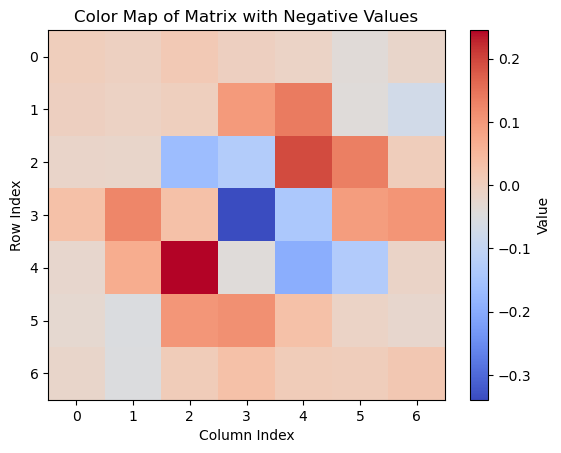

tensor([[-0.0263, -0.0221,  0.0585,  0.0235, -0.0330,  0.0085,  0.0142],
        [-0.0200, -0.0558,  0.0681,  0.0134, -0.0193, -0.0184, -0.0021],
        [ 0.0350, -0.1758,  0.1335,  0.0861, -0.0991,  0.0530, -0.0333],
        [ 0.1284, -0.1878, -0.2103,  0.4451, -0.1903,  0.0417, -0.0086],
        [ 0.0522,  0.2183, -0.6554,  0.3583,  0.1437, -0.1200,  0.0246],
        [-0.1273,  0.3257, -0.2821, -0.2435,  0.3130, -0.0519, -0.0035],
        [ 0.0108,  0.0161,  0.1735, -0.2591,  0.0394,  0.0349, -0.0101]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


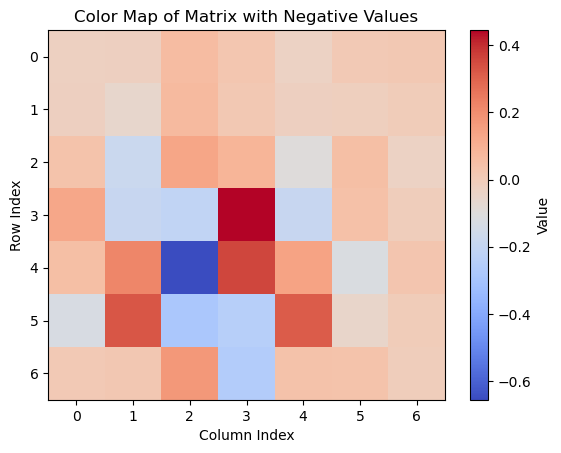

tensor([[-0.0188, -0.0325,  0.0505,  0.0213, -0.0077,  0.0033, -0.0028],
        [-0.0159, -0.0673,  0.0712,  0.0248,  0.0125, -0.0032,  0.0042],
        [ 0.0540, -0.2524,  0.1185,  0.1236, -0.0871,  0.0758, -0.0241],
        [ 0.1678, -0.2744, -0.3108,  0.5407, -0.1832,  0.0357,  0.0248],
        [ 0.1095,  0.2304, -0.8434,  0.3683,  0.2202, -0.1399,  0.0406],
        [-0.0968,  0.4269, -0.3596, -0.3762,  0.3578, -0.0418,  0.0187],
        [-0.0288,  0.0659,  0.2265, -0.3371,  0.0123,  0.0135, -0.0071]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


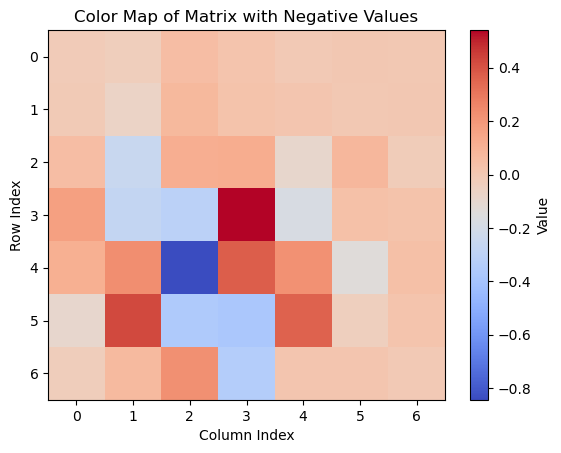

tensor([[-1.4162e-04, -2.5923e-02,  2.2364e-02,  1.9764e-02, -1.0257e-02,
         -5.8227e-03,  3.0389e-03],
        [ 2.3778e-02, -1.6790e-02,  8.1814e-03, -3.0118e-02,  3.3414e-02,
          9.3480e-03,  1.2591e-02],
        [ 5.9009e-02, -8.5712e-02,  9.3063e-02, -3.4102e-02, -8.7569e-02,
          8.5660e-02, -1.9638e-02],
        [ 8.1033e-02, -4.3781e-02, -9.8463e-02,  2.7823e-01, -2.8500e-01,
          5.4509e-02,  1.9796e-02],
        [-2.5688e-02,  2.7373e-01, -3.9759e-01,  3.1110e-01, -2.0834e-02,
         -1.5854e-01,  3.5656e-02],
        [-1.8301e-01,  2.5873e-01, -6.7582e-02, -1.4323e-01,  2.0087e-01,
         -9.1982e-02,  2.0514e-02],
        [-5.7123e-02, -9.1905e-02,  2.1096e-01, -1.2275e-01,  3.2227e-02,
          6.4359e-03,  1.3582e-02]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


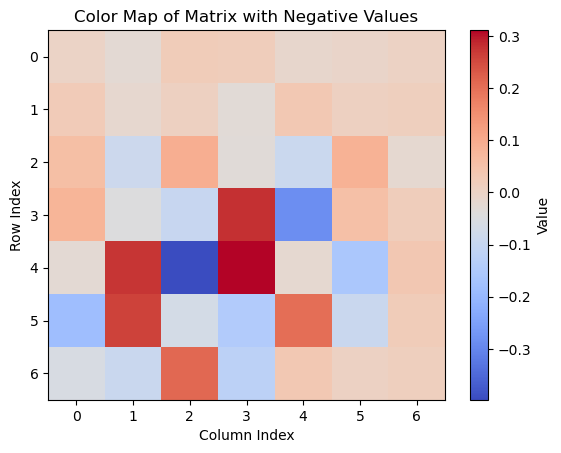

tensor([[-3.1996e-03, -2.1068e-02, -2.0242e-02,  1.7986e-02,  3.3649e-02,
         -3.6867e-02,  5.6153e-04],
        [-5.7298e-03,  3.6562e-03,  4.1108e-02,  7.9021e-02,  3.5966e-02,
         -1.0975e-01, -8.2367e-02],
        [-2.6271e-02, -9.1226e-02, -4.7568e-02,  1.4746e-01,  2.7999e-01,
         -7.7575e-04, -1.4643e-01],
        [ 2.1814e-02, -7.8588e-02, -3.2883e-01, -2.7168e-01,  3.2657e-01,
          3.1097e-01,  4.2874e-02],
        [ 6.1976e-02,  1.4999e-01, -5.8877e-02, -6.0647e-01, -2.6104e-01,
          1.9549e-01,  1.5814e-01],
        [-5.3388e-03,  1.1051e-01,  3.0597e-01, -7.5415e-02, -3.3842e-01,
         -1.0253e-01,  3.1601e-02],
        [-5.1156e-02, -5.6047e-02,  1.2051e-01,  1.6990e-01, -1.1243e-02,
         -6.6626e-02, -7.6293e-02]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


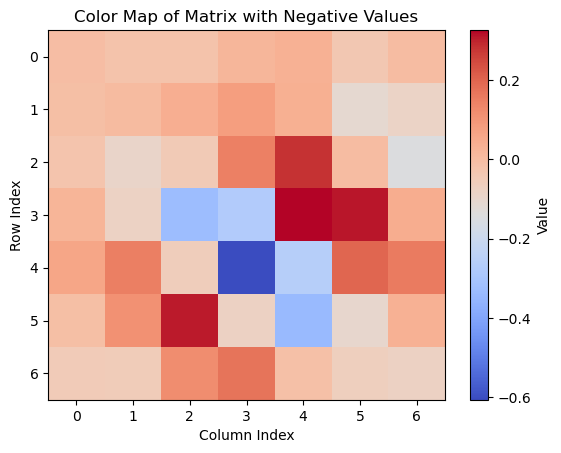

tensor([[-0.0047,  0.0127,  0.0027,  0.0378,  0.0372, -0.0444, -0.0043],
        [-0.0467,  0.0014,  0.0437,  0.1236,  0.1064, -0.0786, -0.0871],
        [-0.0751, -0.1324, -0.0918,  0.1865,  0.3951,  0.0915, -0.0985],
        [-0.0016, -0.1341, -0.4639, -0.3817,  0.3714,  0.4195,  0.1258],
        [ 0.0785,  0.1518, -0.1552, -0.8397, -0.4080,  0.1839,  0.1859],
        [ 0.0499,  0.1833,  0.3457, -0.1546, -0.4898, -0.1814,  0.0144],
        [-0.0134,  0.0178,  0.1886,  0.1964, -0.0341, -0.0932, -0.0779]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


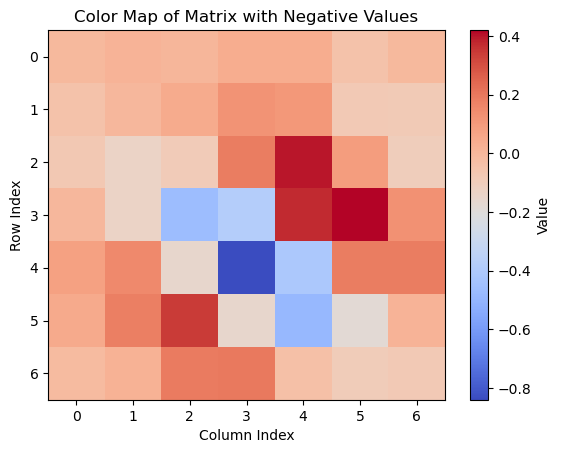

tensor([[-6.7281e-03, -8.9370e-03, -2.1758e-02,  9.7639e-03,  3.6413e-02,
         -1.0835e-02,  2.4890e-02],
        [-2.6677e-02, -1.6622e-03,  1.4126e-02,  2.6656e-02,  8.0586e-03,
         -8.3721e-02, -4.6884e-02],
        [-2.6091e-02, -5.2958e-02, -7.6474e-03,  1.2520e-01,  1.9180e-01,
         -3.2366e-02, -1.0257e-01],
        [ 5.3506e-03, -3.4330e-02, -1.9874e-01, -1.5194e-01,  2.9119e-01,
          2.0667e-01,  8.5398e-03],
        [ 8.9217e-03,  7.5640e-02, -2.7480e-02, -4.5914e-01, -1.8748e-01,
          1.2652e-01,  6.3594e-02],
        [ 3.0917e-04,  3.8242e-02,  2.2242e-01, -2.0122e-02, -2.3942e-01,
         -5.6812e-02,  2.6579e-02],
        [ 1.5589e-02, -5.1544e-02,  3.6431e-02,  9.5627e-02, -4.5067e-03,
         -4.4920e-02, -4.0118e-02]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


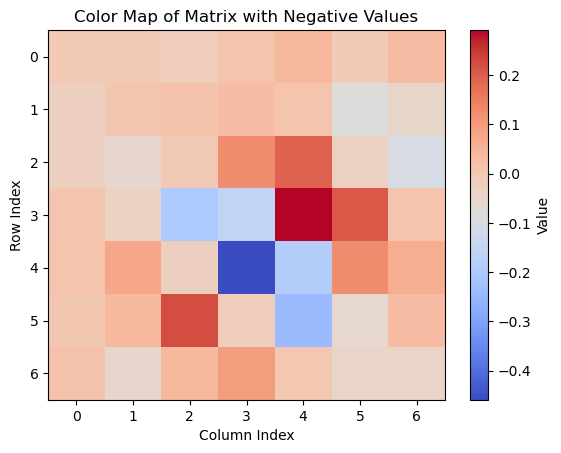

tensor([[ 0.0058,  0.0037,  0.0201, -0.0030, -0.0238, -0.0305,  0.0057],
        [-0.0014, -0.0031, -0.0152, -0.0202, -0.0271, -0.0329, -0.0314],
        [-0.0292, -0.0350, -0.0063,  0.0458,  0.0290, -0.0244, -0.0311],
        [-0.0383, -0.0448,  0.0299,  0.1304,  0.1557,  0.0443, -0.0110],
        [-0.0472, -0.0487,  0.0238,  0.1136,  0.1160,  0.0271, -0.0410],
        [-0.0161, -0.0241,  0.0008,  0.0259,  0.0012, -0.0537, -0.0856],
        [-0.0091,  0.0042,  0.0026,  0.0101, -0.0363, -0.0709, -0.1165]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


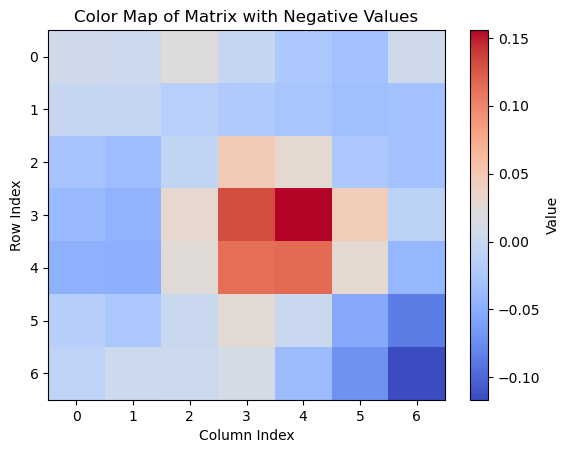

tensor([[-0.0530, -0.0142, -0.0069, -0.0222, -0.0253, -0.0607, -0.0555],
        [-0.0210,  0.0531,  0.0614,  0.0741,  0.0745,  0.0355,  0.0129],
        [-0.0171,  0.0620,  0.1358,  0.2206,  0.2119,  0.1171,  0.0671],
        [-0.0081,  0.0897,  0.2194,  0.3520,  0.3794,  0.2286,  0.1316],
        [-0.0187,  0.0856,  0.2049,  0.3264,  0.3337,  0.2169,  0.1173],
        [-0.0489,  0.0414,  0.1073,  0.1760,  0.1670,  0.0895,  0.0531],
        [-0.0826, -0.0085,  0.0278,  0.0857,  0.0653,  0.0257, -0.0035]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


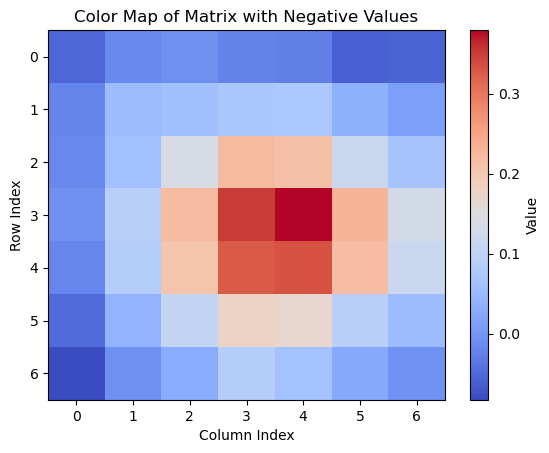

tensor([[ 0.0480, -0.0208,  0.0138,  0.0393,  0.0613,  0.0907,  0.0722],
        [ 0.0437, -0.0332, -0.0581, -0.0715, -0.0574,  0.0215,  0.0276],
        [ 0.0718, -0.0443, -0.1550, -0.2442, -0.2609, -0.1327, -0.0491],
        [ 0.0715, -0.0927, -0.2544, -0.4421, -0.4428, -0.2735, -0.1197],
        [ 0.0533, -0.0907, -0.2479, -0.4541, -0.4633, -0.2569, -0.1071],
        [ 0.0952, -0.0019, -0.0959, -0.2295, -0.2266, -0.0516,  0.0611],
        [ 0.0810, -0.0013, -0.0384, -0.0697, -0.0471,  0.0740,  0.1401]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


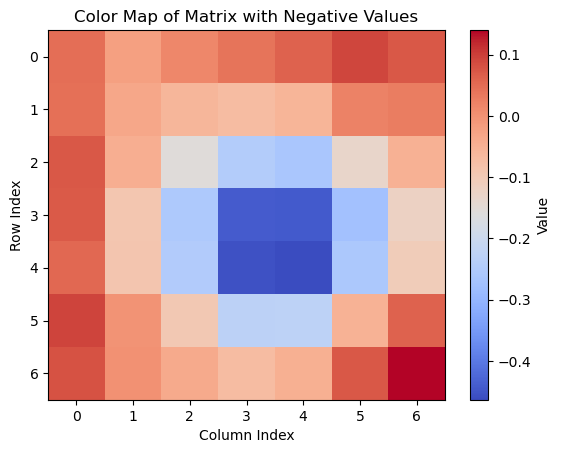

tensor([[-1.0601e-02,  1.4589e-03,  4.0352e-03, -3.0682e-03, -6.3908e-03,
          4.5165e-03, -7.6551e-03],
        [-1.9365e-02,  3.9171e-02, -5.0847e-02, -4.3316e-03,  5.9782e-02,
         -6.2590e-02, -4.3681e-04],
        [-2.0813e-02,  1.1675e-01,  4.9459e-02, -3.2135e-01,  1.6029e-01,
          9.1227e-02, -6.1416e-02],
        [-2.0833e-02, -1.1890e-01,  5.1153e-01, -1.5337e-01, -4.3003e-01,
          1.8373e-01,  1.3244e-02],
        [ 1.0898e-01, -2.8320e-01,  7.2676e-03,  6.7909e-01, -2.4285e-01,
         -1.4183e-01,  7.9319e-02],
        [ 2.3695e-02,  8.4324e-02, -4.5195e-01,  1.4446e-01,  2.9277e-01,
         -1.3376e-01, -2.6804e-03],
        [-3.0417e-02,  1.0209e-01,  4.5566e-02, -1.7647e-01,  7.0070e-02,
          4.0854e-04, -2.2924e-02]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


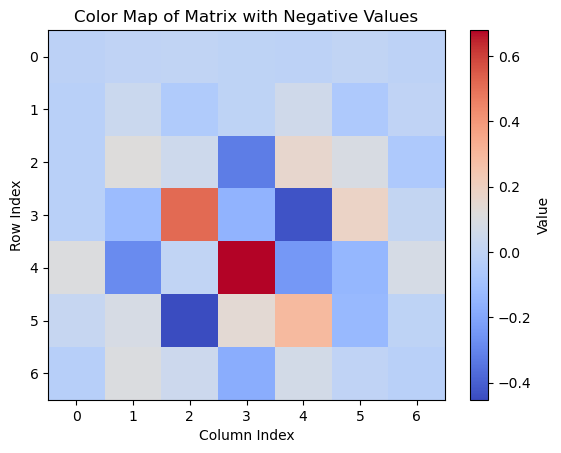

tensor([[ 0.0364,  0.0463, -0.0056, -0.0707, -0.0148,  0.0285,  0.0137],
        [-0.0116,  0.0921, -0.0338, -0.0691,  0.0477, -0.0426,  0.0390],
        [-0.0463,  0.1694,  0.1332, -0.4310,  0.0648,  0.1046, -0.0276],
        [-0.0904, -0.1394,  0.7534, -0.0918, -0.6314,  0.0956,  0.0044],
        [ 0.0636, -0.4226,  0.1243,  1.0003, -0.2393, -0.2496,  0.0395],
        [ 0.0194, -0.0300, -0.5783,  0.2637,  0.4409, -0.1118,  0.0213],
        [ 0.0236,  0.0648, -0.0564, -0.2620,  0.0927,  0.0327,  0.0337]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


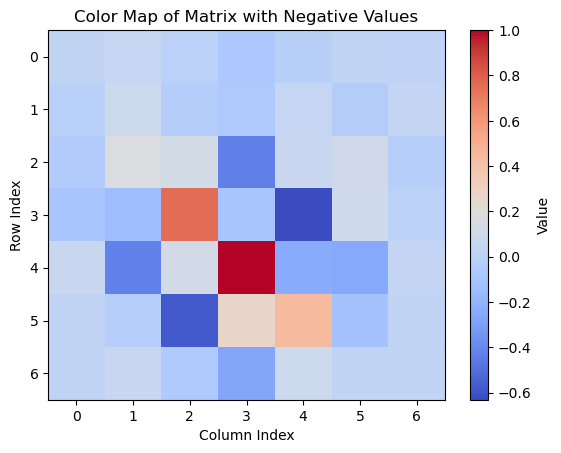

tensor([[ 0.0203,  0.0249,  0.0150, -0.0338, -0.0285,  0.0079,  0.0057],
        [-0.0128,  0.0444, -0.0216,  0.0192,  0.0360, -0.0594,  0.0168],
        [-0.0412,  0.1019,  0.0570, -0.2509,  0.1520,  0.0611, -0.0437],
        [-0.0425, -0.1486,  0.4460, -0.1253, -0.3686,  0.1661,  0.0026],
        [ 0.1078, -0.2520, -0.0129,  0.5983, -0.2202, -0.1306,  0.0332],
        [ 0.0071,  0.0863, -0.3682,  0.1039,  0.2399, -0.1070, -0.0034],
        [-0.0141,  0.0351,  0.0559, -0.1591,  0.0647,  0.0254,  0.0218]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


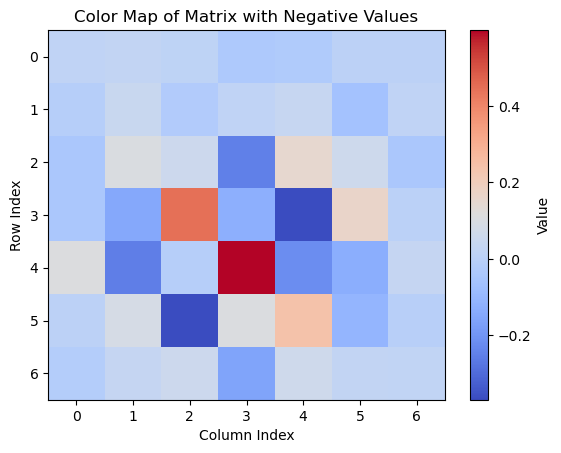

tensor([[ 0.0252,  0.0510,  0.0336,  0.0208,  0.0021, -0.0254, -0.0384],
        [ 0.0364,  0.0555,  0.0302,  0.0068, -0.0208, -0.0380, -0.0447],
        [ 0.0252,  0.0251, -0.0176, -0.0379, -0.0444, -0.0466, -0.0475],
        [ 0.0193,  0.0011, -0.0462, -0.0529, -0.0407, -0.0317, -0.0256],
        [ 0.0420,  0.0165, -0.0260, -0.0343, -0.0233, -0.0044,  0.0107],
        [ 0.0378,  0.0237, -0.0084, -0.0136, -0.0103, -0.0006,  0.0145],
        [ 0.0269,  0.0257,  0.0082,  0.0142,  0.0159,  0.0120,  0.0265]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


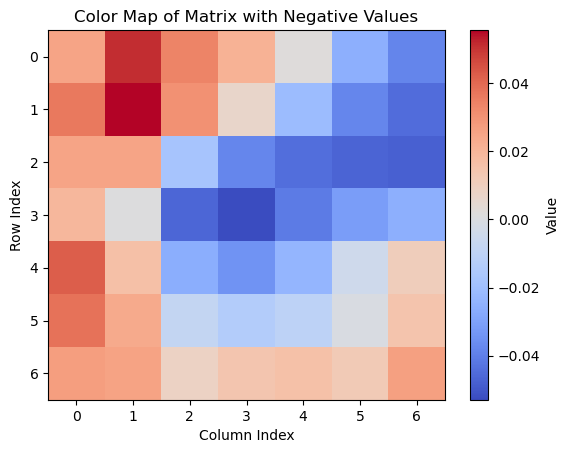

tensor([[ 0.0302,  0.0475,  0.0349,  0.0253,  0.0042, -0.0246, -0.0357],
        [ 0.0243,  0.0391,  0.0181, -0.0041, -0.0339, -0.0476, -0.0551],
        [ 0.0126,  0.0115, -0.0221, -0.0417, -0.0520, -0.0545, -0.0538],
        [ 0.0049, -0.0080, -0.0469, -0.0522, -0.0446, -0.0373, -0.0287],
        [ 0.0323,  0.0110, -0.0240, -0.0313, -0.0220, -0.0062,  0.0081],
        [ 0.0317,  0.0227,  0.0007, -0.0044, -0.0032,  0.0064,  0.0209],
        [ 0.0214,  0.0215,  0.0135,  0.0203,  0.0184,  0.0133,  0.0262]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


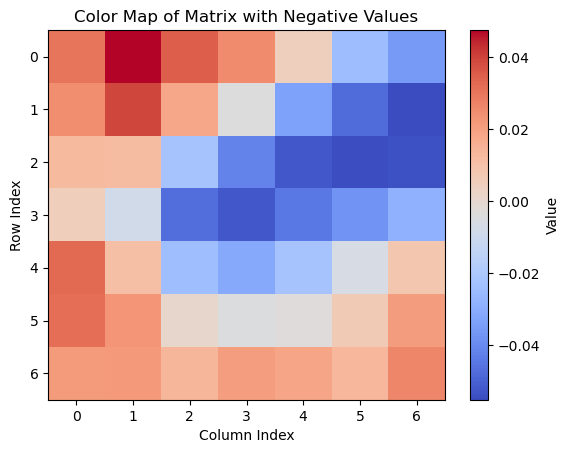

tensor([[-0.0133, -0.0232, -0.0162, -0.0026, -0.0080, -0.0252, -0.0357],
        [-0.0321, -0.0332, -0.0265, -0.0209, -0.0295, -0.0345, -0.0475],
        [-0.0301, -0.0326, -0.0355, -0.0294, -0.0259, -0.0253, -0.0359],
        [-0.0308, -0.0362, -0.0415, -0.0297, -0.0171, -0.0151, -0.0193],
        [-0.0167, -0.0285, -0.0298, -0.0222, -0.0148, -0.0065, -0.0048],
        [-0.0177, -0.0275, -0.0240, -0.0185, -0.0201, -0.0177, -0.0142],
        [-0.0367, -0.0499, -0.0418, -0.0290, -0.0304, -0.0382, -0.0327]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


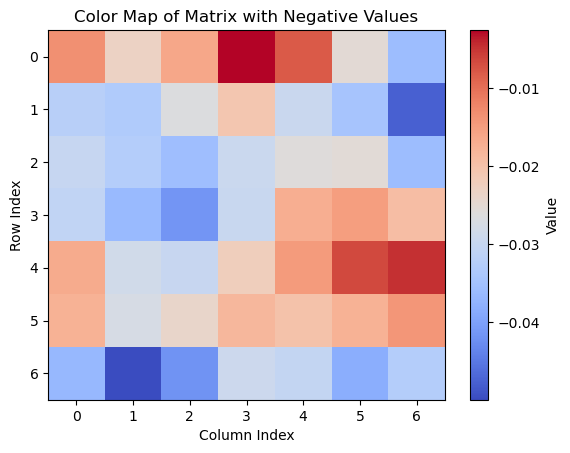

tensor([[ 0.0072,  0.0033,  0.0233, -0.0347,  0.0553, -0.0199, -0.0354],
        [-0.0115,  0.0427,  0.0029, -0.1168,  0.2244, -0.1065, -0.0269],
        [-0.0069,  0.0884, -0.2359,  0.1567,  0.2656, -0.4315,  0.1417],
        [ 0.0084,  0.0015, -0.1751,  0.5187, -0.4393, -0.2070,  0.2726],
        [-0.0048, -0.0570,  0.1451,  0.1522, -0.6009,  0.4332, -0.0176],
        [ 0.0065, -0.0017,  0.1152, -0.2169, -0.0523,  0.2504, -0.1577],
        [ 0.0052, -0.0071,  0.0081, -0.1171,  0.1305,  0.0082, -0.0328]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


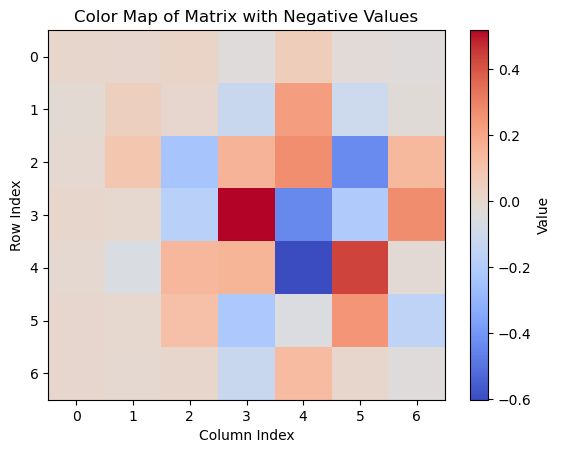

tensor([[-0.0010, -0.0294, -0.0020, -0.0301,  0.1030, -0.0080, -0.0726],
        [-0.0023,  0.0284, -0.0201, -0.0695,  0.2980, -0.1783, -0.0730],
        [-0.0133,  0.0770, -0.2058,  0.3180,  0.2671, -0.6170,  0.1471],
        [-0.0130, -0.0332, -0.1109,  0.6570, -0.6533, -0.3760,  0.3625],
        [-0.0101, -0.0564,  0.2246,  0.1338, -0.8404,  0.4488,  0.1019],
        [ 0.0203,  0.0161,  0.1522, -0.3135, -0.1323,  0.3438, -0.0852],
        [-0.0105, -0.0165,  0.0024, -0.1690,  0.1336,  0.0420, -0.0248]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


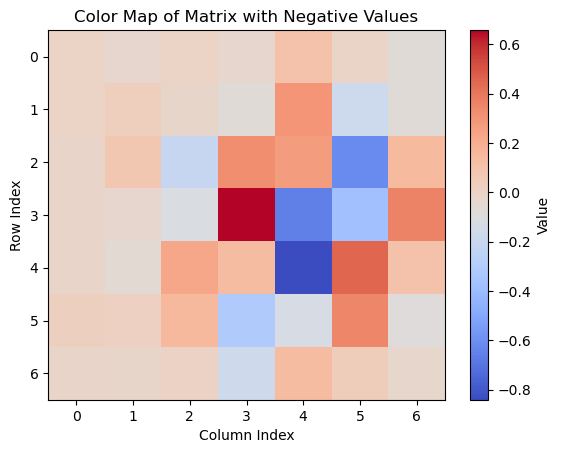

tensor([[ 1.4065e-03, -1.6117e-02,  2.9298e-02, -3.0748e-02,  4.1586e-02,
         -1.0718e-03, -2.7169e-02],
        [-1.9440e-05,  1.2662e-02,  7.7757e-03, -1.3057e-01,  1.7693e-01,
         -7.1960e-02, -4.8014e-02],
        [-1.8338e-02,  8.4323e-02, -1.7629e-01,  9.2626e-02,  2.3549e-01,
         -3.5122e-01,  9.4094e-02],
        [-3.1043e-03, -9.1263e-04, -1.8420e-01,  4.3520e-01, -3.1887e-01,
         -1.2622e-01,  1.9062e-01],
        [-9.6679e-03, -6.0080e-02,  1.0136e-01,  1.6315e-01, -4.4089e-01,
          3.6075e-01, -9.0792e-02],
        [ 1.4539e-02, -5.8892e-03,  1.1537e-01, -1.4345e-01, -1.3240e-02,
          1.4214e-01, -1.2541e-01],
        [-7.0381e-03, -7.4689e-03,  1.8473e-02, -1.1006e-01,  6.4881e-02,
         -3.8789e-02,  8.1410e-03]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


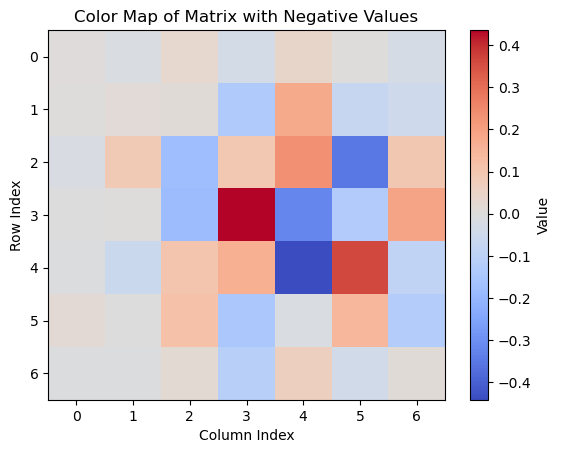

tensor([[ 0.0129, -0.0206, -0.0236,  0.0219, -0.0531, -0.1071,  0.0337],
        [ 0.0151, -0.0159, -0.0292,  0.0374, -0.0778, -0.2378, -0.2015],
        [ 0.0338,  0.0178, -0.0036,  0.1284,  0.0507, -0.1870, -0.2763],
        [ 0.0405,  0.0678,  0.0311,  0.1708,  0.1925, -0.0560, -0.2224],
        [-0.0146,  0.0363,  0.0511,  0.1437,  0.1777,  0.0147, -0.1592],
        [-0.0513, -0.0503,  0.0048,  0.1229,  0.1215,  0.0390, -0.0863],
        [-0.0041, -0.0410, -0.0547,  0.0852,  0.1233,  0.0803, -0.0463]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


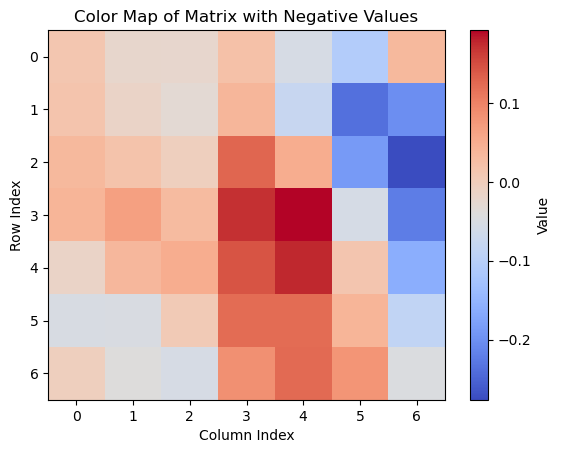

tensor([[ 0.0014, -0.0257, -0.0215,  0.0170, -0.0615, -0.1247,  0.0357],
        [ 0.0050, -0.0208, -0.0319,  0.0278, -0.1102, -0.3040, -0.2561],
        [ 0.0417,  0.0334,  0.0132,  0.1490,  0.0612, -0.2401, -0.3479],
        [ 0.0478,  0.0976,  0.0572,  0.2069,  0.2401, -0.0762, -0.2936],
        [-0.0034,  0.0818,  0.0871,  0.1735,  0.2281,  0.0288, -0.1909],
        [-0.0603, -0.0310,  0.0193,  0.1370,  0.1535,  0.0570, -0.0855],
        [-0.0127, -0.0425, -0.0557,  0.0753,  0.1319,  0.0940, -0.0308]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


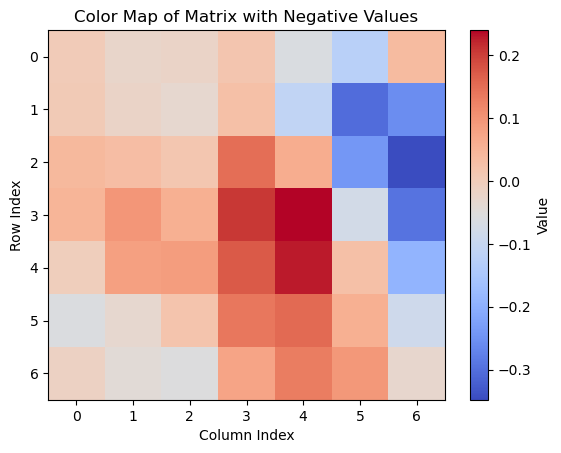

tensor([[-0.0037, -0.0135, -0.0135,  0.0118, -0.0224, -0.0374,  0.1356],
        [-0.0065, -0.0223, -0.0480, -0.0039, -0.0659, -0.1450, -0.0546],
        [ 0.0262,  0.0064, -0.0305,  0.0609,  0.0369, -0.1142, -0.1180],
        [ 0.0334,  0.0532, -0.0009,  0.0854,  0.1360, -0.0288, -0.1052],
        [-0.0142,  0.0377,  0.0240,  0.0487,  0.0933, -0.0033, -0.0965],
        [-0.0269, -0.0196, -0.0009,  0.0483,  0.0481,  0.0035, -0.0492],
        [ 0.0103, -0.0121, -0.0357,  0.0325,  0.0581,  0.0372, -0.0257]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


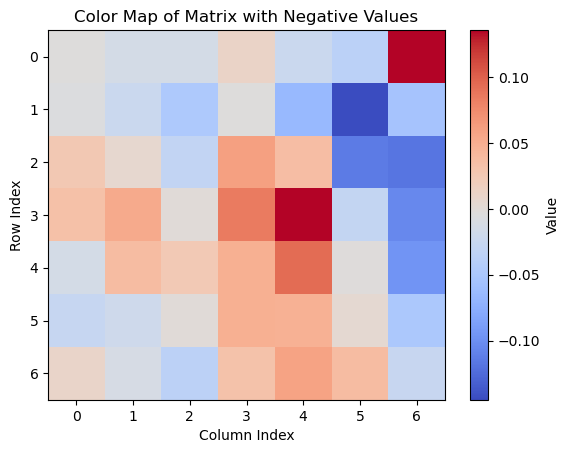

tensor([[-0.0344,  0.0197,  0.0260,  0.0068,  0.0096,  0.0208, -0.0390],
        [-0.0144,  0.0825,  0.1204,  0.1298,  0.1789,  0.1873,  0.1338],
        [-0.0254,  0.0364,  0.0655,  0.0947,  0.1168,  0.1238,  0.1122],
        [ 0.0085,  0.0415,  0.0592,  0.0665,  0.0792,  0.0838,  0.0882],
        [-0.0380, -0.0009,  0.0053, -0.0127, -0.0069,  0.0178,  0.0135],
        [-0.0446, -0.0263, -0.0377, -0.0808, -0.0822, -0.0386, -0.0322],
        [-0.0910, -0.1256, -0.1358, -0.1865, -0.2066, -0.1886, -0.1861]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


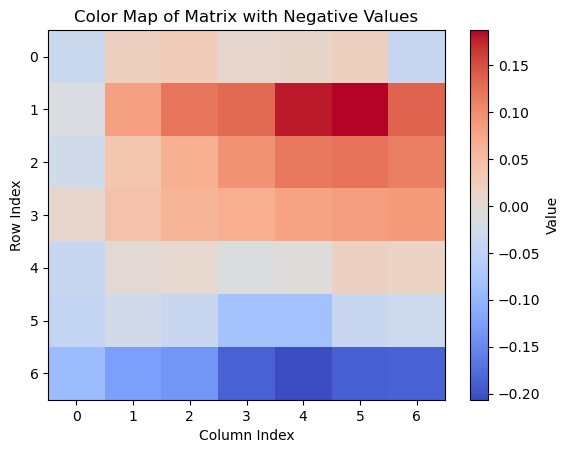

tensor([[-1.8596e-02,  4.0961e-02,  5.5587e-02,  4.8160e-02,  4.4292e-02,
          3.7134e-02, -2.6528e-02],
        [ 1.3513e-02,  1.1995e-01,  1.6261e-01,  1.8685e-01,  2.3597e-01,
          2.2805e-01,  1.6754e-01],
        [-5.9652e-03,  6.0244e-02,  9.5832e-02,  1.3933e-01,  1.5876e-01,
          1.5303e-01,  1.3475e-01],
        [ 2.3687e-02,  6.6686e-02,  8.1182e-02,  9.3603e-02,  1.0457e-01,
          9.9533e-02,  9.3654e-02],
        [-3.8694e-02, -1.5794e-04,  8.4285e-04, -2.3633e-02, -1.7642e-02,
          1.2979e-02, -9.4015e-04],
        [-5.6289e-02, -4.5444e-02, -6.7738e-02, -1.2298e-01, -1.1880e-01,
         -7.2041e-02, -5.5165e-02],
        [-1.0283e-01, -1.4953e-01, -1.7414e-01, -2.3280e-01, -2.4876e-01,
         -2.2229e-01, -2.1004e-01]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


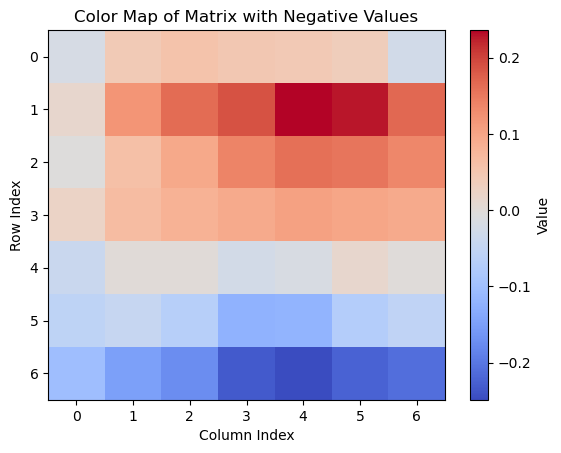

tensor([[-0.0512, -0.0079, -0.0140, -0.0141, -0.0097, -0.0217, -0.0834],
        [-0.0160,  0.0710,  0.0937,  0.1182,  0.1799,  0.1715,  0.1122],
        [-0.0257,  0.0260,  0.0376,  0.0714,  0.0973,  0.0930,  0.0825],
        [ 0.0128,  0.0424,  0.0392,  0.0472,  0.0507,  0.0464,  0.0469],
        [-0.0218,  0.0196,  0.0141, -0.0088, -0.0155, -0.0068, -0.0201],
        [-0.0043,  0.0057, -0.0203, -0.0614, -0.0603, -0.0271, -0.0203],
        [-0.0307, -0.0786, -0.1095, -0.1497, -0.1588, -0.1380, -0.1296]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


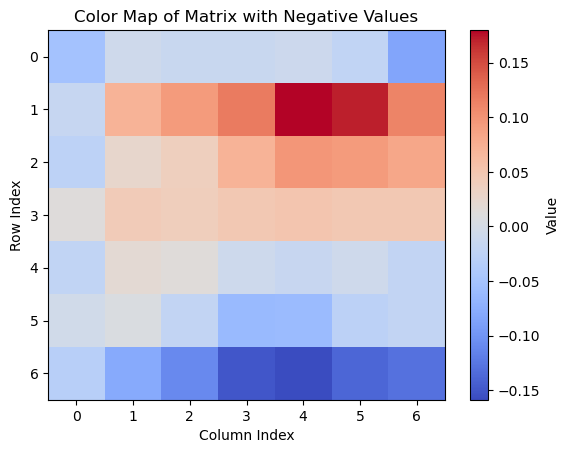

tensor([[ 8.0289e-04,  1.4447e-02, -1.1974e-02,  1.7862e-02,  1.1611e-04,
          8.3532e-03,  1.7135e-02],
        [-9.2133e-04,  1.8063e-03,  6.6498e-03,  7.5377e-03, -2.8435e-03,
         -1.2709e-02,  2.0275e-02],
        [ 2.1704e-02,  4.8405e-03, -3.0074e-02, -2.9592e-02,  4.4207e-03,
          6.1157e-03,  1.4740e-03],
        [ 2.7767e-02, -1.0144e-01, -1.5046e-01, -1.0981e-01, -5.7093e-02,
          9.6545e-03, -8.0115e-03],
        [ 2.2868e-02, -1.2822e-01, -1.9097e-01, -1.4010e-01, -7.7312e-02,
         -2.1477e-02, -2.9960e-02],
        [ 6.9899e-02,  3.0976e-02, -1.1745e-02,  7.4636e-03,  1.7769e-02,
          2.3945e-02,  1.4815e-03],
        [ 2.6019e-02,  7.0307e-02,  6.8798e-02,  4.8610e-02,  1.9671e-02,
          1.2856e-02,  9.9726e-03]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


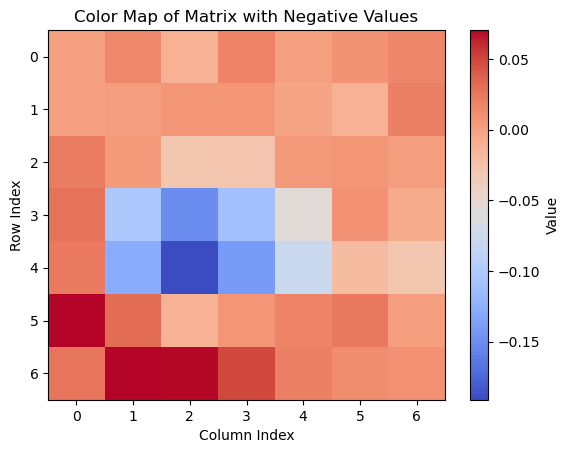

tensor([[ 4.0276e-03, -5.5441e-03, -2.9288e-02, -1.3168e-02, -3.2294e-02,
         -3.6290e-03,  1.4991e-02],
        [-4.6375e-05, -1.9524e-02, -2.4323e-02, -2.5223e-02, -2.9074e-02,
         -3.0418e-02,  6.1514e-03],
        [ 1.7137e-02, -2.3906e-02, -6.7912e-02, -6.0391e-02, -2.1714e-02,
         -8.2694e-03, -8.3201e-04],
        [ 2.8344e-02, -1.3507e-01, -1.9870e-01, -1.5813e-01, -9.5181e-02,
         -8.2713e-03, -1.6202e-02],
        [ 3.3576e-02, -1.5407e-01, -2.3948e-01, -1.9220e-01, -1.1878e-01,
         -3.5265e-02, -2.6232e-02],
        [ 7.8198e-02,  1.7646e-02, -4.0077e-02, -2.5392e-02, -7.5736e-03,
          2.2226e-02,  6.1932e-03],
        [ 7.0249e-03,  3.6719e-02,  3.7829e-02,  2.4507e-02, -5.3702e-03,
          1.6490e-02,  1.1452e-02]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


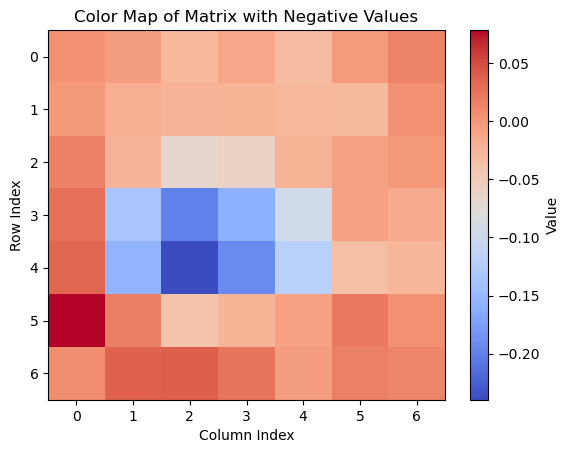

tensor([[-0.0062,  0.0199,  0.0014,  0.0287,  0.0142,  0.0234,  0.0177],
        [ 0.0165,  0.0339,  0.0376,  0.0465,  0.0410,  0.0101,  0.0232],
        [ 0.0398,  0.0493,  0.0338,  0.0399,  0.0582,  0.0359,  0.0173],
        [ 0.0566, -0.0283, -0.0649, -0.0325,  0.0037,  0.0524,  0.0237],
        [ 0.0375, -0.0677, -0.1290, -0.0970, -0.0426,  0.0133,  0.0098],
        [ 0.0416,  0.0181, -0.0306, -0.0272, -0.0136,  0.0085, -0.0151],
        [-0.0025,  0.0362,  0.0291,  0.0067, -0.0182, -0.0023, -0.0042]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


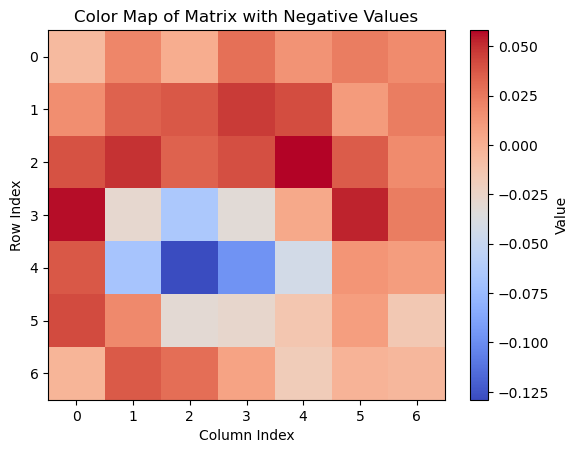

tensor([[ 0.0035, -0.0224,  0.0409, -0.0628,  0.0118, -0.0447,  0.0300],
        [ 0.0087, -0.0143,  0.0496,  0.0139, -0.0801,  0.0059,  0.0507],
        [-0.0070, -0.0130, -0.0037,  0.1384, -0.2612,  0.0306,  0.0667],
        [-0.0125,  0.0041, -0.0467,  0.3492, -0.4067, -0.0470,  0.1880],
        [-0.0230, -0.0029, -0.0863,  0.4234, -0.3972, -0.2061,  0.2384],
        [-0.0029,  0.0032, -0.0730,  0.3232, -0.2231, -0.2046,  0.2092],
        [ 0.0052,  0.0139, -0.0194,  0.1386, -0.1003, -0.1799,  0.1131]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


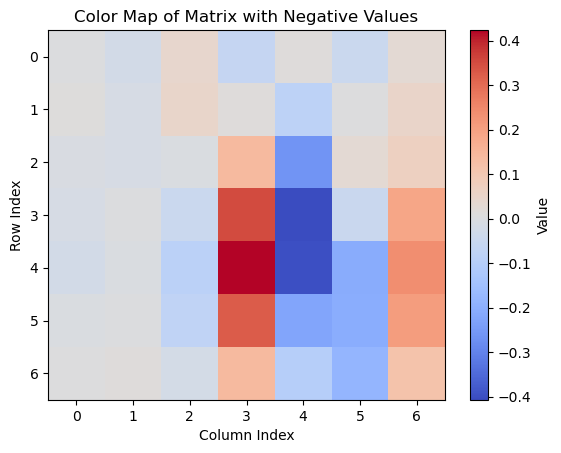

tensor([[ 0.0198, -0.0123,  0.0823, -0.0414, -0.0246, -0.0509,  0.0095],
        [ 0.0101, -0.0102,  0.1108,  0.0337, -0.1367, -0.0073,  0.0549],
        [-0.0241, -0.0269,  0.0793,  0.2033, -0.3733, -0.0236,  0.1011],
        [-0.0338, -0.0157,  0.0573,  0.5264, -0.5675, -0.1708,  0.2567],
        [-0.0306, -0.0309,  0.0024,  0.6592, -0.5512, -0.3823,  0.2983],
        [-0.0188, -0.0267, -0.0088,  0.5123, -0.3077, -0.3575,  0.2408],
        [ 0.0064, -0.0153,  0.0156,  0.2446, -0.1176, -0.2476,  0.0876]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


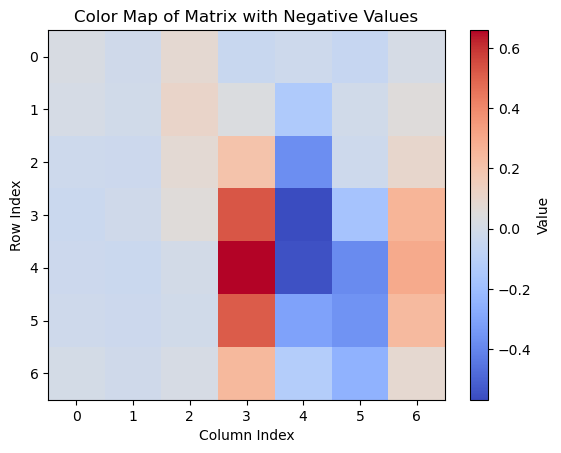

tensor([[ 0.0137, -0.0229,  0.0566, -0.0481, -0.0179, -0.0218, -0.0075],
        [ 0.0090, -0.0109,  0.0660,  0.0291, -0.0669,  0.0412,  0.0193],
        [-0.0153, -0.0024,  0.0116,  0.1333, -0.2117,  0.0613, -0.0027],
        [-0.0318,  0.0150, -0.0354,  0.3410, -0.3041, -0.0234,  0.0744],
        [-0.0426, -0.0017, -0.0705,  0.4218, -0.2775, -0.1550,  0.1107],
        [-0.0259, -0.0102, -0.0680,  0.3154, -0.1412, -0.1465,  0.1014],
        [-0.0034, -0.0087, -0.0203,  0.1485, -0.0415, -0.1014,  0.0348]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


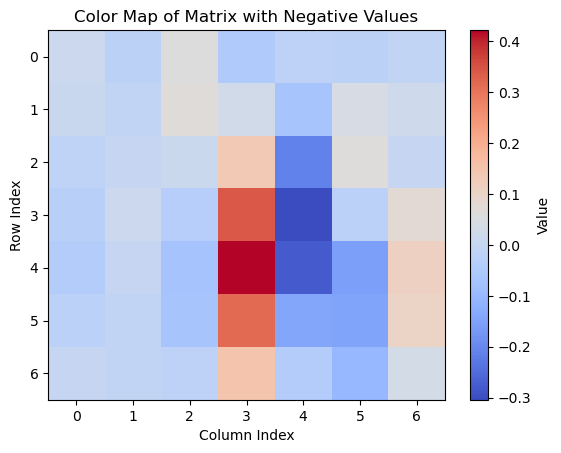

tensor([[ 0.0090, -0.0118, -0.0358, -0.0044, -0.0100,  0.0044,  0.0099],
        [-0.0850, -0.0916, -0.0042,  0.0655,  0.0404,  0.0177, -0.0104],
        [-0.0396,  0.0848,  0.2581,  0.2355,  0.0528, -0.0063, -0.0449],
        [ 0.0870,  0.2495,  0.2083, -0.1272, -0.3157, -0.1221, -0.0566],
        [ 0.1279,  0.0325, -0.2933, -0.4981, -0.1603,  0.1078,  0.0565],
        [-0.0465, -0.2120, -0.2613, -0.0473,  0.2488,  0.1369,  0.0083],
        [-0.0555,  0.0028,  0.1029,  0.1415,  0.1000, -0.0448, -0.0739]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


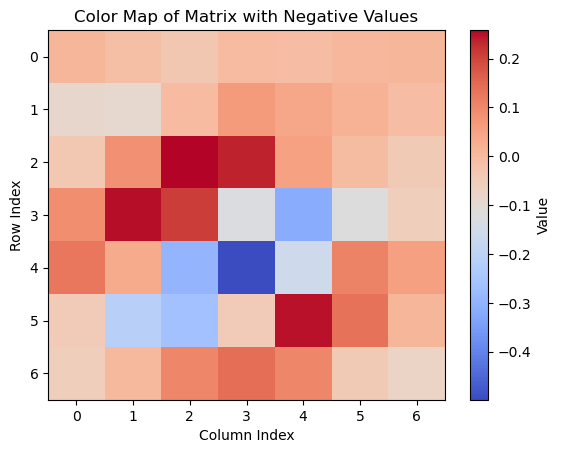

tensor([[ 0.0010,  0.0158,  0.0079,  0.0228,  0.0054,  0.0026, -0.0086],
        [-0.0474, -0.0201,  0.0766,  0.1257,  0.0672,  0.0121, -0.0205],
        [ 0.0264,  0.1937,  0.3650,  0.2723,  0.0037, -0.0811, -0.0789],
        [ 0.1642,  0.3367,  0.1907, -0.3005, -0.5191, -0.2379, -0.0890],
        [ 0.1411, -0.0137, -0.4926, -0.7543, -0.2836,  0.1151,  0.1097],
        [-0.1267, -0.3451, -0.4289, -0.1209,  0.3240,  0.2276,  0.0679],
        [-0.1029, -0.0100,  0.1355,  0.2493,  0.2629,  0.0687, -0.0245]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


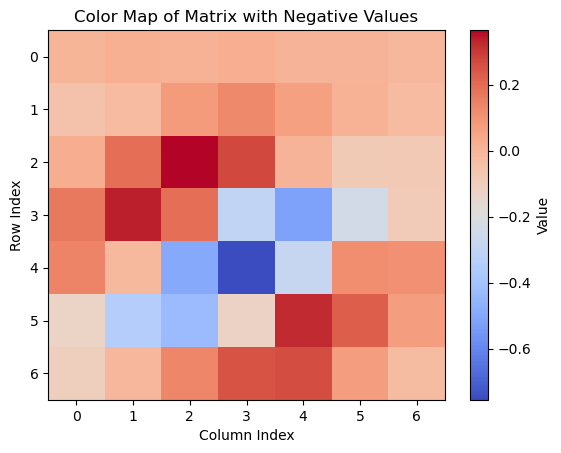

tensor([[ 0.0274,  0.0254,  0.0112, -0.0020, -0.0082, -0.0009, -0.0039],
        [-0.0180, -0.0481, -0.0195,  0.0062,  0.0218,  0.0020, -0.0034],
        [-0.0243,  0.0450,  0.1561,  0.1510,  0.0426, -0.0188, -0.0206],
        [ 0.0242,  0.1601,  0.1238, -0.1287, -0.2564, -0.1207, -0.0420],
        [ 0.0756,  0.0362, -0.2292, -0.3918, -0.0877,  0.0847,  0.0571],
        [-0.0650, -0.1815, -0.2183, -0.0225,  0.2197,  0.0798,  0.0090],
        [-0.0570,  0.0203,  0.1019,  0.1161,  0.1107, -0.0011, -0.0016]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


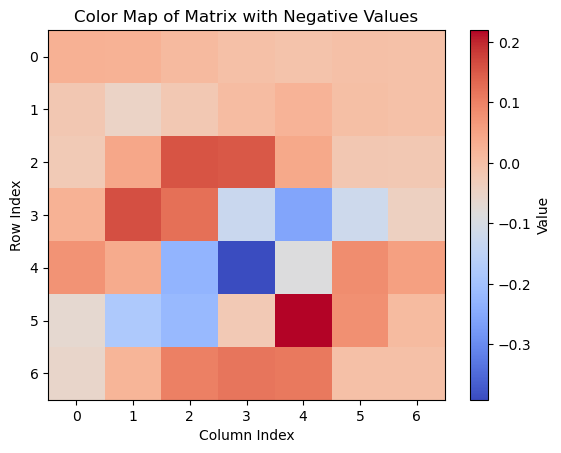

tensor([[-0.0619, -0.0302,  0.0192,  0.0744,  0.0437, -0.0221, -0.0422],
        [-0.0381,  0.0061,  0.0458,  0.1036,  0.0960,  0.0593,  0.0300],
        [-0.0297,  0.0028,  0.0205,  0.0775,  0.0598,  0.0414,  0.0231],
        [-0.0125,  0.0246,  0.0130,  0.0551,  0.0345,  0.0384,  0.0067],
        [ 0.0119,  0.0457,  0.0449,  0.0899,  0.0474,  0.0223, -0.0055],
        [-0.0325, -0.0122,  0.0220,  0.0975,  0.0581, -0.0075, -0.0597],
        [-0.0433, -0.0282, -0.0059,  0.1019,  0.0885,  0.0084, -0.0500]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


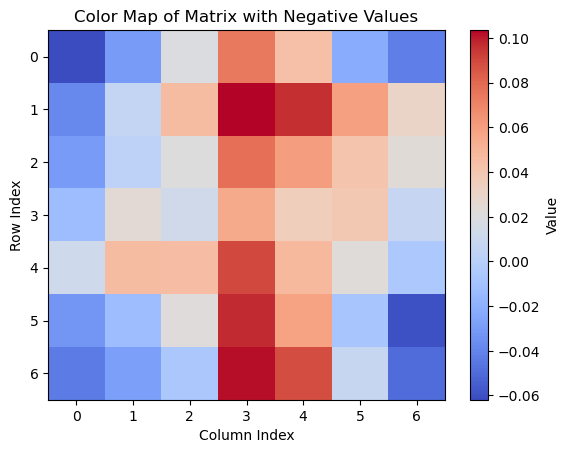

tensor([[-0.0613, -0.0140,  0.0172,  0.0548,  0.0183, -0.0327, -0.0411],
        [-0.0315,  0.0245,  0.0455,  0.0835,  0.0668,  0.0467,  0.0332],
        [-0.0322,  0.0207,  0.0233,  0.0588,  0.0353,  0.0365,  0.0313],
        [-0.0045,  0.0487,  0.0274,  0.0539,  0.0314,  0.0526,  0.0295],
        [ 0.0177,  0.0610,  0.0482,  0.0761,  0.0378,  0.0289,  0.0140],
        [-0.0109,  0.0221,  0.0427,  0.0976,  0.0602,  0.0162, -0.0125],
        [-0.0223,  0.0132,  0.0309,  0.1225,  0.1040,  0.0401, -0.0053]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


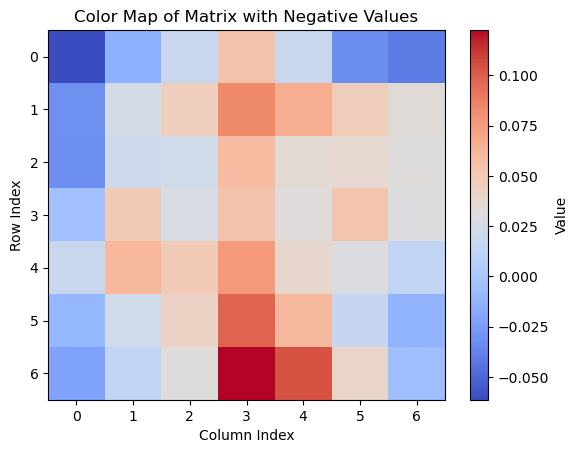

tensor([[-0.0853, -0.0426,  0.0068,  0.0576,  0.0308, -0.0348, -0.0499],
        [-0.0292,  0.0182,  0.0511,  0.0974,  0.0902,  0.0534,  0.0402],
        [-0.0399, -0.0011,  0.0096,  0.0501,  0.0241,  0.0263,  0.0255],
        [-0.0260,  0.0149, -0.0073,  0.0097, -0.0068,  0.0187,  0.0041],
        [-0.0032,  0.0305,  0.0163,  0.0420,  0.0055, -0.0063, -0.0085],
        [-0.0230, -0.0028,  0.0232,  0.0776,  0.0359, -0.0143, -0.0324],
        [-0.0099,  0.0071,  0.0107,  0.0931,  0.0705,  0.0130, -0.0083]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


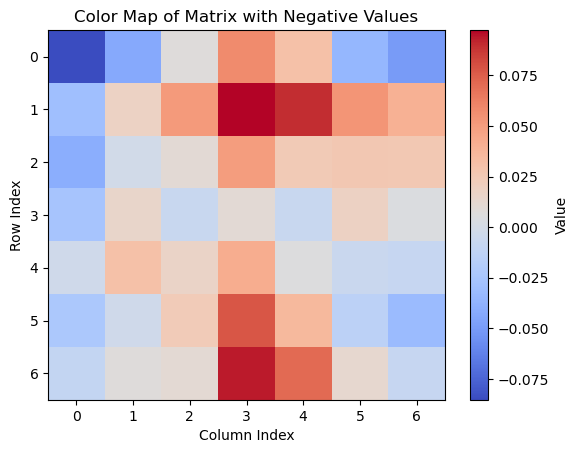

tensor([[-7.8699e-03,  1.9911e-02,  3.4208e-02,  3.6870e-02,  2.8694e-02,
          1.2820e-02,  1.8142e-02],
        [ 8.7942e-03, -3.2875e-02, -3.5713e-02,  2.6747e-02,  7.2533e-02,
          4.5889e-02,  5.2383e-02],
        [-3.6122e-02, -1.1878e-01, -1.3767e-01, -7.9786e-02,  3.3811e-02,
          3.7806e-02,  2.6944e-02],
        [-1.1501e-02, -7.2951e-02, -9.7454e-02, -7.1742e-02,  3.3201e-05,
          2.2604e-02,  1.9281e-02],
        [ 1.7322e-02,  3.9589e-03, -8.2269e-03, -1.3659e-02,  2.7543e-03,
          1.8313e-02,  1.6057e-02],
        [-9.5007e-04,  1.6428e-02,  1.7156e-02,  7.1999e-03,  3.3672e-03,
          2.2857e-02,  6.5783e-04],
        [ 6.1727e-03,  2.7145e-02,  1.4340e-02,  1.2017e-02,  7.5867e-03,
          1.8770e-02,  1.5624e-02]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


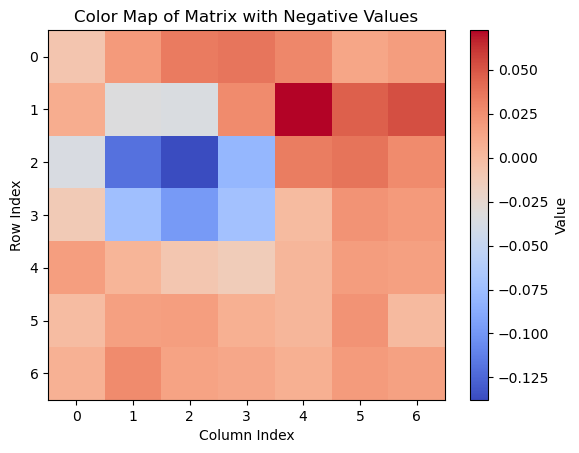

tensor([[-0.0134, -0.0005,  0.0081,  0.0038, -0.0061,  0.0092,  0.0158],
        [-0.0183, -0.0680, -0.0707, -0.0139,  0.0299,  0.0263,  0.0238],
        [-0.0544, -0.1466, -0.1621, -0.1002,  0.0118,  0.0325,  0.0120],
        [-0.0299, -0.0985, -0.1160, -0.0794, -0.0100,  0.0244,  0.0101],
        [ 0.0008, -0.0176, -0.0195, -0.0141, -0.0041,  0.0247,  0.0129],
        [-0.0006,  0.0118,  0.0248,  0.0203,  0.0061,  0.0392,  0.0097],
        [-0.0072,  0.0067,  0.0053,  0.0057, -0.0076,  0.0273,  0.0177]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


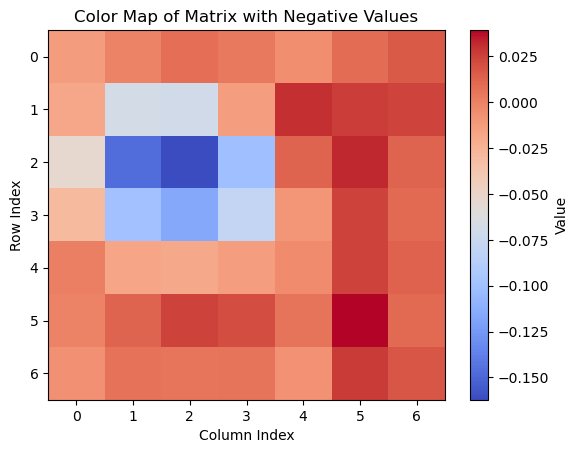

tensor([[-0.0002, -0.0049,  0.0023, -0.0167, -0.0480, -0.0262, -0.0235],
        [-0.0003, -0.0515, -0.0600, -0.0286, -0.0174, -0.0233, -0.0373],
        [-0.0227, -0.0994, -0.1118, -0.0780, -0.0117, -0.0084, -0.0406],
        [ 0.0003, -0.0590, -0.0677, -0.0553, -0.0291, -0.0115, -0.0331],
        [ 0.0114, -0.0080, -0.0015, -0.0172, -0.0341, -0.0087, -0.0235],
        [ 0.0030,  0.0007,  0.0199,  0.0062, -0.0220,  0.0148, -0.0145],
        [-0.0191, -0.0294, -0.0233, -0.0285, -0.0486, -0.0130, -0.0244]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


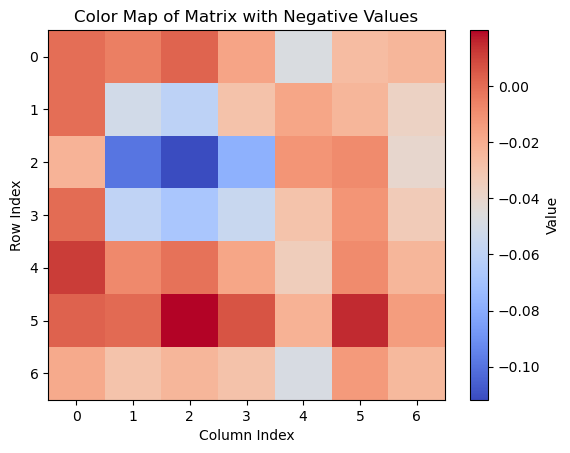

tensor([[-3.6296e-02,  7.1996e-03,  1.9100e-02,  3.7006e-02,  1.9602e-02,
          1.4870e-02, -1.7298e-02],
        [-1.1061e-02,  8.5665e-02,  1.2667e-01,  9.5134e-02,  1.3744e-02,
         -5.5036e-05, -3.0162e-02],
        [ 1.1322e-01,  1.8634e-01,  5.0658e-02, -1.7497e-01, -1.7333e-01,
         -7.2041e-02, -6.2474e-02],
        [ 1.3693e-01, -3.7955e-02, -3.7696e-01, -3.9504e-01, -5.8596e-02,
          8.7504e-02,  5.3348e-02],
        [-5.3062e-02, -2.5781e-01, -2.6747e-01,  5.2480e-02,  2.6781e-01,
          1.4344e-01,  5.5145e-02],
        [-2.1009e-02, -2.9969e-02,  1.0245e-01,  2.7997e-01,  2.0843e-01,
         -4.1518e-03, -3.8118e-02],
        [-2.2155e-02,  1.2380e-02,  8.4302e-02,  8.5354e-02, -4.4992e-02,
         -1.4687e-01, -9.0890e-02]], device='cuda:0',
       grad_fn=<UnbindBackward0>)


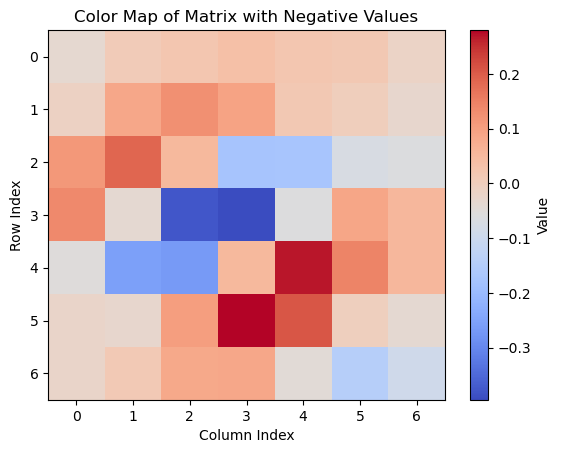

tensor([[-0.0054,  0.0328,  0.0155,  0.0072, -0.0077,  0.0030,  0.0011],
        [ 0.0617,  0.1490,  0.1464,  0.0639, -0.0289, -0.0202, -0.0092],
        [ 0.1615,  0.2089, -0.0256, -0.3164, -0.2728, -0.1074, -0.0630],
        [ 0.0713, -0.1895, -0.6077, -0.5754, -0.0992,  0.1156,  0.0797],
        [-0.1372, -0.4086, -0.3855,  0.0853,  0.4085,  0.2620,  0.1349],
        [-0.0594, -0.0612,  0.1420,  0.3873,  0.3578,  0.0909, -0.0017],
        [ 0.0079,  0.0584,  0.1534,  0.1751,  0.0470, -0.1010, -0.0979]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


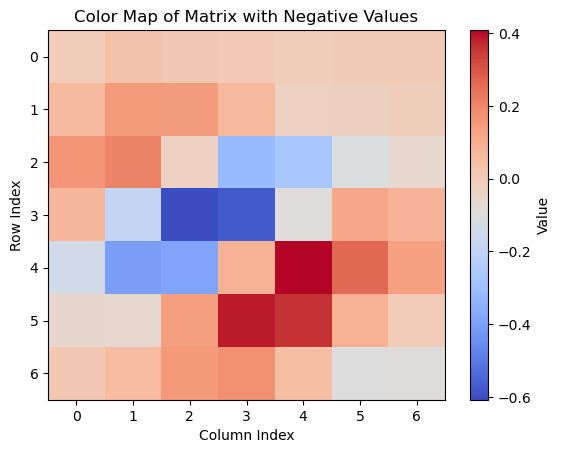

tensor([[-0.0057,  0.0134, -0.0265, -0.0112,  0.0045,  0.0021,  0.0139],
        [ 0.0066,  0.0452,  0.0603,  0.0707,  0.0144, -0.0051,  0.0041],
        [ 0.0553,  0.1240,  0.0432, -0.1289, -0.1449, -0.0745, -0.0575],
        [ 0.0536, -0.0466, -0.2823, -0.2911, -0.0485,  0.0590,  0.0341],
        [-0.0315, -0.1633, -0.1579,  0.0987,  0.2290,  0.1202,  0.0720],
        [-0.0105, -0.0011,  0.0846,  0.1945,  0.1575,  0.0221, -0.0101],
        [-0.0049, -0.0050,  0.0363,  0.0406, -0.0244, -0.0712, -0.0668]],
       device='cuda:0', grad_fn=<UnbindBackward0>)


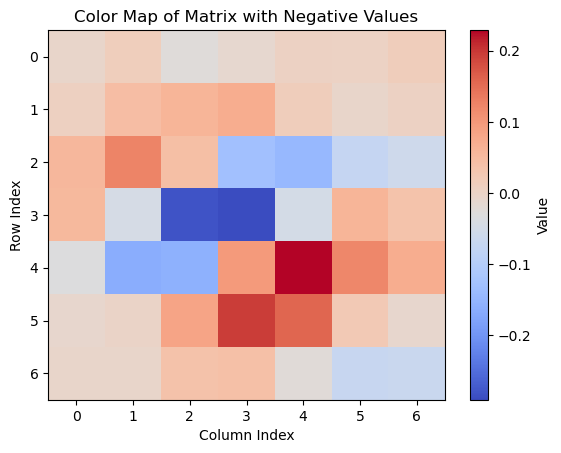

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample matrix with both positive and negative values
  # 10x10 matrix with random values from a normal distribution
for conv in c1.weight:
    for channel in conv:
        print(channel)
        matrix = (channel).detach().cpu().numpy()
        # Plot the color map
        plt.imshow(matrix, cmap='coolwarm', aspect='auto')  # 'coolwarm' colormap shows negatives and positives distinctly
        plt.colorbar(label='Value')  # Adds a color bar with labels for value reference
        plt.title("Color Map of Matrix with Negative Values")
        plt.xlabel("Column Index")
        plt.ylabel("Row Index")
        plt.show()


## What do these represent? 